In [864]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.metrics import mean_squared_error,r2_score,roc_curve,auc,  confusion_matrix, accuracy_score
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, ParameterGrid,RandomizedSearchCV
from sklearn.ensemble import  StackingRegressor, VotingRegressor, BaggingRegressor,BaggingClassifier,RandomForestRegressor,RandomForestClassifier, AdaBoostRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression,  Lasso, LassoCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler, FunctionTransformer
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import ElasticNetCV
import itertools as it
import xgboost as xgb
import lightgbm as lgb
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from pyearth import Earth
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Libraries for visualizing trees
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import time as time
from scipy.stats import uniform

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

# These two lines avoid dead kernel after importing keras
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

import keras
import tensorflow as tf
from keras.utils import to_categorical
from keras.models import Sequential 
from keras.layers import Dense, InputLayer, Dropout 
from keras.optimizers import Adam
from keras.initializers import HeNormal

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [5]:
train

,id,x001,x002,x003,x004,x005,x006,x007,x008,x009,...,x757,x758,x759,x760,x761,x762,x763,x764,x765,y
0,0,9.681860e+10,6991.15,7.76,0.00380,5.378811e+09,0.31,266117.20,934577.0,14539.0,...,0.0007,297281012,0.13,5.0,5,2.0,8.5127,14.28,-0.75,5
1,1,3.304810e+09,13914.43,5.37,0.00015,1.652405e+09,0.00,11927742.92,1798051.0,1051272.0,...,0.1136,3320000000000,0.08,661.0,0,350.0,1.5700,160.12,NaN,1
2,2,3.218944e+10,3991.98,5.77,0.00010,2.476111e+09,0.00,774385.01,375738.0,144143.0,...,0.0029,100474819,0.39,39.0,2,18.0,9.6800,25.06,-0.49,11
3,3,1.288000e+10,15937.45,5.86,0.00020,2.146667e+09,0.00,6324375.16,1932094.0,10055.0,...,0.0000,348000000000,0.25,2.0,1,0.0,4.5316,117.76,1.64,1
4,4,3.063412e+10,3621.00,7.52,0.00060,1.392460e+09,0.21,169860.29,474253.0,17914.0,...,0.0005,109546590,0.11,11.0,1,3.0,16.2717,5.81,-0.42,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5375,5375,3.948791e+09,24563.46,6.73,0.00035,9.871977e+08,0.43,3303184.55,3154159.0,4439.0,...,0.0000,158603315,0.05,0.0,0,0.0,2.7480,93.45,0.22,4
5376,5376,9.279017e+10,21572.94,6.96,0.00120,3.093006e+09,0.30,2649164.57,2934417.0,19106.0,...,0.0003,36089167,0.01,6.0,4,4.0,23.6890,76.05,-0.90,8
5377,5377,2.700359e+10,23061.73,6.36,0.00065,3.857656e+09,0.35,1825306.07,2395841.0,71514.0,...,0.0057,1786891,0.53,44.0,0,28.0,4.3710,80.30,-0.70,21
5378,5378,4.351107e+10,5739.04,7.80,0.00065,1.318517e+09,0.29,144103.12,715173.0,13977.0,...,0.0001,194000000000,0.29,3.0,2,2.0,24.6594,7.95,0.47,13


In [75]:
train.head(20)

,id,x001,x002,x003,x004,x005,x006,x007,x008,x009,...,x757,x758,x759,x760,x761,x762,x763,x764,x765,y
0,0,9.681860e+10,6991.15,7.76,0.00380,5.378811e+09,0.31,266117.20,934577.0,14539.0,...,0.0007,297281012,0.13,5.0,5,2.0,8.5127,14.28,-0.75,5
1,1,3.304810e+09,13914.43,5.37,0.00015,1.652405e+09,0.00,11927742.92,1798051.0,1051272.0,...,0.1136,3320000000000,0.08,661.0,0,350.0,1.5700,160.12,NaN,1
2,2,3.218944e+10,3991.98,5.77,0.00010,2.476111e+09,0.00,774385.01,375738.0,144143.0,...,0.0029,100474819,0.39,39.0,2,18.0,9.6800,25.06,-0.49,11
3,3,1.288000e+10,15937.45,5.86,0.00020,2.146667e+09,0.00,6324375.16,1932094.0,10055.0,...,0.0000,348000000000,0.25,2.0,1,0.0,4.5316,117.76,1.64,1
4,4,3.063412e+10,3621.00,7.52,0.00060,1.392460e+09,0.21,169860.29,474253.0,17914.0,...,0.0005,109546590,0.11,11.0,1,3.0,16.2717,5.81,-0.42,5
5,5,4.377769e+10,27776.26,6.02,0.00505,5.472212e+09,0.50,10797026.17,4501083.0,7538720.0,...,0.6223,154000000000000,0.52,1883.0,1,1055.0,4.5550,271.84,0.62,1
6,6,1.282546e+10,6215.45,6.07,0.00040,1.832208e+09,0.35,1509434.16,780135.0,2408.0,...,0.0000,1760000000000,0.26,2.0,0,0.0,5.2293,43.30,0.95,6
7,7,1.583740e+10,17060.72,5.73,0.00275,2.262486e+09,0.49,10151935.50,2262318.0,4887848.0,...,0.4630,7170000000000,0.86,2007.0,1,1113.0,5.5842,137.96,-0.94,3
8,8,5.844890e+10,9878.51,5.51,0.00185,6.494322e+09,0.42,2935716.59,1370456.0,1206.0,...,0.0004,552000000000,0.01,3.0,1,2.0,6.3101,84.18,-0.05,12
9,9,2.329566e+10,25682.32,6.88,0.00030,1.791974e+09,0.27,2445584.89,3319395.0,33620.0,...,0.0003,3090000000000,0.62,6.0,0,4.0,8.7404,108.10,-0.34,1


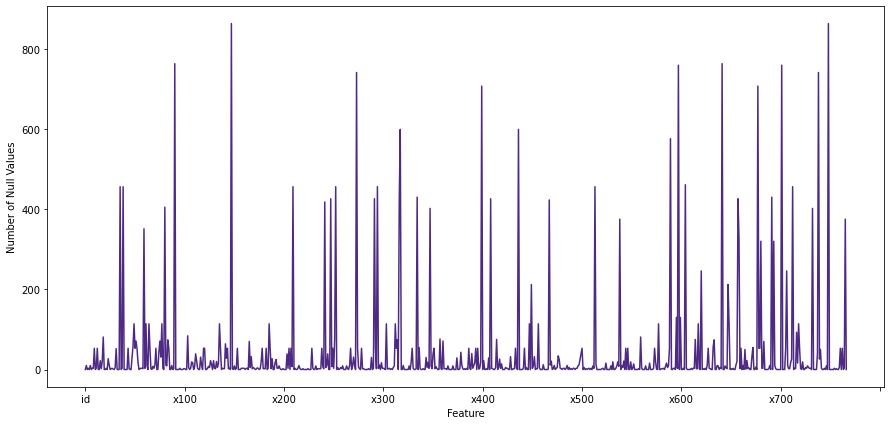

In [6]:
null_counts = train.isnull().sum()
null_counts.plot(kind='line', figsize = (15,7), color = "#4E2A84")
plt.xlabel('Feature')
plt.ylabel('Number of Null Values')
plt.show()

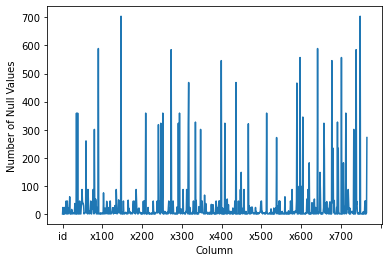

In [8]:
null_counts = test.isnull().sum()
null_counts.plot(kind='line')
plt.xlabel('Column')
plt.ylabel('Number of Null Values')
plt.show()

In [10]:
corr_matrix = train.corr()
corr_matrix

,id,x001,x002,x003,x004,x005,x006,x007,x008,x009,...,x757,x758,x759,x760,x761,x762,x763,x764,x765,y
id,1.000000,0.014652,-0.001859,0.001691,0.004353,0.024493,0.014469,-0.003433,-0.001495,-0.023534,...,-0.014413,0.009485,0.008319,-0.019056,0.000953,-0.018877,-0.009983,-0.006646,0.001720,-0.018863
x001,0.014652,1.000000,-0.102542,0.153749,0.379679,0.493197,0.247154,-0.165646,-0.103770,-0.032586,...,-0.052222,-0.006532,-0.016382,-0.057818,0.602138,-0.058439,0.629004,-0.149572,-0.005274,0.002661
x002,-0.001859,-0.102542,1.000000,-0.177286,0.035330,-0.180123,0.071401,0.463602,0.961286,0.103345,...,0.058053,0.104158,0.045745,0.102208,-0.007468,0.101158,0.017972,0.819495,-0.022161,-0.065831
x003,0.001691,0.153749,-0.177286,1.000000,-0.066532,-0.052850,-0.113437,-0.500092,-0.197902,-0.179138,...,-0.252394,-0.137534,-0.091690,-0.234049,0.159373,-0.236631,0.204255,-0.500867,-0.005638,0.201294
x004,0.004353,0.379679,0.035330,-0.066532,1.000000,0.231413,0.222151,0.126973,0.075906,0.038667,...,0.082101,0.021076,0.011411,0.044423,0.186038,0.046296,0.225874,0.086455,0.005585,-0.021558
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
x762,-0.018877,-0.058439,0.101158,-0.236631,0.046296,0.042812,0.098511,0.366232,0.150967,0.942280,...,0.842035,0.227901,0.042165,0.999511,-0.082885,1.000000,-0.101544,0.272372,-0.006575,-0.063036
x763,-0.009983,0.629004,0.017972,0.204255,0.225874,-0.128443,0.226026,-0.154933,-0.019153,-0.085807,...,-0.100417,-0.086515,-0.037527,-0.099358,0.794701,-0.101544,1.000000,-0.141807,-0.032923,0.009145
x764,-0.006646,-0.149572,0.819495,-0.500867,0.086455,-0.025749,0.116250,0.741603,0.853014,0.244453,...,0.250796,0.210006,0.094214,0.269973,-0.133994,0.272372,-0.141807,1.000000,-0.016775,-0.128958
x765,0.001720,-0.005274,-0.022161,-0.005638,0.005585,0.060317,-0.014770,-0.011229,-0.012326,-0.003104,...,-0.002085,-0.001432,-0.032845,-0.006884,-0.017833,-0.006575,-0.032923,-0.016775,1.000000,0.067693


In [11]:
# Sort the correlations into a series

corr_series = corr_matrix.unstack()
corr_series = corr_series[corr_series.index.get_level_values(0) != corr_series.index.get_level_values(1)]

sorted_corr = corr_series.sort_values(ascending=False)

# Pull perfect correlations

corr_1 = sorted_corr[sorted_corr == 1.0]

In [12]:
# Absolute value correlations
# Pull perfect correlations and those above 0.7

corr_series_abs = corr_series.abs()
sorted_corr_abs = corr_series_abs.sort_values(ascending=False)
corr_1_abs = sorted_corr_abs[sorted_corr_abs == 1.0]
corr_07_abs = sorted_corr_abs[(sorted_corr_abs > 0.7) & (sorted_corr_abs < 1.0)]

In [73]:
corr_04_abs = sorted_corr_abs[(sorted_corr_abs > 0.4) & (sorted_corr_abs < 1.0)]
corr_04_abs

x104  x352    1.000000
x224  x104    1.000000
x352  x104    1.000000
x104  x179    1.000000
      x055    1.000000
                ...   
x094  x202    0.400053
x151  x231    0.400028
x231  x151    0.400028
x335  x079    0.400023
x079  x335    0.400023
Length: 47112, dtype: float64

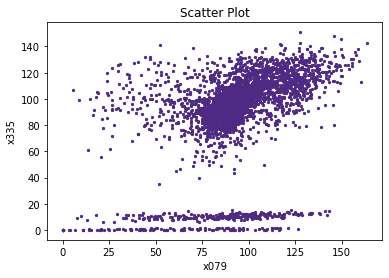

<Figure size 576x432 with 0 Axes>

In [74]:
# Create the scatter plot
plt.scatter(train['x079'], train['x335'], c='#4E2A84', s = 5)

# Add labels and title
plt.xlabel('x079')
plt.ylabel('x335')
plt.title('Scatter Plot')

# Show the plot
plt.figure(figsize=(8, 6))
plt.show()

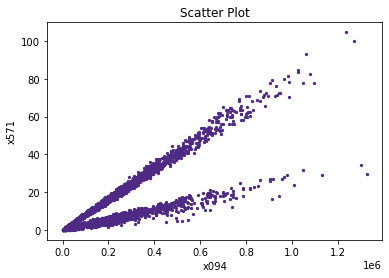

<Figure size 576x432 with 0 Axes>

In [70]:
# Create the scatter plot
plt.scatter(train['x094'], train['x571'], c='#4E2A84', s = 5)

# Add labels and title
plt.xlabel('x094')
plt.ylabel('x571')
plt.title('Scatter Plot')

# Show the plot
plt.figure(figsize=(8, 6))
plt.show()

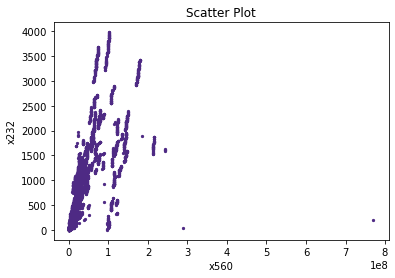

<Figure size 720x7200 with 0 Axes>

In [67]:
# Create the scatter plot
plt.scatter(train['x560'], train['x232'], c='#4E2A84', s = 5)

# Add labels and title
plt.xlabel('x560')
plt.ylabel('x232')
plt.title('Scatter Plot')

# Show the plot
plt.figure(figsize=(8, 6))
plt.show()

In [34]:
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.70
to_drop = [column for column in upper.columns if any(upper[column] > 0.70)]

len(to_drop)

<ipython-input-34-b73eb219422b>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


580

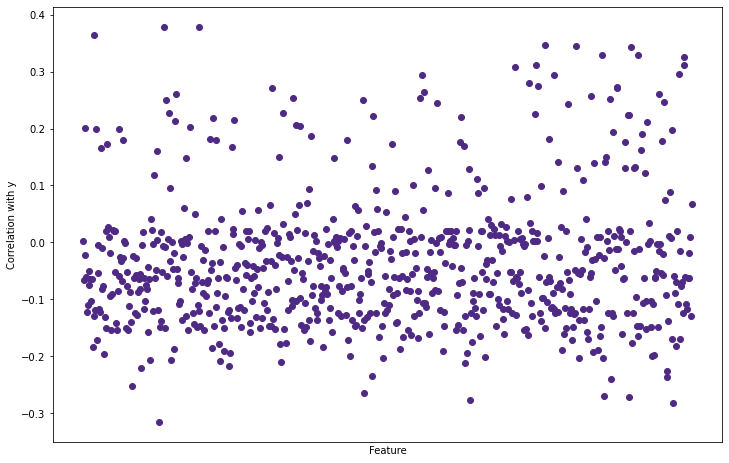

In [169]:
corr_y_plot = train.corr()['y']
corr_y_plot = corr_y_plot.drop(['id','y'])
corr_y_plot = corr_y_plot.to_frame().reset_index()

fig, ax = plt.subplots(figsize = (12,8))

ax.scatter(corr_y_plot['index'],corr_y_plot['y'], color = "#4E2A84")
ax.set_xticks([])
ax.set_xticklabels([])
plt.xlabel('Feature')
plt.ylabel('Correlation with y')
plt.show()

In [202]:
counts1 = corr_1_abs.index.get_level_values(0).append(corr_1_abs.index.get_level_values(1)).value_counts()

corr_1_list = (counts1[counts1 >= 2].index.tolist())
corr_1_list.append('y')

In [171]:
corr_y_plot = train.corr()['y']
corr_y_plot = corr_y_plot.filter(corr_1_list)
corr_y_plot = corr_y_plot.to_frame().reset_index()
corr_y_plot = corr_y_plot.drop(corr_y_plot.index[-1])

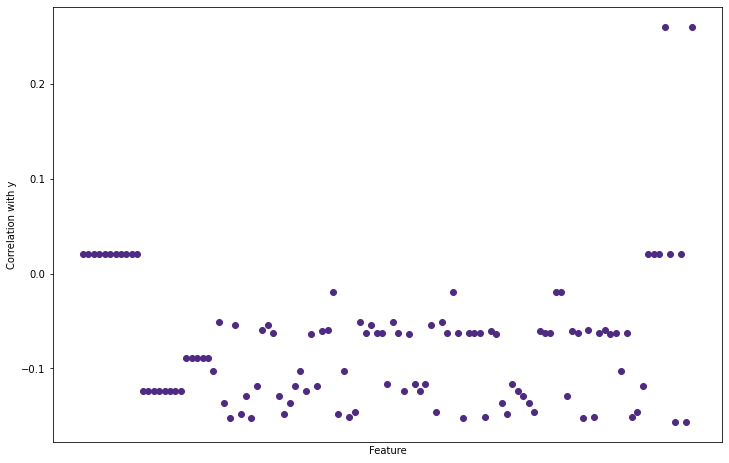

In [172]:
fig, ax = plt.subplots(figsize = (12,8))

ax.scatter(corr_y_plot['index'],corr_y_plot['y'], color = "#4E2A84")
ax.set_xticks([])
ax.set_xticklabels([])
plt.xlabel('Feature')
plt.ylabel('Correlation with y')
plt.show()

In [181]:
# Drop the highly correlated features
train = train.drop(train[to_drop], axis=1)
train

,x001,x002,x003,x004,x005,x006,x007,x009,x013,x014,...,x700,x703,x707,x712,x727,x729,x734,x737,x750,y
0,9.681860e+10,6991.15,7.76,0.00380,5.378811e+09,0.31,266117.20,14539.0,56.695,4.82,...,5710000000000000000,0,586885589994299981824,10.0295,0.00,4.27,2.0,1.35495,0.50,5
1,3.304810e+09,13914.43,5.37,0.00015,1.652405e+09,0.00,11927742.92,1051272.0,95.000,4.00,...,1514431683883399926251520,0,5550000000000000000,NaN,0.09,4.27,8.0,-0.87106,0.50,1
2,3.218944e+10,3991.98,5.77,0.00010,2.476111e+09,0.00,774385.01,144143.0,92.600,6.62,...,77223513438553997312,0,88897890482495995904,8.5580,0.00,3.68,7.0,1.39396,0.36,11
3,1.288000e+10,15937.45,5.86,0.00020,2.146667e+09,0.00,6324375.16,10055.0,92.130,5.60,...,178140452251780002086912,0,28732631875074998272,2.7726,0.00,4.23,6.0,1.34729,0.50,1
4,3.063412e+10,3621.00,7.52,0.00060,1.392460e+09,0.21,169860.29,17914.0,94.550,2.43,...,824000000000000000,0,44666736442821001216,5.6557,0.90,4.15,16.0,1.46264,0.45,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5375,3.948791e+09,24563.46,6.73,0.00035,9.871977e+08,0.43,3303184.55,4439.0,80.000,10.88,...,28319569577120001687552,0,3970000000000000000,0.0000,0.00,4.52,7.0,1.15515,0.43,4
5376,9.279017e+10,21572.94,6.96,0.00120,3.093006e+09,0.30,2649164.57,19106.0,97.760,5.40,...,14140125507943000965120,0,302089053432449990656,4.6825,0.00,4.61,4.0,1.31724,0.46,8
5377,2.700359e+10,23061.73,6.36,0.00065,3.857656e+09,0.35,1825306.07,71514.0,94.940,4.58,...,5221551365565699850240,0,113673829679690006528,0.0000,0.00,3.87,8.0,1.31993,0.45,21
5378,4.351107e+10,5739.04,7.80,0.00065,1.318517e+09,0.29,144103.12,13977.0,101.510,5.68,...,452000000000000000,0,59483907779766001664,4.6474,0.00,4.01,2.0,1.30878,0.39,13


In [229]:
train

,id,x001,x002,x003,x004,x005,x006,x007,x008,x009,...,x757,x758,x759,x760,x761,x762,x763,x764,x765,y
0,0,9.681860e+10,6991.15,7.76,0.00380,5.378811e+09,0.31,266117.20,934577.0,14539.0,...,0.0007,297281012,0.13,5.0,5,2.0,8.5127,14.28,-0.75,5
1,1,3.304810e+09,13914.43,5.37,0.00015,1.652405e+09,0.00,11927742.92,1798051.0,1051272.0,...,0.1136,3320000000000,0.08,661.0,0,350.0,1.5700,160.12,NaN,1
2,2,3.218944e+10,3991.98,5.77,0.00010,2.476111e+09,0.00,774385.01,375738.0,144143.0,...,0.0029,100474819,0.39,39.0,2,18.0,9.6800,25.06,-0.49,11
3,3,1.288000e+10,15937.45,5.86,0.00020,2.146667e+09,0.00,6324375.16,1932094.0,10055.0,...,0.0000,348000000000,0.25,2.0,1,0.0,4.5316,117.76,1.64,1
4,4,3.063412e+10,3621.00,7.52,0.00060,1.392460e+09,0.21,169860.29,474253.0,17914.0,...,0.0005,109546590,0.11,11.0,1,3.0,16.2717,5.81,-0.42,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5375,5375,3.948791e+09,24563.46,6.73,0.00035,9.871977e+08,0.43,3303184.55,3154159.0,4439.0,...,0.0000,158603315,0.05,0.0,0,0.0,2.7480,93.45,0.22,4
5376,5376,9.279017e+10,21572.94,6.96,0.00120,3.093006e+09,0.30,2649164.57,2934417.0,19106.0,...,0.0003,36089167,0.01,6.0,4,4.0,23.6890,76.05,-0.90,8
5377,5377,2.700359e+10,23061.73,6.36,0.00065,3.857656e+09,0.35,1825306.07,2395841.0,71514.0,...,0.0057,1786891,0.53,44.0,0,28.0,4.3710,80.30,-0.70,21
5378,5378,4.351107e+10,5739.04,7.80,0.00065,1.318517e+09,0.29,144103.12,715173.0,13977.0,...,0.0001,194000000000,0.29,3.0,2,2.0,24.6594,7.95,0.47,13


In [300]:
# Count the number of times each variable appears in the filtered correlations
counts1 = corr_1_abs.index.get_level_values(0).append(corr_1_abs.index.get_level_values(1)).value_counts()

corr_1_list = (counts1[counts1 >= 2].index.tolist())
# Print the variables that appear at least twice
print(corr_1_list)

['x547', 'x339', 'x470', 'x464', 'x673', 'x686', 'x206', 'x040', 'x210', 'x565', 'x372', 'x690', 'x489', 'x663', 'x659', 'x618', 'x382', 'x066', 'x139', 'x152', 'x397', 'x491', 'x170', 'x441', 'x214', 'x539', 'x340', 'x471', 'x439', 'x650', 'x130', 'x479', 'x095', 'x046', 'x019', 'x120', 'x495', 'x615', 'x285', 'x204', 'x492', 'x682', 'x084', 'x450', 'x544', 'x403', 'x115', 'x144', 'x011', 'x352', 'x237', 'x550', 'x143', 'x277', 'x213', 'x493', 'x078', 'x608', 'x678', 'x754', 'x012', 'x613', 'x593', 'x592', 'x621', 'x455', 'x042', 'x442', 'x034', 'x760', 'x279', 'x091', 'x351', 'x546', 'x179', 'x433', 'x071', 'x176', 'x715', 'x628', 'x424', 'x482', 'x629', 'x148', 'x393', 'x762', 'x182', 'x761', 'x297', 'x418', 'x573', 'x705', 'x058', 'x381', 'x055', 'x065', 'x743', 'x278', 'x171', 'x123', 'x313', 'x224', 'x377', 'x384', 'x029', 'x230', 'x458', 'x724', 'x747', 'x633', 'x459', 'x083', 'x118']


In [301]:
print(len(corr_1_list))

113


In [230]:
# Count the number of times each variable appears in the filtered correlations
counts07 = corr_07_abs.index.get_level_values(0).append(corr_07_abs.index.get_level_values(1)).value_counts()

corr_07_list = counts07[counts07 >= 2].index.tolist()
# Print the variables that appear at least twice
print(corr_07_list)

['x356', 'x094', 'x155', 'x367', 'x462', 'x446', 'x038', 'x440', 'x533', 'x260', 'x088', 'x523', 'x525', 'x649', 'x220', 'x231', 'x631', 'x041', 'x460', 'x411', 'x570', 'x674', 'x566', 'x222', 'x087', 'x398', 'x401', 'x747', 'x513', 'x426', 'x501', 'x459', 'x271', 'x371', 'x608', 'x029', 'x175', 'x458', 'x319', 'x539', 'x159', 'x042', 'x230', 'x550', 'x245', 'x149', 'x261', 'x107', 'x763', 'x129', 'x412', 'x653', 'x722', 'x368', 'x681', 'x346', 'x252', 'x330', 'x112', 'x666', 'x218', 'x558', 'x126', 'x536', 'x698', 'x726', 'x531', 'x226', 'x325', 'x033', 'x322', 'x198', 'x571', 'x341', 'x020', 'x054', 'x213', 'x493', 'x171', 'x091', 'x233', 'x547', 'x040', 'x372', 'x464', 'x210', 'x339', 'x565', 'x686', 'x673', 'x470', 'x206', 'x505', 'x394', 'x376', 'x283', 'x445', 'x517', 'x019', 'x277', 'x621', 'x439', 'x383', 'x101', 'x381', 'x046', 'x743', 'x403', 'x281', 'x761', 'x115', 'x034', 'x297', 'x104', 'x254', 'x235', 'x557', 'x242', 'x520', 'x030', 'x021', 'x580', 'x276', 'x358', 'x370',

In [231]:
len(corr_07_list)

687

In [ ]:
comparison_set = set(corr_1_list) & set(corr_07_list)

# Print the common values
common_features = []
for features in comparison_set:
    common_features.append(features)

In [ ]:
len(common_features)

In [302]:
corr_less_07_abs = sorted_corr_abs[(sorted_corr_abs < 0.7)]

In [303]:
# Count the number of times each variable appears in the filtered correlations
counts_less_07 = corr_less_07_abs.index.get_level_values(0).append(corr_less_07_abs.index.get_level_values(1)).value_counts()

corr_less_07_list = counts_less_07[counts_less_07 >= 1].index
# Print the variables that appear at least twice
print(corr_less_07_list)

Index(['x712', 'x141', 'x075', 'x392', 'x360', 'x298', 'x532', 'x400', 'x461',
       'x191',
       ...
       'x440', 'x462', 'x038', 'x260', 'x533', 'x088', 'x367', 'x155', 'x094',
       'x356'],
      dtype='object', length=745)


In [304]:
features = [value for value in corr_less_07_list if value not in corr_1_list]
print(features)

['x712', 'x141', 'x075', 'x392', 'x360', 'x298', 'x532', 'x400', 'x461', 'x191', 'x419', 'x467', 'x142', 'x469', 'x626', 'x434', 'x402', 'x552', 'x516', 'x076', 'x428', 'x389', 'x053', 'x466', 'x025', 'x051', 'x694', 'x729', 'x604', 'x526', 'x098', 'x329', 'x059', 'y', 'x359', 'x737', 'x519', 'x190', 'id', 'x127', 'x045', 'x660', 'x247', 'x595', 'x672', 'x111', 'x236', 'x124', 'x514', 'x103', 'x241', 'x132', 'x173', 'x343', 'x324', 'x080', 'x658', 'x584', 'x036', 'x639', 'x305', 'x711', 'x675', 'x217', 'x275', 'x399', 'x611', 'x502', 'x221', 'x620', 'x727', 'x623', 'x541', 'x527', 'x449', 'x677', 'x508', 'x316', 'x309', 'x717', 'x452', 'x318', 'x077', 'x587', 'x637', 'x061', 'x657', 'x110', 'x347', 'x361', 'x081', 'x699', 'x451', 'x086', 'x599', 'x473', 'x357', 'x024', 'x483', 'x436', 'x257', 'x006', 'x251', 'x632', 'x457', 'x312', 'x600', 'x444', 'x577', 'x443', 'x317', 'x311', 'x497', 'x291', 'x745', 'x671', 'x068', 'x537', 'x032', 'x408', 'x617', 'x258', 'x208', 'x732', 'x583', 'x16

In [305]:
features = pd.Series(features).drop_duplicates().tolist()
features

['x712',
 'x141',
 'x075',
 'x392',
 'x360',
 'x298',
 'x532',
 'x400',
 'x461',
 'x191',
 'x419',
 'x467',
 'x142',
 'x469',
 'x626',
 'x434',
 'x402',
 'x552',
 'x516',
 'x076',
 'x428',
 'x389',
 'x053',
 'x466',
 'x025',
 'x051',
 'x694',
 'x729',
 'x604',
 'x526',
 'x098',
 'x329',
 'x059',
 'y',
 'x359',
 'x737',
 'x519',
 'x190',
 'id',
 'x127',
 'x045',
 'x660',
 'x247',
 'x595',
 'x672',
 'x111',
 'x236',
 'x124',
 'x514',
 'x103',
 'x241',
 'x132',
 'x173',
 'x343',
 'x324',
 'x080',
 'x658',
 'x584',
 'x036',
 'x639',
 'x305',
 'x711',
 'x675',
 'x217',
 'x275',
 'x399',
 'x611',
 'x502',
 'x221',
 'x620',
 'x727',
 'x623',
 'x541',
 'x527',
 'x449',
 'x677',
 'x508',
 'x316',
 'x309',
 'x717',
 'x452',
 'x318',
 'x077',
 'x587',
 'x637',
 'x061',
 'x657',
 'x110',
 'x347',
 'x361',
 'x081',
 'x699',
 'x451',
 'x086',
 'x599',
 'x473',
 'x357',
 'x024',
 'x483',
 'x436',
 'x257',
 'x006',
 'x251',
 'x632',
 'x457',
 'x312',
 'x600',
 'x444',
 'x577',
 'x443',
 'x317',
 'x311

In [306]:
len(features)

632

In [307]:
train = train[train.columns.intersection(features)]

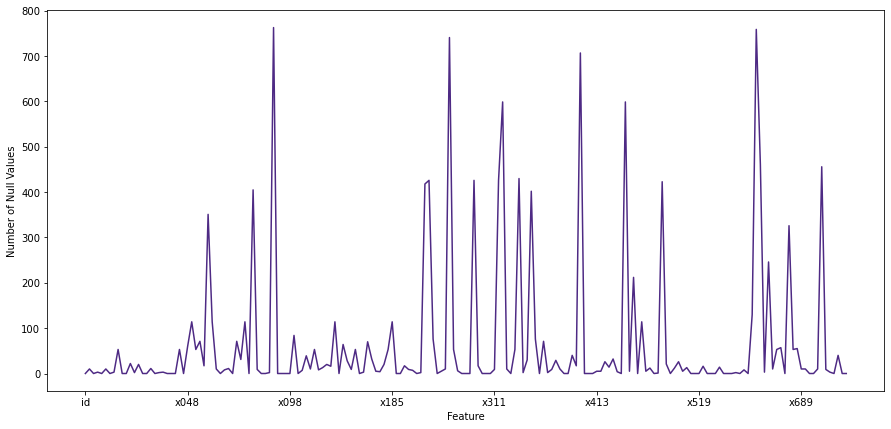

In [36]:
null_counts = train.isnull().sum()
null_counts.plot(kind='line', figsize = (15,7), color = "#4E2A84")
plt.xlabel('Feature')
plt.ylabel('Number of Null Values')
plt.show()

In [308]:
# Remove columns with more than 250 missing values

train = train.loc[:, train.isnull().sum() < 250]

In [309]:
train

,id,x001,x002,x003,x004,x005,x006,x007,x008,x009,...,x752,x753,x755,x756,x757,x758,x759,x763,x764,y
0,0,9.681860e+10,6991.15,7.76,0.00380,5.378811e+09,0.31,266117.20,934577.0,14539.0,...,0.02,150.68,3.37,1.5707,0.0007,297281012,0.13,8.5127,14.28,5
1,1,3.304810e+09,13914.43,5.37,0.00015,1.652405e+09,0.00,11927742.92,1798051.0,1051272.0,...,0.02,128.73,2.40,0.1173,0.1136,3320000000000,0.08,1.5700,160.12,1
2,2,3.218944e+10,3991.98,5.77,0.00010,2.476111e+09,0.00,774385.01,375738.0,144143.0,...,-0.13,110.56,6.67,0.4582,0.0029,100474819,0.39,9.6800,25.06,11
3,3,1.288000e+10,15937.45,5.86,0.00020,2.146667e+09,0.00,6324375.16,1932094.0,10055.0,...,0.03,127.61,7.40,0.3816,0.0000,348000000000,0.25,4.5316,117.76,1
4,4,3.063412e+10,3621.00,7.52,0.00060,1.392460e+09,0.21,169860.29,474253.0,17914.0,...,0.04,130.48,1.14,0.0100,0.0005,109546590,0.11,16.2717,5.81,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5375,5375,3.948791e+09,24563.46,6.73,0.00035,9.871977e+08,0.43,3303184.55,3154159.0,4439.0,...,0.03,127.57,15.10,1.3758,0.0000,158603315,0.05,2.7480,93.45,4
5376,5376,9.279017e+10,21572.94,6.96,0.00120,3.093006e+09,0.30,2649164.57,2934417.0,19106.0,...,0.08,127.09,4.38,0.2230,0.0003,36089167,0.01,23.6890,76.05,8
5377,5377,2.700359e+10,23061.73,6.36,0.00065,3.857656e+09,0.35,1825306.07,2395841.0,71514.0,...,0.07,153.06,1.87,0.1300,0.0057,1786891,0.53,4.3710,80.30,21
5378,5378,4.351107e+10,5739.04,7.80,0.00065,1.318517e+09,0.29,144103.12,715173.0,13977.0,...,-0.04,120.57,7.51,0.2719,0.0001,194000000000,0.29,24.6594,7.95,13


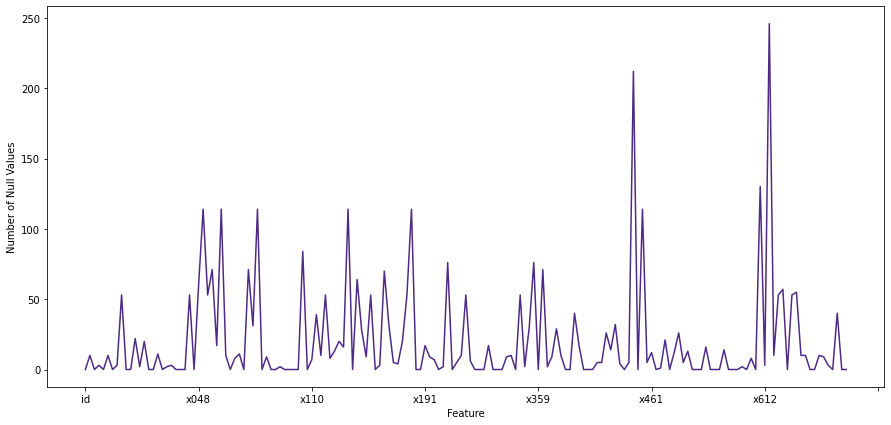

In [40]:
null_counts = train.isnull().sum()
null_counts.plot(kind='line', figsize = (15,7), color = "#4E2A84")
plt.xlabel('Feature')
plt.ylabel('Number of Null Values')
plt.show()

In [310]:
# Create X and y datasets to train the model

train = train.drop(columns = 'id')
X = train.drop(columns = 'y')
y = train['y']

In [44]:
features_final = list(set(train.columns))
features_final.remove('y')

In [45]:
X = X[features_final]

In [46]:
Xtest = test[features_final]

In [ ]:
#Xtest = test[features_final]
Xtest = test.drop(columns = 'id')

In [215]:
imputer = KNNImputer(n_neighbors=5)
X = pd.DataFrame(imputer.fit_transform(X),columns = X.columns)

Xtest_imp = pd.DataFrame(imputer.fit_transform(Xtest),columns = Xtest.columns)

In [ ]:
sc = StandardScaler()

sc.fit(X)
X_scaled = sc.transform(X)
Xtest_scaled_imp = sc.transform(Xtest_imp)

In [ ]:
X_scaled = pd.DataFrame(X_scaled, columns= X.columns)
Xtest_scaled = pd.DataFrame(Xtest_scaled, columns= Xtest.columns)

In [51]:
model = Earth(max_terms=500, max_degree=1) # note, terms in brackets are the hyperparameters
model.fit(X,y)

C:\Users\rolfe\anaconda3\lib\site-packages\pyearth\earth.py:813: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
C:\Users\rolfe\anaconda3\lib\site-packages\pyearth\earth.py:1066: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coef, resid = np.linalg.lstsq(B, weighted_y[:, i])[0:2]


Earth(max_degree=1, max_terms=500)

In [53]:
#Predicted values
pred = model.predict(Xtest_imp)
pred

array([10.43769867, 11.02790645, 10.97347145, ..., 10.54073553,
       11.03309513, 11.03368787])

In [ ]:
len(pred)

In [54]:
predictions_regression = pd.DataFrame({"id" : test.id, "y": pred})
predictions_regression.to_csv("Predictions_Regression.csv",index = False)

In [273]:
train = train.drop(columns = 'id')
X = train.drop(columns = 'y')
y = train['y']

In [311]:
imputer = KNNImputer(n_neighbors=5)
X = pd.DataFrame(imputer.fit_transform(X),columns = X.columns)

In [312]:
sc = StandardScaler()

sc.fit(X)
X_scaled = sc.transform(X)

In [313]:
pca = PCA()
pca.fit(X_scaled)

PCA()

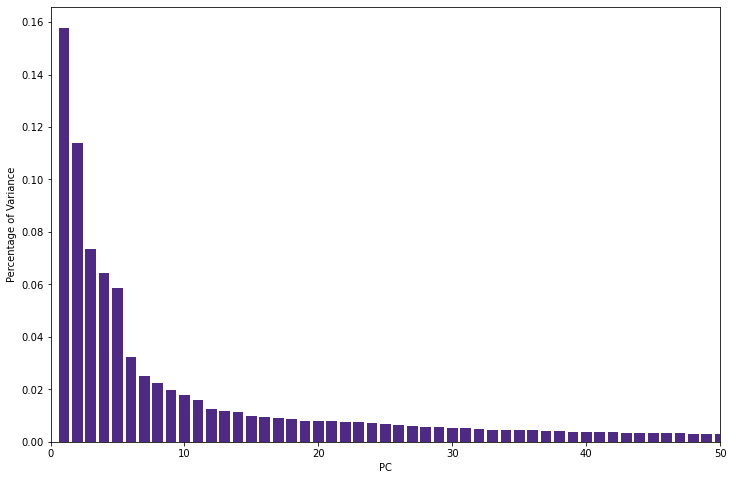

In [326]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.bar(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, color = "#4E2A84")
plt.xlabel('PC')
plt.ylabel('Percentage of Variance')
plt.xlim(0,50)
plt.show()

In [198]:
X

,x001,x002,x003,x004,x005,x006,x007,x009,x013,x014,...,x689,x694,x700,x703,x707,x727,x729,x734,x737,x750
0,9.681860e+10,6991.15,7.76,0.00380,5.378811e+09,0.31,266117.20,14539.0,56.695,4.82,...,2.698472e+40,0.620862,5.710000e+18,0.0,5.868856e+20,0.00,4.27,2.0,1.35495,0.50
1,3.304810e+09,13914.43,5.37,0.00015,1.652405e+09,0.00,11927742.92,1051272.0,95.000,4.00,...,1.637550e+37,-0.289669,1.514432e+24,0.0,5.550000e+18,0.09,4.27,8.0,-0.87106,0.50
2,3.218944e+10,3991.98,5.77,0.00010,2.476111e+09,0.00,774385.01,144143.0,92.600,6.62,...,8.962143e+38,0.471359,7.722351e+19,0.0,8.889789e+19,0.00,3.68,7.0,1.39396,0.36
3,1.288000e+10,15937.45,5.86,0.00020,2.146667e+09,0.00,6324375.16,10055.0,92.130,5.60,...,1.573669e+38,0.779931,1.781405e+23,0.0,2.873263e+19,0.00,4.23,6.0,1.34729,0.50
4,3.063412e+10,3621.00,7.52,0.00060,1.392460e+09,0.21,169860.29,17914.0,94.550,2.43,...,1.053288e+38,0.617454,8.240000e+17,0.0,4.466674e+19,0.90,4.15,16.0,1.46264,0.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5375,3.948791e+09,24563.46,6.73,0.00035,9.871977e+08,0.43,3303184.55,4439.0,80.000,10.88,...,4.191467e+36,-1.042866,2.831957e+22,0.0,3.970000e+18,0.00,4.52,7.0,1.15515,0.43
5376,9.279017e+10,21572.94,6.96,0.00120,3.093006e+09,0.30,2649164.57,19106.0,97.760,5.40,...,3.644168e+39,-0.746450,1.414013e+22,0.0,3.020891e+20,0.00,4.61,4.0,1.31724,0.46
5377,2.700359e+10,23061.73,6.36,0.00065,3.857656e+09,0.35,1825306.07,71514.0,94.940,4.58,...,2.283664e+39,0.825979,5.221551e+21,0.0,1.136738e+20,0.00,3.87,8.0,1.31993,0.45
5378,4.351107e+10,5739.04,7.80,0.00065,1.318517e+09,0.29,144103.12,13977.0,101.510,5.68,...,1.225853e+38,-0.629057,4.520000e+17,0.0,5.948391e+19,0.00,4.01,2.0,1.30878,0.39


Feature Selection on Full Dataset/Removing Redundant Features

In [883]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [884]:
test_id = test.id

train = train.drop(columns = 'id')
test = test.drop(columns = 'id')

X = train.drop(columns = 'y')
y = train['y']

In [885]:
test = test[X.columns]

sc = StandardScaler()
sc.fit(X)
X_train = sc.transform(X)
X_test = sc.transform(test)

X_train = pd.DataFrame(X_train, columns= X.columns)
X_test = pd.DataFrame(X_test, columns= X.columns)

In [715]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)
print(train.shape)
print(test.shape)

(5380, 765)
(5380, 765)
(4403, 765)
(5380, 766)
(4403, 765)


In [342]:
corr_matrix = X_train.corr()

In [716]:
high_corr_threshold = 0.99
high_corr_features = set()

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > high_corr_threshold:
            feature_name = corr_matrix.columns[i]
            high_corr_features.add(feature_name)

In [717]:
X_train = X_train.drop(high_corr_features, axis=1)
X_test = X_test.loc[:,X_train.columns]

In [671]:
correlations = X_train.corrwith(y_train)

higher_corr_features = correlations[abs(correlations) >= 0.01].index
X_train = X_train[higher_corr_features]
X_test = X_test.loc[:,X_train.columns]

In [886]:
imputer = KNNImputer(n_neighbors=15)
X_train = pd.DataFrame(imputer.fit_transform(X_train),columns = X_train.columns)
X_test = pd.DataFrame(imputer.fit_transform(X_test),columns = X_test.columns)

In [887]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)
print(train.shape)
print(test.shape)

(5380, 765)
(5380, 765)
(4403, 765)
(5380, 766)
(4403, 765)


In [888]:
# Log y
log_y = np.log(y)

Training Data Split

In [751]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train = train.drop(columns = 'id')
X = train.drop(columns = 'y')
y = train['y']

X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(X, y, test_size = 0.2, random_state = 42)

sc = StandardScaler()
sc.fit(X_train_split)
X_train_split = sc.transform(X_train_split)
X_test_split = sc.transform(X_test_split)

X_train_split = pd.DataFrame(X_train_split, columns= X.columns)
X_test_split = pd.DataFrame(X_test_split, columns= X.columns)

In [691]:
corr_matrix = X_train.corr()

In [721]:
high_corr_threshold = 0.99
high_corr_features = set()

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > high_corr_threshold:
            feature_name = corr_matrix.columns[i]
            high_corr_features.add(feature_name)

In [752]:
X_train_split = X_train_split.drop(high_corr_features, axis=1)
X_test_split = X_test_split.loc[:,X_train_split.columns]

In [753]:
imputer = KNNImputer(n_neighbors=5)
X_train_split = pd.DataFrame(imputer.fit_transform(X_train_split),columns = X_train_split.columns)
X_test_split = pd.DataFrame(imputer.fit_transform(X_test_split),columns = X_test_split.columns)

In [754]:
# Log y
log_y_train_split = np.log(y_train_split)
log_y_test_split = np.log(y_test_split)

In [755]:
print(X.shape)
print(X_train_split.shape)
print(X_test_split.shape)
print(X_train.shape)
print(X_test.shape)
print(log_y_train_split.shape)
print(log_y_test_split.shape)
print(log_y.shape)

(5380, 765)
(4304, 464)
(1076, 464)
(5380, 464)
(4403, 464)
(4304,)
(1076,)
(5380,)


Training Data Split (PCA Features)

In [131]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train = train.drop(columns = 'id')
X = train.drop(columns = 'y')
y = train['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

X_train = pd.DataFrame(X_train, columns= X.columns)
X_test = pd.DataFrame(X_test, columns= X.columns)

In [ ]:
corr_matrix = train.corr()

In [132]:
# Imputing missing values
imputer = KNNImputer(n_neighbors=5)
X_train = pd.DataFrame(imputer.fit_transform(X_train),columns = X_train.columns)
X_test = pd.DataFrame(imputer.fit_transform(X_test),columns = X_test.columns)

In [133]:
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.80
to_drop = [column for column in upper.columns if any(upper[column] > 0.80)]

# Drop the highly correlated features
train = train.drop(train[to_drop], axis=1)
train

<ipython-input-133-88d111625d79>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


,x001,x002,x003,x004,x005,x006,x007,x009,x013,x014,...,x707,x712,x719,x727,x729,x734,x737,x741,x750,y
0,9.681860e+10,6991.15,7.76,0.00380,5.378811e+09,0.31,266117.20,14539.0,56.695,4.82,...,586885589994299981824,10.0295,1336.88,0.00,4.27,2.0,1.35495,0.752647,0.50,5
1,3.304810e+09,13914.43,5.37,0.00015,1.652405e+09,0.00,11927742.92,1051272.0,95.000,4.00,...,5550000000000000000,NaN,13877.56,0.09,4.27,8.0,-0.87106,0.959400,0.50,1
2,3.218944e+10,3991.98,5.77,0.00010,2.476111e+09,0.00,774385.01,144143.0,92.600,6.62,...,88897890482495995904,8.5580,5267.48,0.00,3.68,7.0,1.39396,0.908315,0.36,11
3,1.288000e+10,15937.45,5.86,0.00020,2.146667e+09,0.00,6324375.16,10055.0,92.130,5.60,...,28732631875074998272,2.7726,359.02,0.00,4.23,6.0,1.34729,0.941133,0.50,1
4,3.063412e+10,3621.00,7.52,0.00060,1.392460e+09,0.21,169860.29,17914.0,94.550,2.43,...,44666736442821001216,5.6557,1291.61,0.90,4.15,16.0,1.46264,0.907586,0.45,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5375,3.948791e+09,24563.46,6.73,0.00035,9.871977e+08,0.43,3303184.55,4439.0,80.000,10.88,...,3970000000000000000,0.0000,0.00,0.00,4.52,7.0,1.15515,0.862925,0.43,4
5376,9.279017e+10,21572.94,6.96,0.00120,3.093006e+09,0.30,2649164.57,19106.0,97.760,5.40,...,302089053432449990656,4.6825,819.77,0.00,4.61,4.0,1.31724,0.918410,0.46,8
5377,2.700359e+10,23061.73,6.36,0.00065,3.857656e+09,0.35,1825306.07,71514.0,94.940,4.58,...,113673829679690006528,0.0000,1374.77,0.00,3.87,8.0,1.31993,0.900614,0.45,21
5378,4.351107e+10,5739.04,7.80,0.00065,1.318517e+09,0.29,144103.12,13977.0,101.510,5.68,...,59483907779766001664,4.6474,891.79,0.00,4.01,2.0,1.30878,0.887655,0.39,13


In [134]:
pca = PCA(n_components=0.95, svd_solver = "full")
pca.fit(X_train)
print(pca.n_components_)

123


In [135]:
# transform the pandas dataframe into an array
X_train_transformed = pca.transform(X_train)

# transform the array back into a pandas dataframe
X_train_inverse_transformed = pd.DataFrame(pca.inverse_transform(X_train_transformed)[:, :pca.n_components_],
                                           columns=X_train.columns[:pca.n_components_])

X_train = X_train_inverse_transformed
X_test = X_test.loc[:, X_train.columns]

Full Training and Test Data (PCA Features)

In [96]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

test_id = test.id

train = train.drop(columns = 'id')
test = test.drop(columns = 'id')

In [97]:
corr_matrix = train.corr()

In [98]:
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.80
to_drop = [column for column in upper.columns if any(upper[column] > 0.80)]

len(to_drop)

<ipython-input-98-c52ce255f6c5>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


532

In [99]:
train

,x001,x002,x003,x004,x005,x006,x007,x008,x009,x010,...,x757,x758,x759,x760,x761,x762,x763,x764,x765,y
0,9.681860e+10,6991.15,7.76,0.00380,5.378811e+09,0.31,266117.20,934577.0,14539.0,26900000000000,...,0.0007,297281012,0.13,5.0,5,2.0,8.5127,14.28,-0.75,5
1,3.304810e+09,13914.43,5.37,0.00015,1.652405e+09,0.00,11927742.92,1798051.0,1051272.0,169000000000000000,...,0.1136,3320000000000,0.08,661.0,0,350.0,1.5700,160.12,NaN,1
2,3.218944e+10,3991.98,5.77,0.00010,2.476111e+09,0.00,774385.01,375738.0,144143.0,135000000000000,...,0.0029,100474819,0.39,39.0,2,18.0,9.6800,25.06,-0.49,11
3,1.288000e+10,15937.45,5.86,0.00020,2.146667e+09,0.00,6324375.16,1932094.0,10055.0,37000000000000000,...,0.0000,348000000000,0.25,2.0,1,0.0,4.5316,117.76,1.64,1
4,3.063412e+10,3621.00,7.52,0.00060,1.392460e+09,0.21,169860.29,474253.0,17914.0,6000000000000,...,0.0005,109546590,0.11,11.0,1,3.0,16.2717,5.81,-0.42,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5375,3.948791e+09,24563.46,6.73,0.00035,9.871977e+08,0.43,3303184.55,3154159.0,4439.0,11900000000000000,...,0.0000,158603315,0.05,0.0,0,0.0,2.7480,93.45,0.22,4
5376,9.279017e+10,21572.94,6.96,0.00120,3.093006e+09,0.30,2649164.57,2934417.0,19106.0,7220000000000000,...,0.0003,36089167,0.01,6.0,4,4.0,23.6890,76.05,-0.90,8
5377,2.700359e+10,23061.73,6.36,0.00065,3.857656e+09,0.35,1825306.07,2395841.0,71514.0,3960000000000000,...,0.0057,1786891,0.53,44.0,0,28.0,4.3710,80.30,-0.70,21
5378,4.351107e+10,5739.04,7.80,0.00065,1.318517e+09,0.29,144103.12,715173.0,13977.0,4150000000000,...,0.0001,194000000000,0.29,3.0,2,2.0,24.6594,7.95,0.47,13


In [100]:
# Drop the highly correlated features
train = train.drop(train[to_drop], axis=1)

X = train.drop(columns = 'y')
y = train['y']

# Standardize training data
sc = StandardScaler()

sc.fit(X)
X_train = sc.transform(X)

X_train = pd.DataFrame(X_train, columns= X.columns)

# Match X_test columns to X_train
X_test = test.loc[:, X_train.columns]
X_test = sc.transform(X_test)

# Convert test numpy array to pd df
X_test = pd.DataFrame(X_test, columns= X.columns)

# Change X_train name to X
X = X_train

In [101]:
# Imputing missing values
imputer = KNNImputer(n_neighbors=5)
X_train = pd.DataFrame(imputer.fit_transform(X_train),columns = X_train.columns)
X_test = pd.DataFrame(imputer.fit_transform(X_test),columns = X_test.columns)

In [103]:
pca = PCA(n_components=0.95, svd_solver = "full")
pca.fit(X_train)
print(pca.n_components_)

131


In [114]:
# transform the pandas dataframe into an array
X_train_transformed = pca.transform(X_train)

# transform the array back into a pandas dataframe
X_train_inverse_transformed = pd.DataFrame(pca.inverse_transform(X_train_transformed)[:, :pca.n_components_],
                                           columns=X_train.columns[:pca.n_components_])

X_train = X_train_inverse_transformed
X_test = X_test.loc[:, X_train.columns]

Full Training and Test Data (Few Features)

In [220]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

test_id = test.id

train = train.drop(columns = 'id')
test = test.drop(columns = 'id')

y = train['y']

sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)


X = train.loc[:, ['x014', 'x105', 'x274', 'x096', 'x337', 'x013', 'x027', 'x006', 'x275', 'x035', 'x163', 'x062', 'x074', 'x135', 'x165', 'x017', 'x003']]
X_test = test.loc[:, X.columns]

# Imputing missing values
imputer = KNNImputer(n_neighbors=10)
X = pd.DataFrame(imputer.fit_transform(X),columns = X.columns)
X_test = pd.DataFrame(imputer.fit_transform(X_test),columns = X_test.columns)

Training Data Split

In [772]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

test_id = test.id
train = train.drop(columns = 'id')
X = train.drop(columns = 'y')
y = train['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)


X_train = pd.DataFrame(X_train, columns= X.columns)
X_test = pd.DataFrame(X_test, columns= X.columns)

In [774]:
X_train = X_train.loc[:, ['x102', 'x105', 'x355', 'x420', 'x014', 'x619', 'x561', 'x702', 'x114', 'x118', 'x427', 'x749', 'x425', 'x581', 'x511', 'x392', 'x100', 'x508', 'x017', 'x541', 'x555', 'x096', 'x487', 'x517']]
X_test = X_test.loc[:, X_train.columns]

In [775]:
imputer = KNNImputer(n_neighbors=5)
X_train = pd.DataFrame(imputer.fit_transform(X_train),columns = X_train.columns)
X_test = pd.DataFrame(imputer.fit_transform(X_test),columns = X_test.columns)

In [781]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4304, 24)
(1076, 24)
(4304,)
(1076,)


Full Training and Test Data (Few Features)

In [97]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

test_id = test.id

train = train.drop(columns = 'id')
test = test.drop(columns = 'id')

X = train.drop(columns = 'y')
y = train['y']

In [98]:
X = X.loc[:, ['x102','x105','x567','x561','x702','x114','x253','x355','x118','x111','x264','x039','x321', 'x047','x092','x265','x017','x003','x142','x527']]
X_test = test.loc[:, X.columns]

In [99]:
imputer = KNNImputer(n_neighbors=5)
X = pd.DataFrame(imputer.fit_transform(X),columns = X.columns)
X_test = pd.DataFrame(imputer.fit_transform(X_test),columns = X_test.columns)

In [100]:
X_train_small = X
X_test_small = X_test

Full train and test

In [263]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

test_id = test.id

train = train.drop(columns = 'id')
test = test.drop(columns = 'id')

X = train.drop(columns = 'y')
y = train['y']
log_y = np.log(y)

sc = StandardScaler()
sc.fit(X)
X_train = sc.transform(X)
X_test = sc.transform(test)

X = pd.DataFrame(X_train, columns= X.columns)
X_test = pd.DataFrame(test, columns= X.columns)

imputer = KNNImputer(n_neighbors=5)
X = pd.DataFrame(imputer.fit_transform(X),columns = X.columns)
X_test = pd.DataFrame(imputer.fit_transform(X_test),columns = X_test.columns)

Models

MARS

In [559]:
mars = Earth(max_degree = 1, feature_importance_type = 'rss')
mars.fit(X_train, log_y)

C:\Users\rolfe\anaconda3\lib\site-packages\pyearth\earth.py:813: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
C:\Users\rolfe\anaconda3\lib\site-packages\pyearth\earth.py:1066: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coef, resid = np.linalg.lstsq(B, weighted_y[:, i])[0:2]


Earth(feature_importance_type='rss', max_degree=1)

In [560]:
mars.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.01116912,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.03193323, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [561]:
# Assuming you have trained a MARS model and stored it in the variable 'mars_model'
# Assuming you have a list of feature names stored in the variable 'feature_names'

# Step 1: Retrieve the feature importances
mars_feature_importances = mars.feature_importances_

# Step 2: Sort the feature names based on importances
mars_sorted_indices = np.argsort(mars_feature_importances)[::-1]
mars_sorted_feature_names = [feature_names[i] for i in mars_sorted_indices]
mars_sorted_importances = mars_feature_importances[mars_sorted_indices]

# Step 3: Create an array with feature names and importances in order
mars_feature_importances_array = np.column_stack((mars_sorted_feature_names, mars_sorted_importances))

In [564]:
mars_feature_importances_array[:21]

array([['x102', '0.34092334057760953'],
       ['x118', '0.1361649585255345'],
       ['x561', '0.10366211241674587'],
       ['x355', '0.0965036865718886'],
       ['x253', '0.07291521175384752'],
       ['x108', '0.06000733539910293'],
       ['x591', '0.04228059416802462'],
       ['x047', '0.03193322842820341'],
       ['x147', '0.02084709857803995'],
       ['x420', '0.017989063719293916'],
       ['x092', '0.011919585072790078'],
       ['x369', '0.011473147944153854'],
       ['x567', '0.011425028648758195'],
       ['x005', '0.011169124938608955'],
       ['x694', '0.010405111847505418'],
       ['x692', '0.00808797691894995'],
       ['x756', '0.006999028540666301'],
       ['x700', '0.0025004161053283815'],
       ['x321', '0.001699087081230366'],
       ['x333', '0.0005891721732039634'],
       ['x154', '0.0005056905905136954']], dtype='<U32')

In [565]:
X_train_mars = X_train[mars_sorted_feature_names[:21]]
X_test_mars = X_test.loc[:,X_train_mars.columns]

In [567]:
X_train_mars = pd.DataFrame(imputer.fit_transform(X_train_mars),columns = X_train_mars.columns)
X_test_mars = pd.DataFrame(imputer.fit_transform(X_test_mars),columns = X_test_mars.columns)

In [855]:
mars = Earth(max_degree = 1, feature_importance_type = 'rss')
mars.fit(X_train_mars, log_y)

C:\Users\rolfe\anaconda3\lib\site-packages\pyearth\earth.py:813: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
C:\Users\rolfe\anaconda3\lib\site-packages\pyearth\earth.py:1066: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coef, resid = np.linalg.lstsq(B, weighted_y[:, i])[0:2]


Earth(feature_importance_type='rss', max_degree=1)

In [760]:
X_train_mars_split, X_test_mars_split, log_y_train_mars_split, log_y_test_mars_split = train_test_split(X_train_mars, log_y, test_size=0.2, random_state=42)

In [839]:
print(X_train_mars.shape)
print(X_test_mars.shape)
print(X_train_mars_split.shape)
print(X_test_mars_split.shape)
print(log_y_train_mars_split.shape)
print(log_y_test_mars_split.shape)

(5380, 21)
(4403, 21)
(4304, 21)
(1076, 21)
(4304,)
(1076,)


In [853]:
mars_split = Earth(max_degree = 1, feature_importance_type = 'rss', random_seed = 42)
mars_split.fit(X_train_mars_split, log_y_train_mars_split)

TypeError: __init__() got an unexpected keyword argument 'random_seed'

In [833]:
# Make predictions on the validation set using the best model
y_pred_split = mars_split.predict(X_test_mars_split)
y_pred_split = np.exp(y_pred_split)

rmse = mean_squared_error(log_y_test_mars_split, y_pred_split, squared = False)
print("Validation RMSE:", rmse)

Validation RMSE: 7.2670660076831055


Bagged MARS

In [36]:
# Create the base MARS model
mars = Earth()

# Create the bagged MARS model
bmars = BaggingRegressor(base_estimator=mars,
                         n_estimators=30,
                         random_state=42)

# Train the bagged MARS model
bmars.fit(X_train, log_y)

C:\Users\rolfe\anaconda3\lib\site-packages\pyearth\earth.py:813: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
C:\Users\rolfe\anaconda3\lib\site-packages\pyearth\earth.py:1066: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coef, resid = np.linalg.lstsq(B, weighted_y[:, i])[0:2]
C:\Users\rolfe\anaconda3\lib\site-packages\pyearth\earth.py:813: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the 

C:\Users\rolfe\anaconda3\lib\site-packages\pyearth\earth.py:813: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
C:\Users\rolfe\anaconda3\lib\site-packages\pyearth\earth.py:1066: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coef, resid = np.linalg.lstsq(B, weighted_y[:, i])[0:2]
C:\Users\rolfe\anaconda3\lib\site-packages\pyearth\earth.py:813: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the 

C:\Users\rolfe\anaconda3\lib\site-packages\pyearth\earth.py:813: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
C:\Users\rolfe\anaconda3\lib\site-packages\pyearth\earth.py:1066: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coef, resid = np.linalg.lstsq(B, weighted_y[:, i])[0:2]
C:\Users\rolfe\anaconda3\lib\site-packages\pyearth\earth.py:813: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the 

BaggingRegressor(base_estimator=Earth(), n_estimators=30, random_state=42)

Neural Network

In [788]:
network = Sequential()

network.add(InputLayer(input_shape = (X_train.shape[1],)))
network.add(Dropout(0.3))
network.add(Dense(100, activation='relu', kernel_initializer='he_normal'))
network.add(Dropout(0.3))
network.add(Dense(50, activation='relu', kernel_initializer=HeNormal()))
network.add(Dropout(0.3))
network.add(Dense(25, activation='relu', kernel_initializer=HeNormal()))
network.add(Dropout(0.3))
network.add(Dense(10, activation='relu', kernel_initializer=HeNormal()))

network.add(Dense(1, activation='softmax'))

# Compile the model
network.compile(loss='mean_squared_error', optimizer=Adam(), metrics = 'accuracy')

# Train the model
network.fit(X_train, log_y_train, epochs=100, batch_size=32)

Epoch 1/100
135/135 [==============================] - 0s 1ms/step - loss: 1.3874 - accuracy: 0.0000e+00
Epoch 2/100
135/135 [==============================] - 0s 1ms/step - loss: 1.3874 - accuracy: 0.0000e+00
Epoch 3/100
135/135 [==============================] - 0s 1ms/step - loss: 1.3874 - accuracy: 0.0000e+00
Epoch 4/100
135/135 [==============================] - 0s 1ms/step - loss: 1.3874 - accuracy: 0.0000e+00
Epoch 5/100
135/135 [==============================] - 0s 1ms/step - loss: 1.3874 - accuracy: 0.0000e+00
Epoch 6/100
135/135 [==============================] - 0s 1ms/step - loss: 1.3874 - accuracy: 0.0000e+00
Epoch 7/100
135/135 [==============================] - 0s 1ms/step - loss: 1.3874 - accuracy: 0.0000e+00
Epoch 8/100
135/135 [==============================] - 0s 1ms/step - loss: 1.3874 - accuracy: 0.0000e+00
Epoch 9/100
135/135 [==============================] - 0s 1ms/step - loss: 1.3874 - accuracy: 0.0000e+00
Epoch 10/100
135/135 [==============================] -

In [379]:
# Define the model architecture
model = Sequential()
model.add(Dense(64, input_dim = X_train.shape[1], activation='relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1))

# Compile the model
model.compile(loss='mean_squared_error', optimizer=Adam())

# Train the model
model.fit(X_train, log_y_train, validation_data=(X_test, log_y_test), epochs = 100, batch_size=32)

Epoch 1/100
135/135 [==============================] - 0s 1ms/step - loss: 1.0771 - val_loss: 0.8214
Epoch 2/100
135/135 [==============================] - 0s 951us/step - loss: 0.5774 - val_loss: 0.7418
Epoch 3/100
135/135 [==============================] - 0s 836us/step - loss: 0.4641 - val_loss: 0.7057
Epoch 4/100
135/135 [==============================] - 0s 718us/step - loss: 0.3995 - val_loss: 0.7253
Epoch 5/100
135/135 [==============================] - 0s 732us/step - loss: 0.3484 - val_loss: 0.6846
Epoch 6/100
135/135 [==============================] - 0s 816us/step - loss: 0.3081 - val_loss: 0.6882
Epoch 7/100
135/135 [==============================] - 0s 841us/step - loss: 0.2838 - val_loss: 0.6924
Epoch 8/100
135/135 [==============================] - 0s 860us/step - loss: 0.2649 - val_loss: 0.7068
Epoch 9/100
135/135 [==============================] - 0s 774us/step - loss: 0.2557 - val_loss: 0.7141
Epoch 10/100
135/135 [==============================] - 0s 942us/step - los

Epoch 80/100
135/135 [==============================] - 0s 808us/step - loss: 0.0257 - val_loss: 0.7158
Epoch 81/100
135/135 [==============================] - 0s 771us/step - loss: 0.0225 - val_loss: 0.7393
Epoch 82/100
135/135 [==============================] - 0s 724us/step - loss: 0.0229 - val_loss: 0.7118
Epoch 83/100
135/135 [==============================] - 0s 784us/step - loss: 0.0239 - val_loss: 0.7456
Epoch 84/100
135/135 [==============================] - 0s 756us/step - loss: 0.0256 - val_loss: 0.7217
Epoch 85/100
135/135 [==============================] - 0s 747us/step - loss: 0.0269 - val_loss: 0.7550
Epoch 86/100
135/135 [==============================] - 0s 815us/step - loss: 0.0219 - val_loss: 0.7281
Epoch 87/100
135/135 [==============================] - 0s 844us/step - loss: 0.0217 - val_loss: 0.7281
Epoch 88/100
135/135 [==============================] - 0s 811us/step - loss: 0.0205 - val_loss: 0.7157
Epoch 89/100
135/135 [==============================] - 0s 879us

In [791]:
log_y_pred = network.predict(X_test)
y_pred = np.exp(log_y_pred)

rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Validation RMSE:", rmse)

Validation RMSE: 12.451855074911201


Lasso

In [547]:
# Create and fit the Lasso regression model
lasso_split = Lasso(alpha=0.1)  # You can adjust the value of alpha to control the amount of regularization
lasso_split.fit(X_train_split, log_y_train_split)

Lasso(alpha=0.1)

In [550]:
# Make predictions on the validation set using the best model
y_pred_split = lasso_split.predict(X_test_split)
y_pred_split = np.exp(y_pred_split)

# Evaluate the best model
rmse = mean_squared_error(y_test_split, y_pred_split, squared=False)
print("Validation RMSE:", rmse)

Validation RMSE: 10.147490102419926


In [87]:
# Obtain the feature importances (absolute coefficients) from the trained model
lasso_feature_importances = np.abs(lasso.coef_)

# Create a list of (feature importance, feature name) tuples
lasso_importance_tuples = [(importance, feature) for importance, feature in zip(lasso_feature_importances, X_train.columns)]

# Sort the list in descending order based on feature importance
lasso_importance_tuples.sort(reverse=True)

# Print the feature importances in order
for importance, feature in lasso_importance_tuples:
    print(f"Feature: {feature} Importance: {importance}")

Feature: x253 Importance: 4.218654989130061
Feature: x118 Importance: 3.058296320501228
Feature: x567 Importance: 2.332908061818881
Feature: x561 Importance: 2.306572391746665
Feature: x102 Importance: 2.0400510279136737
Feature: x427 Importance: 2.037675910156329
Feature: x105 Importance: 1.3707797233496175
Feature: x632 Importance: 1.27679995967642
Feature: x017 Importance: 0.9556257960150809
Feature: x581 Importance: 0.7792954652078328
Feature: x619 Importance: 0.7142583090378326
Feature: x114 Importance: 0.7003243831179534
Feature: x369 Importance: 0.6573205771663173
Feature: x111 Importance: 0.6542474598155178
Feature: x006 Importance: 0.6285288302714603
Feature: x532 Importance: 0.6237853886650697
Feature: x174 Importance: 0.5652837713361859
Feature: x014 Importance: 0.5089213024796949
Feature: x526 Importance: 0.48612005951256027
Feature: x699 Importance: 0.47615917877823605
Feature: x003 Importance: 0.4256704238495963
Feature: x317 Importance: 0.41311346743250066
Feature: x365 

CatBoost

In [1069]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)
print(train.shape)
print(test.shape)
print(log_y.shape)

(5380, 765)
(5380, 765)
(4403, 765)
(5380, 766)
(4403, 765)
(5380,)


In [1070]:
cat_base = CatBoostRegressor()
cat_base.fit(X_train, log_y, verbose=False)

In [1071]:
# Get the feature importances from the CatBoost model
cat_feature_importances = cat_base.feature_importances_

# Create a DataFrame to store the feature names and importances
cat_feature_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': cat_feature_importances})

# Sort the DataFrame by feature importances in descending order
cat_sorted_features = cat_feature_df.sort_values(by='Importance', ascending=False)

In [1073]:
cat_sorted_features[:649]

,Feature,Importance
701,x702,5.469913
104,x105,4.600148
566,x567,4.398086
145,x146,2.173444
117,x118,1.993282
...,...,...
673,x674,0.003731
75,x076,0.003046
165,x166,0.002401
124,x125,0.002214


In [1074]:
# Take the top X features
cat_top_features = cat_sorted_features.head(649)

# Get the feature names as a list
cat_top_feature_names = cat_top_features['Feature'].tolist()

# Filter the training data using the top feature names
cat_X_train_filtered = X_train[cat_top_feature_names]

In [1075]:
cat_X_test_filtered = X_test.loc[:,cat_X_train_filtered.columns]

In [1076]:
print(cat_X_train_filtered.shape)
print(cat_X_test_filtered.shape)

(5380, 649)
(4403, 649)


In [1077]:
cat = CatBoostRegressor()
cat.fit(cat_X_train_filtered, log_y, verbose=False)

In [1078]:
# Get the feature importances from the CatBoost model
cat_feature_importances_2 = cat.feature_importances_

# Create a DataFrame to store the feature names and importances
cat_feature_df_2 = pd.DataFrame({'Feature': cat_X_train_filtered.columns, 'Importance': cat_feature_importances_2})

# Sort the DataFrame by feature importances in descending order
cat_sorted_features_2 = cat_feature_df_2.sort_values(by='Importance', ascending=False)

In [1080]:
cat_sorted_features_2[:607]

,Feature,Importance
0,x702,5.366743
1,x105,4.687491
2,x567,4.211362
8,x102,2.106081
12,x724,1.731988
...,...,...
608,x697,0.002586
517,x485,0.002400
637,x167,0.001353
562,x464,0.000803


In [1081]:
# Take the top X features
cat_top_features_2 = cat_sorted_features_2.head(607)

# Get the feature names as a list
cat_top_feature_names_2 = cat_top_features_2['Feature'].tolist()

# Filter the training data using the top feature names
cat_X_train_filtered_2 = cat_X_train_filtered[cat_top_feature_names_2]

cat_X_test_filtered_2 = cat_X_test_filtered.loc[:,cat_X_train_filtered_2.columns]

In [1102]:
cat = CatBoostRegressor(iterations = 750,
                        depth = 6,
                        l2_leaf_reg = 4,
                        border_count = 256,
                        learning_rate = 0.08,
                        random_state = 0)
cat.fit(cat_X_train_filtered_2, log_y, verbose=False)

In [975]:
# Calculate the residuals for training data
resid = log_y - cat.predict(cat_X_train_filtered_3)

# Fit a MARS model to the residuals
mars_resid = Earth()
mars_resid.fit(cat_X_train_filtered_3, resid)

# Use the MARS model to predict the residuals for training data
mars_resid_pred = mars_resid.predict(cat_X_train_filtered_3)

# Combine the CatBoost predictions with the MARS predictions for training data
combined_pred_train = cat.predict(cat_X_train_filtered_3) + mars_resid_pred

# Use the combined predictions on test data (since we don't have true y_test)
combined_pred_test = cat.predict(cat_X_test_filtered_3) + mars_resid.predict(cat_X_test_filtered_3)


C:\Users\rolfe\anaconda3\lib\site-packages\pyearth\earth.py:813: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
C:\Users\rolfe\anaconda3\lib\site-packages\pyearth\earth.py:1066: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coef, resid = np.linalg.lstsq(B, weighted_y[:, i])[0:2]


In [992]:
# Make predictions on the validation set using the best model
y_pred = combined_pred_test
y_pred = np.exp(y_pred)

#Export to csv
predictions_regression = pd.DataFrame({"id" : test_id, "y": y_pred})
predictions_regression.to_csv("Predictions_Regression.csv",index = False)

In [991]:
np.min(y_pred)

0.6852434335829339

CatBoost (split)

In [710]:
cat_split_base = CatBoostRegressor(iterations=300,  # Number of boosting iterations
                        depth=6,          # Depth of each tree
                        learning_rate=0.1, # Learning rate
                        random_seed=42)   # Random seed for reproducibility
cat_split_base.fit(X_train_mars_split, log_y_train_mars_split, verbose=False)


In [756]:
cat_split_base = CatBoostRegressor(random_state = 42)
cat_split_base.fit(X_train_split, log_y_train_split, verbose=False)


In [757]:
# Get the feature importances from the CatBoost model
cat_split_feature_importances = cat_split_base.feature_importances_

# Create a DataFrame to store the feature names and importances
cat_split_feature_df = pd.DataFrame({'Feature': X_train_split.columns, 'Importance': cat_split_feature_importances})

# Sort the DataFrame by feature importances in descending order
cat_split_sorted_features = cat_split_feature_df.sort_values(by='Importance', ascending=False)

# Take the top X features
cat_split_top_features = cat_split_sorted_features.head(150)

# Get the feature names as a list
cat_split_top_feature_names = cat_split_top_features['Feature'].tolist()

# Filter the training data using the top feature names
cat_split_X_train_filtered = X_train_split[cat_split_top_feature_names]

cat_split_X_test_filtered = X_test_split.loc[:,cat_split_X_train_filtered.columns]

In [519]:
cat_split = CatBoostRegressor(iterations=300,  # Number of boosting iterations
                        depth=6,          # Depth of each tree
                        learning_rate=0.1, # Learning rate
                        random_seed=42)   # Random seed for reproducibility
cat_split.fit(cat_split_X_train_filtered, log_y_train_split, verbose=False)

In [758]:
cat_split= CatBoostRegressor(random_state = 42)
cat_split.fit(cat_split_X_train_filtered, log_y_train_split, verbose=False)


In [759]:
# Make predictions on the validation set using the best model
y_pred_split = cat_split.predict(X_test_split)
y_pred_split = np.exp(y_pred_split)

# Evaluate the best model
rmse = mean_squared_error(y_test_split, y_pred_split, squared=False)
print("Validation RMSE:", rmse)

Validation RMSE: 8.516851701304402


In [737]:
y_pred_split[:400]

array([ 8.4613747 ,  3.68809743,  4.96979424,  2.33929373,  8.32241504,
        4.42282658,  6.24231678,  6.37021603,  3.7029136 ,  4.03331811,
        2.3724643 ,  9.09005505,  7.26870372,  4.15601248,  2.95256576,
        7.797208  , 10.10427389,  4.988563  , 13.76013317,  4.69330085,
        3.83238606, 15.46353199,  4.22770534,  3.01533165, 11.23766202,
        4.84658774,  6.08946103,  3.34808   ,  4.41262299,  6.95207302,
       15.02690335,  2.53436071, 10.74907278,  3.15985668, 20.01256627,
        9.17317874,  2.77953854,  6.30822908,  4.84573791,  2.26408229,
       33.25546814,  2.4542946 ,  2.97836776,  5.65193354, 13.5321903 ,
        7.43411759,  1.530766  ,  2.19236474,  2.52814436,  8.96693475,
        6.31814938, 13.12372024,  2.70107365,  5.08408947, 22.4338129 ,
       10.18047747,  6.51381986,  7.24986718,  2.29898434,  2.59259451,
        3.26363857,  9.39313285,  3.31646151,  3.52553766,  1.22310176,
        3.29113403,  1.81673919,  6.97939712,  9.53910816,  8.08

In [689]:
# Make predictions on the validation set using the best model
y_pred = cat.predict(X_test)

#Export to csv
predictions_regression = pd.DataFrame({"id" : test_id, "y": y_pred})
predictions_regression.to_csv("Predictions_Regression.csv",index = False)

In [90]:
# Get the feature importances
feature_importances = cat_l.get_feature_importance()

# Create a dictionary to map feature names to importances
feature_importance_dict = {feature_name: importance for feature_name, importance in zip(cat_l.feature_names_, feature_importances)}

# Sort the features by importance (descending order)
sorted_feature_importances = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Print the feature importances
for feature_name, importance in sorted_feature_importances:
    print(f"{feature_name}: {importance}")

x102: 9.003454611580903
x105: 6.3159982878265035
x567: 3.335057749811409
x561: 3.2670500813586236
x702: 2.5121126363387765
x114: 2.449567103851875
x253: 2.4473583543660204
x355: 2.183509771621629
x118: 2.1360754379813445
x420: 2.000579247569262
x014: 1.647335801970812
x111: 1.4368601945953225
x073: 1.2949908458888035
x165: 1.2618239366505652
x027: 1.222809506783995
x425: 1.1225594776513954
x619: 1.0904361100347948
x017: 1.006788998554607
x744: 0.977257324371026
x488: 0.9655742593672162
x427: 0.9614281914075367
x543: 0.9480751190129212
x640: 0.869322577740308
x585: 0.8498041103000523
x161: 0.8094430101553989
x174: 0.7360416639578199
x286: 0.7292071122259204
x369: 0.7174834979760216
x311: 0.6938806644222498
x079: 0.6810533527368954
x003: 0.6810251989124326
x020: 0.678254815113022
x163: 0.6625741245382849
x047: 0.6481054113432739
x305: 0.6440187732789303
x532: 0.6283731662292815
x390: 0.6271448565181882
x051: 0.6110067619572346
x540: 0.6096108633171262
x289: 0.5983149583981276
x749: 0.575

CatBoost (small)

In [283]:
cat_s = CatBoostRegressor(iterations=300,  # Number of boosting iterations
                         depth=4,          # Depth of each tree
                         learning_rate=0.01, # Learning rate
                         random_seed=1)   # Random seed for reproducibility
cat_s.fit(X_mars, log_y, verbose=False)


In [284]:
# Make predictions on the validation set using the best model
y_pred = cat_s.predict(test_mars)
y_pred = np.exp(y_pred)

#Export to csv
predictions_regression = pd.DataFrame({"id" : test_id, "y": y_pred})
predictions_regression.to_csv("Predictions_Regression.csv",index = False)

In [285]:
y_pred

array([7.49240128, 7.81770183, 7.16381235, ..., 7.68881001, 8.77068361,
       8.69551163])

LGBMRegressor

In [806]:
print(X_train_mars_split.shape)
print(log_y_train_mars_split.shape)

(4304, 21)
(4304,)


In [1159]:
param_grid = {
    'n_estimators': [800,1000,1200],
    'max_depth': [7,8,9],
    'learning_rate': [.001,.01,.03,],
    'subsample': [0.5, 1.0, 3.0],
    'colsample_bytree': [0.6, 0.75, 0.9],
    'reg_alpha': [0.5, 1.0, 3.0],
    'reg_lambda': [0.0, 0.5, 1.0],
    'num_leaves': [15,20,25]
}

lgbm = lgb.LGBMRegressor(random_state = 100)
random_search = RandomizedSearchCV(lgbm, param_distributions=param_grid, n_iter=20, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
random_search.fit(X_train_mars, log_y)

print("Best Parameters: ", random_search.best_params_)
print("Best Score: ", random_search.best_score_)

C:\Users\rolfe\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [-0.67096208 -0.49998177         nan -0.4975677  -0.5043196  -0.67139914
 -0.65147715         nan         nan         nan -0.49687023 -0.49910103
 -0.49637267 -0.4963319  -0.49464758 -0.49839014 -0.69002606 -0.68743353
         nan -0.49975234]
  warnings.warn(


Best Parameters:  {'subsample': 1.0, 'reg_lambda': 1.0, 'reg_alpha': 0.5, 'num_leaves': 15, 'n_estimators': 800, 'max_depth': 9, 'learning_rate': 0.03, 'colsample_bytree': 0.9}
Best Score:  -0.494647580437345


In [1101]:
lgbm = LGBMRegressor(
    objective = 'regression',
    n_estimators = 1200,
    num_leaves=15,
    learning_rate=0.01,
    colsample_bytree=0.6,
    subsample = 1.0,
    reg_lambda = 0,
    reg_alpha = 0,
    max_depth = 9
)

# Train the LGBMRegressor model
lgbm.fit(X_train_mars, log_y)

LGBMRegressor(colsample_bytree=0.6, learning_rate=0.01, max_depth=9,
              n_estimators=1200, num_leaves=15, objective='regression',
              random_state=0, reg_alpha=0.5)

In [999]:
# Make predictions on the validation set using the best model
y_pred_split = lgbm.predict(X_test_mars_split)
y_pred_split = np.exp(y_pred_split)

rmse = mean_squared_error(log_y_test_mars_split, y_pred_split, squared = False)
print("Validation RMSE:", rmse)

Validation RMSE: 6.836645709310177


LightGBM

In [401]:
lgb_X_train, lgb_X_test, lgb_y_train, lgb_y_test = train_test_split(X_mars, log_y, test_size=0.2)

In [1098]:
lgb_train_data_mars = lgb.Dataset(X_train_mars_split, label=log_y_train_mars_split)

lgbm_params = {
    'objective': 'regression',
    'metric': 'mse',  # Mean Squared Error
    'boosting_type': 'gbdt',
    'num_leaves': 10,
    'learning_rate': 0.01,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 10,
    'verbose': 0
}

lgbm = lgb.train(lgbm_params, lgb_train_data_mars, num_boost_round=100)


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000607 seconds.
You can set `force_col_wise=true` to remove the overhead.


In [605]:
# Make predictions on the validation set using the best model
y_pred = lgbm.predict(X_test_mars_split)
y_pred = np.exp(y_pred)

y_pred[:500]

array([14.86256402,  2.46608866,  6.42820482,  2.17155055,  6.79341166,
        2.94666084,  6.83386585,  6.05540428,  2.71365737,  7.25737043,
        2.3279502 , 15.36337912,  7.6941213 ,  7.91139245,  5.25119979,
       11.35782521,  8.49894725,  5.6094166 , 20.86085802,  4.6694702 ,
        3.5942218 , 17.19864263,  5.02111265,  2.64138127, 13.48686678,
        5.56924794,  3.72033701,  4.84383547,  4.62037366,  8.65744619,
       17.65226459,  1.57568395, 10.59351313,  8.28496861, 18.57528826,
        6.29875567,  4.48521281,  7.86468142,  5.86708437,  2.47363258,
       29.03503189,  3.6214052 ,  3.70938141,  3.74182583, 10.19182994,
        8.46152338,  1.49446039,  2.32925777,  2.36198662, 13.25411508,
       10.68669334, 13.15122931,  1.8048223 ,  5.25245577, 15.77401955,
       14.27448555,  6.77836187, 11.43037489,  2.64279435,  2.33549101,
        2.62348284, 13.28353941,  2.14946922,  3.81446442,  1.09000072,
        3.3208854 ,  1.42478399, 10.24163659,  9.52042128,  6.56

In [787]:
# Make predictions on the validation set using the best model
y_pred_split = lgbm.predict(X_test_mars_split)
y_pred_split = np.exp(y_pred_split)

rmse = mean_squared_error(log_y_test_mars_split, y_pred_split, squared = False)
print("Validation RMSE:", rmse)

Validation RMSE: 4.0371421495150575


XGBoost

In [91]:
xg = xgb.XGBRegressor(n_estimators = 500,
                      max_depth = 4,
                      learning_rate = 0.12, # Learning rate
                      random_state = 1)
xg.fit(X_train_large, y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.12, max_delta_step=0,
             max_depth=4, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=500, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=1, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [658]:
# Make predictions on the validation set using the best model
y_pred = xg.predict(X_test)
#y_pred = np.exp(log_y_pred)

# Evaluate the best model
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Validation RMSE:", rmse)

Validation RMSE: 8.886762256681607


In [92]:
# Get feature importances
importance = xg.feature_importances_
feature_names = X.columns

# Sort feature importances in descending order
sorted_indices = np.argsort(importance)[::-1]
sorted_importance = importance[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Print feature importances sorted by importance
for feature, importance_score in zip(sorted_feature_names, sorted_importance):
    print(f"{feature}: {importance_score}")


x277: 0.04532906785607338
x302: 0.03538031876087189
x079: 0.03206981346011162
x084: 0.02773773856461048
x267: 0.02662956342101097
x184: 0.024214619770646095
x209: 0.02364036627113819
x297: 0.01952414959669113
x295: 0.018207905814051628
x212: 0.015816355124115944
x158: 0.015397715382277966
x062: 0.01475572120398283
x263: 0.01332798507064581
x107: 0.012548431754112244
x118: 0.012081080116331577
x183: 0.012053052894771099
x112: 0.010934929363429546
x233: 0.00967133603990078
x191: 0.009197129867970943
x081: 0.009050688706338406
x309: 0.008676432073116302
x317: 0.008225864730775356
x338: 0.008124547079205513
x142: 0.008063828572630882
x257: 0.007146100979298353
x311: 0.007143582683056593
x059: 0.006965863984078169
x104: 0.006803217343986034
x188: 0.006680110469460487
x322: 0.00667263800278306
x105: 0.006531090009957552
x148: 0.0064547923393547535
x041: 0.006275497376918793
x314: 0.006225691642612219
x294: 0.006081095430999994
x067: 0.006054752506315708
x028: 0.005878772586584091
x254: 0.005

Random Forest

In [786]:
rf = RandomForestRegressor(n_estimators = 300,
                           max_depth = 18,
                           max_leaf_nodes = 500,
                           max_features = 15,
                           random_state=1,
                           n_jobs=-1).fit(X_train, y_train)

In [787]:
# Make predictions on the validation set using the best model
y_pred = rf.predict(X_test)
#y_pred = np.exp(log_y_pred)

# Evaluate the best model
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Validation RMSE:", rmse)

Validation RMSE: 8.985610625913313


In [706]:
# Extract feature importances
importance_values = rf.feature_importances_
feature_importances = sorted(zip(X_train.columns, importance_values), key=lambda x: x[1], reverse=True)

# Print feature importances
print("Feature Importances:")
for feature, importance in feature_importances:
    print(f"{feature}: {importance}")

Feature Importances:
x102: 0.01977653202171789
x105: 0.01910021532223768
x355: 0.019024438938358756
x420: 0.016181975898588333
x014: 0.016063460728208995
x619: 0.013746359274822281
x561: 0.013084264811126387
x702: 0.012651554742002543
x114: 0.011859621221917341
x118: 0.010902966418062383
x427: 0.010732295268611079
x749: 0.010364416110094934
x425: 0.009866004235673406
x581: 0.009539963070334051
x378: 0.00809195048339791
x073: 0.007831672049313086
x096: 0.007827820871440993
x265: 0.007521862751221959
x543: 0.00714283373317394
x017: 0.00692081067751801
x239: 0.0067918359042663
x165: 0.006551107173776191
x585: 0.006415233328084137
x253: 0.00628265563928293
x365: 0.006265704912116049
x003: 0.006232549575635426
x656: 0.006089460786807521
x654: 0.005848311845138261
x496: 0.005807268137241863
x487: 0.005604515680763282
x399: 0.0055112392879753174
x161: 0.005471791019199017
x694: 0.005418870000632628
x274: 0.005336418528399005
x296: 0.005146723485234148
x360: 0.005112741627484896
x353: 0.005093

Adaboost

In [877]:
ada = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=6), 
                        learning_rate = 0.1,
                        n_estimators= 150,
                        random_state= 42)
ada.fit(cat_X_train_filtered, log_y)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=6),
                  learning_rate=0.1, n_estimators=150, random_state=42)

In [878]:
# Make predictions on the validation set using the best model
y_pred = ada.predict(cat_X_test_filtered)
y_pred = np.exp(y_pred)

y_pred[:500]

array([ 3.69836041,  3.64376289,  2.44465995,  4.92032824,  3.48990907,
        4.12222942, 20.53154454,  7.65246543,  2.54864684,  5.17388492,
        4.83911434,  2.4720246 ,  2.39216647,  2.47486021, 14.84403685,
        8.55403165,  8.18637822,  2.72185525,  5.22630947,  8.92014071,
        7.14665547,  4.97393428,  3.42540647,  5.75968589, 12.19216106,
        6.5249819 , 10.3682991 ,  6.96603197,  2.46816113,  2.57328306,
        2.30214067,  2.93428163,  2.67636129,  5.76087434,  5.94823762,
        2.18018574,  2.99846978,  6.59685263,  4.03097088, 10.3682991 ,
        5.4363887 ,  5.45702606,  2.7215884 , 19.21963493,  9.78854491,
        9.85095829, 11.01039427,  9.63342708,  2.93428163,  7.00723356,
        2.38599008, 12.79945497,  2.66689304, 10.57591141, 15.35539086,
        9.16089632,  2.13310723,  7.64357492,  7.41372011,  2.70641876,
        6.55051393,  2.60395739,  2.13310723, 12.57637266,  3.58372436,
        4.05813122,  8.1658923 ,  2.41793529,  5.50915034,  2.08

In [201]:
# Extract feature importances
importance_values = ada.feature_importances_
feature_importances = sorted(zip(X_train.columns, importance_values), key=lambda x: x[1], reverse=True)

# Print feature importances
print("Feature Importances:")
for feature, importance in feature_importances:
    print(f"{feature}: {importance}")

Feature Importances:
x014: 0.10025605358199001
x102: 0.09192324134872404
x118: 0.04960586830331342
x105: 0.03439314716639101
x114: 0.032026761546809085
x006: 0.024901607705402704
x003: 0.023111101874610414
x073: 0.0213413553698642
x047: 0.016992465009923036
x096: 0.015781698258381615
x108: 0.014381615373277382
x001: 0.01435722867919573
x072: 0.013605435750683945
x017: 0.01312053469849562
x025: 0.012857211533403908
x103: 0.01248313665993234
x032: 0.012404524516798328
x082: 0.011202276893270819
x079: 0.010668772709916181
x080: 0.010639858505523373
x116: 0.010353029321323997
x031: 0.009596008374993619
x027: 0.009546450001308084
x051: 0.008721728919346123
x052: 0.008614835455287535
x117: 0.008578324442687907
x090: 0.008315579608125331
x050: 0.00806557750289994
x005: 0.007959996857884238
x045: 0.007741164014547894
x075: 0.007547395184067365
x077: 0.007502477753178103
x100: 0.00733743311807077
x043: 0.007154248304751491
x098: 0.007103920123818751
x023: 0.007076464856440715
x007: 0.0069506956

Ensemble (split)

In [791]:
class LightGBMWrapper(BaseEstimator, RegressorMixin):
    def __init__(self, params=None):
        self.model = lgb.LGBMRegressor(**params)
        self.params = params
    
    def fit(self, X, y):
        self.model.fit(X, y)
        return self
    
    def predict(self, X):
        return self.model.predict(X)

In [792]:
lgbm_split = LightGBMWrapper(params= lgbm_params)

In [841]:
#Stacking using LinearRegression as the meta-model
en=StackingRegressor(estimators = [('cat',cat_split),('lgbm',lgbm_split),('mars',mars_split)],
                     final_estimator=CatBoostRegressor(),                                          
                     cv = KFold(n_splits = 5, shuffle = True, random_state=1))
en.fit(X_train_split, log_y_train_split)

Learning rate set to 0.051562
0:	learn: 0.9810218	total: 119ms	remaining: 1m 59s
1:	learn: 0.9668513	total: 213ms	remaining: 1m 46s
2:	learn: 0.9536341	total: 302ms	remaining: 1m 40s
3:	learn: 0.9406815	total: 380ms	remaining: 1m 34s
4:	learn: 0.9293982	total: 463ms	remaining: 1m 32s
5:	learn: 0.9190966	total: 544ms	remaining: 1m 30s
6:	learn: 0.9081293	total: 630ms	remaining: 1m 29s
7:	learn: 0.8991080	total: 725ms	remaining: 1m 29s
8:	learn: 0.8900552	total: 818ms	remaining: 1m 30s
9:	learn: 0.8811767	total: 907ms	remaining: 1m 29s
10:	learn: 0.8721149	total: 990ms	remaining: 1m 29s
11:	learn: 0.8645910	total: 1.07s	remaining: 1m 27s
12:	learn: 0.8574353	total: 1.14s	remaining: 1m 26s
13:	learn: 0.8509262	total: 1.23s	remaining: 1m 26s
14:	learn: 0.8441043	total: 1.32s	remaining: 1m 26s
15:	learn: 0.8382649	total: 1.42s	remaining: 1m 27s
16:	learn: 0.8324334	total: 1.51s	remaining: 1m 27s
17:	learn: 0.8277615	total: 1.61s	remaining: 1m 27s
18:	learn: 0.8227426	total: 1.7s	remaining: 

159:	learn: 0.6282235	total: 13.9s	remaining: 1m 12s
160:	learn: 0.6271569	total: 13.9s	remaining: 1m 12s
161:	learn: 0.6264744	total: 14s	remaining: 1m 12s
162:	learn: 0.6258918	total: 14.1s	remaining: 1m 12s
163:	learn: 0.6253948	total: 14.2s	remaining: 1m 12s
164:	learn: 0.6247975	total: 14.3s	remaining: 1m 12s
165:	learn: 0.6240679	total: 14.4s	remaining: 1m 12s
166:	learn: 0.6234767	total: 14.5s	remaining: 1m 12s
167:	learn: 0.6228263	total: 14.6s	remaining: 1m 12s
168:	learn: 0.6220831	total: 14.7s	remaining: 1m 12s
169:	learn: 0.6215573	total: 14.8s	remaining: 1m 12s
170:	learn: 0.6209624	total: 14.9s	remaining: 1m 12s
171:	learn: 0.6199089	total: 15s	remaining: 1m 12s
172:	learn: 0.6193411	total: 15.1s	remaining: 1m 12s
173:	learn: 0.6180915	total: 15.2s	remaining: 1m 12s
174:	learn: 0.6175349	total: 15.3s	remaining: 1m 12s
175:	learn: 0.6169220	total: 15.4s	remaining: 1m 12s
176:	learn: 0.6158083	total: 15.5s	remaining: 1m 11s
177:	learn: 0.6152910	total: 15.6s	remaining: 1m 1

319:	learn: 0.5192185	total: 29.1s	remaining: 1m 1s
320:	learn: 0.5186425	total: 29.2s	remaining: 1m 1s
321:	learn: 0.5178904	total: 29.3s	remaining: 1m 1s
322:	learn: 0.5174879	total: 29.3s	remaining: 1m 1s
323:	learn: 0.5166584	total: 29.4s	remaining: 1m 1s
324:	learn: 0.5158106	total: 29.5s	remaining: 1m 1s
325:	learn: 0.5150025	total: 29.6s	remaining: 1m 1s
326:	learn: 0.5142918	total: 29.7s	remaining: 1m 1s
327:	learn: 0.5136696	total: 29.8s	remaining: 1m 1s
328:	learn: 0.5130830	total: 29.9s	remaining: 1m
329:	learn: 0.5124000	total: 30s	remaining: 1m
330:	learn: 0.5114800	total: 30.1s	remaining: 1m
331:	learn: 0.5109262	total: 30.2s	remaining: 1m
332:	learn: 0.5103345	total: 30.3s	remaining: 1m
333:	learn: 0.5099285	total: 30.4s	remaining: 1m
334:	learn: 0.5095436	total: 30.5s	remaining: 1m
335:	learn: 0.5088967	total: 30.6s	remaining: 1m
336:	learn: 0.5080979	total: 30.7s	remaining: 1m
337:	learn: 0.5075153	total: 30.7s	remaining: 1m
338:	learn: 0.5068446	total: 30.8s	remaining

481:	learn: 0.4314127	total: 44.5s	remaining: 47.8s
482:	learn: 0.4309093	total: 44.6s	remaining: 47.7s
483:	learn: 0.4304630	total: 44.7s	remaining: 47.6s
484:	learn: 0.4298071	total: 44.8s	remaining: 47.5s
485:	learn: 0.4293282	total: 44.8s	remaining: 47.4s
486:	learn: 0.4287748	total: 44.9s	remaining: 47.3s
487:	learn: 0.4282629	total: 45s	remaining: 47.2s
488:	learn: 0.4278609	total: 45.1s	remaining: 47.2s
489:	learn: 0.4275804	total: 45.2s	remaining: 47.1s
490:	learn: 0.4272538	total: 45.3s	remaining: 47s
491:	learn: 0.4270536	total: 45.4s	remaining: 46.9s
492:	learn: 0.4267296	total: 45.5s	remaining: 46.8s
493:	learn: 0.4263190	total: 45.6s	remaining: 46.7s
494:	learn: 0.4260468	total: 45.7s	remaining: 46.6s
495:	learn: 0.4255113	total: 45.8s	remaining: 46.5s
496:	learn: 0.4252132	total: 45.9s	remaining: 46.4s
497:	learn: 0.4247915	total: 46s	remaining: 46.4s
498:	learn: 0.4245392	total: 46.1s	remaining: 46.3s
499:	learn: 0.4241416	total: 46.2s	remaining: 46.2s
500:	learn: 0.4237

640:	learn: 0.3669446	total: 59.7s	remaining: 33.4s
641:	learn: 0.3666314	total: 59.8s	remaining: 33.3s
642:	learn: 0.3661721	total: 59.9s	remaining: 33.2s
643:	learn: 0.3656553	total: 60s	remaining: 33.2s
644:	learn: 0.3650967	total: 1m	remaining: 33.1s
645:	learn: 0.3647062	total: 1m	remaining: 33s
646:	learn: 0.3643081	total: 1m	remaining: 32.9s
647:	learn: 0.3638616	total: 1m	remaining: 32.8s
648:	learn: 0.3633866	total: 1m	remaining: 32.7s
649:	learn: 0.3630483	total: 1m	remaining: 32.6s
650:	learn: 0.3627325	total: 1m	remaining: 32.5s
651:	learn: 0.3621308	total: 1m	remaining: 32.4s
652:	learn: 0.3617721	total: 1m	remaining: 32.3s
653:	learn: 0.3615516	total: 1m	remaining: 32.2s
654:	learn: 0.3610197	total: 1m 1s	remaining: 32.1s
655:	learn: 0.3604011	total: 1m 1s	remaining: 32s
656:	learn: 0.3600433	total: 1m 1s	remaining: 32s
657:	learn: 0.3595778	total: 1m 1s	remaining: 31.9s
658:	learn: 0.3592252	total: 1m 1s	remaining: 31.8s
659:	learn: 0.3588851	total: 1m 1s	remaining: 31.7

800:	learn: 0.3104181	total: 1m 14s	remaining: 18.6s
801:	learn: 0.3100232	total: 1m 14s	remaining: 18.5s
802:	learn: 0.3097611	total: 1m 15s	remaining: 18.4s
803:	learn: 0.3095271	total: 1m 15s	remaining: 18.3s
804:	learn: 0.3090873	total: 1m 15s	remaining: 18.2s
805:	learn: 0.3087237	total: 1m 15s	remaining: 18.1s
806:	learn: 0.3085527	total: 1m 15s	remaining: 18s
807:	learn: 0.3082880	total: 1m 15s	remaining: 17.9s
808:	learn: 0.3079338	total: 1m 15s	remaining: 17.8s
809:	learn: 0.3076228	total: 1m 15s	remaining: 17.7s
810:	learn: 0.3072419	total: 1m 15s	remaining: 17.6s
811:	learn: 0.3069085	total: 1m 15s	remaining: 17.6s
812:	learn: 0.3066427	total: 1m 15s	remaining: 17.5s
813:	learn: 0.3062579	total: 1m 16s	remaining: 17.4s
814:	learn: 0.3059757	total: 1m 16s	remaining: 17.3s
815:	learn: 0.3056650	total: 1m 16s	remaining: 17.2s
816:	learn: 0.3054361	total: 1m 16s	remaining: 17.1s
817:	learn: 0.3050985	total: 1m 16s	remaining: 17s
818:	learn: 0.3047720	total: 1m 16s	remaining: 16.

957:	learn: 0.2654888	total: 1m 29s	remaining: 3.93s
958:	learn: 0.2651744	total: 1m 29s	remaining: 3.83s
959:	learn: 0.2649646	total: 1m 29s	remaining: 3.74s
960:	learn: 0.2648627	total: 1m 29s	remaining: 3.65s
961:	learn: 0.2646453	total: 1m 29s	remaining: 3.55s
962:	learn: 0.2643617	total: 1m 30s	remaining: 3.46s
963:	learn: 0.2641885	total: 1m 30s	remaining: 3.37s
964:	learn: 0.2638655	total: 1m 30s	remaining: 3.27s
965:	learn: 0.2634744	total: 1m 30s	remaining: 3.18s
966:	learn: 0.2632317	total: 1m 30s	remaining: 3.08s
967:	learn: 0.2630046	total: 1m 30s	remaining: 2.99s
968:	learn: 0.2627244	total: 1m 30s	remaining: 2.9s
969:	learn: 0.2623516	total: 1m 30s	remaining: 2.8s
970:	learn: 0.2620070	total: 1m 30s	remaining: 2.71s
971:	learn: 0.2616538	total: 1m 30s	remaining: 2.62s
972:	learn: 0.2614897	total: 1m 30s	remaining: 2.52s
973:	learn: 0.2611811	total: 1m 31s	remaining: 2.43s
974:	learn: 0.2609903	total: 1m 31s	remaining: 2.34s
975:	learn: 0.2607366	total: 1m 31s	remaining: 2

C:\Users\rolfe\anaconda3\lib\site-packages\pyearth\earth.py:813: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
C:\Users\rolfe\anaconda3\lib\site-packages\pyearth\earth.py:1066: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coef, resid = np.linalg.lstsq(B, weighted_y[:, i])[0:2]


Learning rate set to 0.049775
0:	learn: 0.9828676	total: 108ms	remaining: 1m 48s
1:	learn: 0.9687887	total: 198ms	remaining: 1m 38s
2:	learn: 0.9559235	total: 286ms	remaining: 1m 35s
3:	learn: 0.9439961	total: 384ms	remaining: 1m 35s
4:	learn: 0.9329814	total: 472ms	remaining: 1m 34s
5:	learn: 0.9227010	total: 569ms	remaining: 1m 34s
6:	learn: 0.9127790	total: 669ms	remaining: 1m 34s
7:	learn: 0.9034614	total: 761ms	remaining: 1m 34s
8:	learn: 0.8951855	total: 862ms	remaining: 1m 34s
9:	learn: 0.8870110	total: 961ms	remaining: 1m 35s
10:	learn: 0.8777260	total: 1.04s	remaining: 1m 33s
11:	learn: 0.8705297	total: 1.15s	remaining: 1m 34s
12:	learn: 0.8636000	total: 1.23s	remaining: 1m 33s
13:	learn: 0.8557647	total: 1.33s	remaining: 1m 33s
14:	learn: 0.8494788	total: 1.43s	remaining: 1m 33s
15:	learn: 0.8433568	total: 1.52s	remaining: 1m 33s
16:	learn: 0.8378253	total: 1.62s	remaining: 1m 33s
17:	learn: 0.8326455	total: 1.71s	remaining: 1m 33s
18:	learn: 0.8275576	total: 1.83s	remaining:

158:	learn: 0.6228095	total: 15s	remaining: 1m 19s
159:	learn: 0.6220184	total: 15.1s	remaining: 1m 19s
160:	learn: 0.6215636	total: 15.2s	remaining: 1m 19s
161:	learn: 0.6203150	total: 15.3s	remaining: 1m 18s
162:	learn: 0.6197552	total: 15.4s	remaining: 1m 18s
163:	learn: 0.6190688	total: 15.5s	remaining: 1m 18s
164:	learn: 0.6184112	total: 15.6s	remaining: 1m 18s
165:	learn: 0.6175397	total: 15.7s	remaining: 1m 18s
166:	learn: 0.6169437	total: 15.7s	remaining: 1m 18s
167:	learn: 0.6164306	total: 15.8s	remaining: 1m 18s
168:	learn: 0.6153648	total: 15.9s	remaining: 1m 18s
169:	learn: 0.6146961	total: 16s	remaining: 1m 18s
170:	learn: 0.6138335	total: 16.1s	remaining: 1m 18s
171:	learn: 0.6133863	total: 16.2s	remaining: 1m 18s
172:	learn: 0.6123482	total: 16.3s	remaining: 1m 18s
173:	learn: 0.6113818	total: 16.4s	remaining: 1m 18s
174:	learn: 0.6105352	total: 16.5s	remaining: 1m 17s
175:	learn: 0.6097454	total: 16.6s	remaining: 1m 17s
176:	learn: 0.6092245	total: 16.7s	remaining: 1m 1

315:	learn: 0.5048894	total: 30.3s	remaining: 1m 5s
316:	learn: 0.5042239	total: 30.4s	remaining: 1m 5s
317:	learn: 0.5033573	total: 30.5s	remaining: 1m 5s
318:	learn: 0.5027674	total: 30.6s	remaining: 1m 5s
319:	learn: 0.5022950	total: 30.7s	remaining: 1m 5s
320:	learn: 0.5017683	total: 30.8s	remaining: 1m 5s
321:	learn: 0.5010416	total: 30.9s	remaining: 1m 4s
322:	learn: 0.5004494	total: 31s	remaining: 1m 4s
323:	learn: 0.4994855	total: 31.1s	remaining: 1m 4s
324:	learn: 0.4989844	total: 31.2s	remaining: 1m 4s
325:	learn: 0.4982776	total: 31.3s	remaining: 1m 4s
326:	learn: 0.4977126	total: 31.4s	remaining: 1m 4s
327:	learn: 0.4970541	total: 31.5s	remaining: 1m 4s
328:	learn: 0.4963215	total: 31.5s	remaining: 1m 4s
329:	learn: 0.4955336	total: 31.7s	remaining: 1m 4s
330:	learn: 0.4947217	total: 31.8s	remaining: 1m 4s
331:	learn: 0.4941159	total: 31.9s	remaining: 1m 4s
332:	learn: 0.4937225	total: 32s	remaining: 1m 4s
333:	learn: 0.4931317	total: 32.1s	remaining: 1m 3s
334:	learn: 0.49

477:	learn: 0.4165881	total: 46.1s	remaining: 50.4s
478:	learn: 0.4159234	total: 46.2s	remaining: 50.3s
479:	learn: 0.4152086	total: 46.3s	remaining: 50.2s
480:	learn: 0.4144170	total: 46.4s	remaining: 50.1s
481:	learn: 0.4138529	total: 46.5s	remaining: 50s
482:	learn: 0.4134948	total: 46.6s	remaining: 49.9s
483:	learn: 0.4128103	total: 46.7s	remaining: 49.8s
484:	learn: 0.4121719	total: 46.8s	remaining: 49.7s
485:	learn: 0.4116977	total: 46.9s	remaining: 49.6s
486:	learn: 0.4113225	total: 47s	remaining: 49.5s
487:	learn: 0.4107310	total: 47.1s	remaining: 49.4s
488:	learn: 0.4102638	total: 47.2s	remaining: 49.3s
489:	learn: 0.4098409	total: 47.3s	remaining: 49.3s
490:	learn: 0.4092649	total: 47.4s	remaining: 49.1s
491:	learn: 0.4086905	total: 47.5s	remaining: 49.1s
492:	learn: 0.4079255	total: 47.6s	remaining: 49s
493:	learn: 0.4076270	total: 47.7s	remaining: 48.9s
494:	learn: 0.4072946	total: 47.8s	remaining: 48.8s
495:	learn: 0.4069136	total: 47.9s	remaining: 48.7s
496:	learn: 0.4065

638:	learn: 0.3422624	total: 1m 2s	remaining: 35.1s
639:	learn: 0.3418363	total: 1m 2s	remaining: 35s
640:	learn: 0.3415306	total: 1m 2s	remaining: 34.9s
641:	learn: 0.3412847	total: 1m 2s	remaining: 34.8s
642:	learn: 0.3407254	total: 1m 2s	remaining: 34.7s
643:	learn: 0.3402466	total: 1m 2s	remaining: 34.6s
644:	learn: 0.3399479	total: 1m 2s	remaining: 34.5s
645:	learn: 0.3396753	total: 1m 2s	remaining: 34.4s
646:	learn: 0.3392988	total: 1m 2s	remaining: 34.3s
647:	learn: 0.3388378	total: 1m 2s	remaining: 34.2s
648:	learn: 0.3384427	total: 1m 3s	remaining: 34.1s
649:	learn: 0.3380308	total: 1m 3s	remaining: 34s
650:	learn: 0.3376473	total: 1m 3s	remaining: 33.9s
651:	learn: 0.3371837	total: 1m 3s	remaining: 33.8s
652:	learn: 0.3369035	total: 1m 3s	remaining: 33.7s
653:	learn: 0.3363178	total: 1m 3s	remaining: 33.6s
654:	learn: 0.3360236	total: 1m 3s	remaining: 33.5s
655:	learn: 0.3355242	total: 1m 3s	remaining: 33.4s
656:	learn: 0.3352902	total: 1m 3s	remaining: 33.3s
657:	learn: 0.33

796:	learn: 0.2843350	total: 1m 17s	remaining: 19.6s
797:	learn: 0.2842433	total: 1m 17s	remaining: 19.5s
798:	learn: 0.2836693	total: 1m 17s	remaining: 19.4s
799:	learn: 0.2836054	total: 1m 17s	remaining: 19.3s
800:	learn: 0.2831732	total: 1m 17s	remaining: 19.2s
801:	learn: 0.2828532	total: 1m 17s	remaining: 19.2s
802:	learn: 0.2823813	total: 1m 17s	remaining: 19.1s
803:	learn: 0.2820261	total: 1m 17s	remaining: 19s
804:	learn: 0.2815098	total: 1m 17s	remaining: 18.9s
805:	learn: 0.2811167	total: 1m 17s	remaining: 18.8s
806:	learn: 0.2809583	total: 1m 18s	remaining: 18.7s
807:	learn: 0.2804995	total: 1m 18s	remaining: 18.6s
808:	learn: 0.2800937	total: 1m 18s	remaining: 18.5s
809:	learn: 0.2796628	total: 1m 18s	remaining: 18.4s
810:	learn: 0.2794138	total: 1m 18s	remaining: 18.3s
811:	learn: 0.2791166	total: 1m 18s	remaining: 18.2s
812:	learn: 0.2786974	total: 1m 18s	remaining: 18.1s
813:	learn: 0.2785180	total: 1m 18s	remaining: 18s
814:	learn: 0.2782159	total: 1m 18s	remaining: 17.

952:	learn: 0.2389133	total: 1m 31s	remaining: 4.51s
953:	learn: 0.2387672	total: 1m 31s	remaining: 4.42s
954:	learn: 0.2385601	total: 1m 31s	remaining: 4.32s
955:	learn: 0.2382935	total: 1m 31s	remaining: 4.22s
956:	learn: 0.2381421	total: 1m 31s	remaining: 4.13s
957:	learn: 0.2377847	total: 1m 32s	remaining: 4.03s
958:	learn: 0.2375054	total: 1m 32s	remaining: 3.94s
959:	learn: 0.2371590	total: 1m 32s	remaining: 3.84s
960:	learn: 0.2369226	total: 1m 32s	remaining: 3.74s
961:	learn: 0.2366900	total: 1m 32s	remaining: 3.65s
962:	learn: 0.2363733	total: 1m 32s	remaining: 3.55s
963:	learn: 0.2361294	total: 1m 32s	remaining: 3.46s
964:	learn: 0.2359303	total: 1m 32s	remaining: 3.36s
965:	learn: 0.2357364	total: 1m 32s	remaining: 3.26s
966:	learn: 0.2354237	total: 1m 32s	remaining: 3.17s
967:	learn: 0.2352050	total: 1m 32s	remaining: 3.07s
968:	learn: 0.2350001	total: 1m 33s	remaining: 2.98s
969:	learn: 0.2347161	total: 1m 33s	remaining: 2.88s
970:	learn: 0.2345318	total: 1m 33s	remaining:

109:	learn: 0.6635058	total: 10.3s	remaining: 1m 23s
110:	learn: 0.6625517	total: 10.4s	remaining: 1m 23s
111:	learn: 0.6619404	total: 10.5s	remaining: 1m 22s
112:	learn: 0.6612261	total: 10.5s	remaining: 1m 22s
113:	learn: 0.6601033	total: 10.7s	remaining: 1m 22s
114:	learn: 0.6595992	total: 10.8s	remaining: 1m 22s
115:	learn: 0.6586691	total: 10.8s	remaining: 1m 22s
116:	learn: 0.6578684	total: 10.9s	remaining: 1m 22s
117:	learn: 0.6568332	total: 11s	remaining: 1m 22s
118:	learn: 0.6558915	total: 11.1s	remaining: 1m 22s
119:	learn: 0.6550502	total: 11.2s	remaining: 1m 22s
120:	learn: 0.6543991	total: 11.3s	remaining: 1m 22s
121:	learn: 0.6531465	total: 11.4s	remaining: 1m 22s
122:	learn: 0.6519935	total: 11.5s	remaining: 1m 22s
123:	learn: 0.6511948	total: 11.6s	remaining: 1m 22s
124:	learn: 0.6503020	total: 11.7s	remaining: 1m 22s
125:	learn: 0.6497251	total: 11.8s	remaining: 1m 21s
126:	learn: 0.6490496	total: 11.9s	remaining: 1m 21s
127:	learn: 0.6483283	total: 12s	remaining: 1m 2

267:	learn: 0.5358326	total: 25.4s	remaining: 1m 9s
268:	learn: 0.5352339	total: 25.5s	remaining: 1m 9s
269:	learn: 0.5342895	total: 25.6s	remaining: 1m 9s
270:	learn: 0.5340188	total: 25.7s	remaining: 1m 9s
271:	learn: 0.5336094	total: 25.8s	remaining: 1m 8s
272:	learn: 0.5327347	total: 25.8s	remaining: 1m 8s
273:	learn: 0.5317129	total: 25.9s	remaining: 1m 8s
274:	learn: 0.5310789	total: 26s	remaining: 1m 8s
275:	learn: 0.5303329	total: 26.1s	remaining: 1m 8s
276:	learn: 0.5297968	total: 26.2s	remaining: 1m 8s
277:	learn: 0.5290386	total: 26.3s	remaining: 1m 8s
278:	learn: 0.5282382	total: 26.4s	remaining: 1m 8s
279:	learn: 0.5275676	total: 26.5s	remaining: 1m 8s
280:	learn: 0.5267269	total: 26.6s	remaining: 1m 8s
281:	learn: 0.5259900	total: 26.7s	remaining: 1m 7s
282:	learn: 0.5255930	total: 26.8s	remaining: 1m 7s
283:	learn: 0.5245760	total: 26.9s	remaining: 1m 7s
284:	learn: 0.5237041	total: 27s	remaining: 1m 7s
285:	learn: 0.5232741	total: 27s	remaining: 1m 7s
286:	learn: 0.5226

427:	learn: 0.4362391	total: 40.8s	remaining: 54.6s
428:	learn: 0.4356556	total: 40.9s	remaining: 54.5s
429:	learn: 0.4351460	total: 41s	remaining: 54.4s
430:	learn: 0.4348384	total: 41.1s	remaining: 54.3s
431:	learn: 0.4344089	total: 41.2s	remaining: 54.2s
432:	learn: 0.4337104	total: 41.3s	remaining: 54.1s
433:	learn: 0.4332734	total: 41.4s	remaining: 54s
434:	learn: 0.4326330	total: 41.5s	remaining: 53.9s
435:	learn: 0.4321210	total: 41.6s	remaining: 53.8s
436:	learn: 0.4313351	total: 41.7s	remaining: 53.7s
437:	learn: 0.4308603	total: 41.8s	remaining: 53.6s
438:	learn: 0.4302004	total: 41.9s	remaining: 53.5s
439:	learn: 0.4293886	total: 42s	remaining: 53.5s
440:	learn: 0.4288880	total: 42.1s	remaining: 53.4s
441:	learn: 0.4282089	total: 42.2s	remaining: 53.3s
442:	learn: 0.4277213	total: 42.3s	remaining: 53.2s
443:	learn: 0.4271708	total: 42.4s	remaining: 53.1s
444:	learn: 0.4265398	total: 42.5s	remaining: 53s
445:	learn: 0.4260076	total: 42.6s	remaining: 52.9s
446:	learn: 0.425311

588:	learn: 0.3576923	total: 56.7s	remaining: 39.5s
589:	learn: 0.3574258	total: 56.8s	remaining: 39.5s
590:	learn: 0.3569995	total: 56.9s	remaining: 39.4s
591:	learn: 0.3566116	total: 57s	remaining: 39.3s
592:	learn: 0.3561462	total: 57.1s	remaining: 39.2s
593:	learn: 0.3557881	total: 57.2s	remaining: 39.1s
594:	learn: 0.3553998	total: 57.3s	remaining: 39s
595:	learn: 0.3547810	total: 57.4s	remaining: 38.9s
596:	learn: 0.3541891	total: 57.5s	remaining: 38.8s
597:	learn: 0.3536276	total: 57.6s	remaining: 38.7s
598:	learn: 0.3531877	total: 57.7s	remaining: 38.6s
599:	learn: 0.3527602	total: 57.8s	remaining: 38.5s
600:	learn: 0.3524112	total: 57.9s	remaining: 38.4s
601:	learn: 0.3521724	total: 58s	remaining: 38.3s
602:	learn: 0.3516827	total: 58.1s	remaining: 38.2s
603:	learn: 0.3512477	total: 58.2s	remaining: 38.1s
604:	learn: 0.3508539	total: 58.3s	remaining: 38s
605:	learn: 0.3505642	total: 58.4s	remaining: 37.9s
606:	learn: 0.3502041	total: 58.5s	remaining: 37.9s
607:	learn: 0.349885

748:	learn: 0.2971183	total: 1m 12s	remaining: 24.3s
749:	learn: 0.2968015	total: 1m 12s	remaining: 24.2s
750:	learn: 0.2966918	total: 1m 12s	remaining: 24.1s
751:	learn: 0.2963675	total: 1m 12s	remaining: 24s
752:	learn: 0.2959798	total: 1m 12s	remaining: 23.9s
753:	learn: 0.2957904	total: 1m 12s	remaining: 23.8s
754:	learn: 0.2955353	total: 1m 13s	remaining: 23.7s
755:	learn: 0.2950843	total: 1m 13s	remaining: 23.6s
756:	learn: 0.2947871	total: 1m 13s	remaining: 23.5s
757:	learn: 0.2944166	total: 1m 13s	remaining: 23.4s
758:	learn: 0.2941127	total: 1m 13s	remaining: 23.3s
759:	learn: 0.2937663	total: 1m 13s	remaining: 23.2s
760:	learn: 0.2932987	total: 1m 13s	remaining: 23.1s
761:	learn: 0.2929874	total: 1m 13s	remaining: 23s
762:	learn: 0.2925691	total: 1m 13s	remaining: 22.9s
763:	learn: 0.2922027	total: 1m 13s	remaining: 22.8s
764:	learn: 0.2916566	total: 1m 14s	remaining: 22.7s
765:	learn: 0.2913531	total: 1m 14s	remaining: 22.7s
766:	learn: 0.2910123	total: 1m 14s	remaining: 22.

905:	learn: 0.2501113	total: 1m 27s	remaining: 9.12s
906:	learn: 0.2498318	total: 1m 28s	remaining: 9.03s
907:	learn: 0.2494496	total: 1m 28s	remaining: 8.93s
908:	learn: 0.2489770	total: 1m 28s	remaining: 8.84s
909:	learn: 0.2486971	total: 1m 28s	remaining: 8.75s
910:	learn: 0.2484829	total: 1m 28s	remaining: 8.65s
911:	learn: 0.2481686	total: 1m 28s	remaining: 8.56s
912:	learn: 0.2477289	total: 1m 28s	remaining: 8.46s
913:	learn: 0.2472838	total: 1m 28s	remaining: 8.36s
914:	learn: 0.2468731	total: 1m 28s	remaining: 8.26s
915:	learn: 0.2466426	total: 1m 29s	remaining: 8.17s
916:	learn: 0.2463219	total: 1m 29s	remaining: 8.07s
917:	learn: 0.2460085	total: 1m 29s	remaining: 7.97s
918:	learn: 0.2455115	total: 1m 29s	remaining: 7.88s
919:	learn: 0.2454506	total: 1m 29s	remaining: 7.78s
920:	learn: 0.2451534	total: 1m 29s	remaining: 7.68s
921:	learn: 0.2448823	total: 1m 29s	remaining: 7.58s
922:	learn: 0.2446647	total: 1m 29s	remaining: 7.49s
923:	learn: 0.2445548	total: 1m 29s	remaining:

61:	learn: 0.7132210	total: 6.16s	remaining: 1m 33s
62:	learn: 0.7116811	total: 6.26s	remaining: 1m 33s
63:	learn: 0.7106753	total: 6.36s	remaining: 1m 32s
64:	learn: 0.7088963	total: 6.45s	remaining: 1m 32s
65:	learn: 0.7075541	total: 6.56s	remaining: 1m 32s
66:	learn: 0.7061448	total: 6.66s	remaining: 1m 32s
67:	learn: 0.7044286	total: 6.76s	remaining: 1m 32s
68:	learn: 0.7029451	total: 6.87s	remaining: 1m 32s
69:	learn: 0.7018728	total: 6.96s	remaining: 1m 32s
70:	learn: 0.7004956	total: 7.06s	remaining: 1m 32s
71:	learn: 0.6994416	total: 7.17s	remaining: 1m 32s
72:	learn: 0.6983760	total: 7.29s	remaining: 1m 32s
73:	learn: 0.6973479	total: 7.4s	remaining: 1m 32s
74:	learn: 0.6964268	total: 7.5s	remaining: 1m 32s
75:	learn: 0.6955609	total: 7.59s	remaining: 1m 32s
76:	learn: 0.6947209	total: 7.69s	remaining: 1m 32s
77:	learn: 0.6937745	total: 7.79s	remaining: 1m 32s
78:	learn: 0.6928645	total: 7.88s	remaining: 1m 31s
79:	learn: 0.6919246	total: 7.98s	remaining: 1m 31s
80:	learn: 0.6

218:	learn: 0.5763512	total: 21s	remaining: 1m 14s
219:	learn: 0.5755364	total: 21.1s	remaining: 1m 14s
220:	learn: 0.5747940	total: 21.2s	remaining: 1m 14s
221:	learn: 0.5741083	total: 21.3s	remaining: 1m 14s
222:	learn: 0.5732269	total: 21.3s	remaining: 1m 14s
223:	learn: 0.5730162	total: 21.4s	remaining: 1m 14s
224:	learn: 0.5722938	total: 21.5s	remaining: 1m 14s
225:	learn: 0.5715615	total: 21.6s	remaining: 1m 14s
226:	learn: 0.5705910	total: 21.7s	remaining: 1m 13s
227:	learn: 0.5697292	total: 21.8s	remaining: 1m 13s
228:	learn: 0.5689688	total: 21.9s	remaining: 1m 13s
229:	learn: 0.5681815	total: 22s	remaining: 1m 13s
230:	learn: 0.5675761	total: 22.1s	remaining: 1m 13s
231:	learn: 0.5669725	total: 22.2s	remaining: 1m 13s
232:	learn: 0.5664082	total: 22.3s	remaining: 1m 13s
233:	learn: 0.5654686	total: 22.4s	remaining: 1m 13s
234:	learn: 0.5653447	total: 22.5s	remaining: 1m 13s
235:	learn: 0.5642781	total: 22.5s	remaining: 1m 12s
236:	learn: 0.5634641	total: 22.6s	remaining: 1m 1

376:	learn: 0.4698032	total: 35.6s	remaining: 58.9s
377:	learn: 0.4693748	total: 35.7s	remaining: 58.8s
378:	learn: 0.4691442	total: 35.8s	remaining: 58.7s
379:	learn: 0.4685583	total: 35.9s	remaining: 58.6s
380:	learn: 0.4679873	total: 36s	remaining: 58.5s
381:	learn: 0.4672695	total: 36.1s	remaining: 58.4s
382:	learn: 0.4667192	total: 36.2s	remaining: 58.3s
383:	learn: 0.4660253	total: 36.3s	remaining: 58.2s
384:	learn: 0.4654111	total: 36.4s	remaining: 58.1s
385:	learn: 0.4650597	total: 36.4s	remaining: 58s
386:	learn: 0.4646480	total: 36.5s	remaining: 57.9s
387:	learn: 0.4638423	total: 36.6s	remaining: 57.8s
388:	learn: 0.4632354	total: 36.7s	remaining: 57.7s
389:	learn: 0.4624441	total: 36.8s	remaining: 57.6s
390:	learn: 0.4619043	total: 36.9s	remaining: 57.5s
391:	learn: 0.4610299	total: 37s	remaining: 57.4s
392:	learn: 0.4603378	total: 37.1s	remaining: 57.3s
393:	learn: 0.4598585	total: 37.2s	remaining: 57.2s
394:	learn: 0.4591601	total: 37.3s	remaining: 57.1s
395:	learn: 0.4588

537:	learn: 0.3841947	total: 50.6s	remaining: 43.5s
538:	learn: 0.3840262	total: 50.7s	remaining: 43.4s
539:	learn: 0.3839851	total: 50.8s	remaining: 43.3s
540:	learn: 0.3838118	total: 50.9s	remaining: 43.2s
541:	learn: 0.3834194	total: 51s	remaining: 43.1s
542:	learn: 0.3831345	total: 51s	remaining: 43s
543:	learn: 0.3828080	total: 51.1s	remaining: 42.9s
544:	learn: 0.3822714	total: 51.2s	remaining: 42.8s
545:	learn: 0.3818527	total: 51.3s	remaining: 42.7s
546:	learn: 0.3813563	total: 51.4s	remaining: 42.6s
547:	learn: 0.3809695	total: 51.5s	remaining: 42.5s
548:	learn: 0.3804178	total: 51.6s	remaining: 42.4s
549:	learn: 0.3800970	total: 51.7s	remaining: 42.3s
550:	learn: 0.3797872	total: 51.8s	remaining: 42.2s
551:	learn: 0.3791639	total: 51.9s	remaining: 42.1s
552:	learn: 0.3786425	total: 52s	remaining: 42s
553:	learn: 0.3780501	total: 52.1s	remaining: 41.9s
554:	learn: 0.3776455	total: 52.2s	remaining: 41.8s
555:	learn: 0.3773845	total: 52.2s	remaining: 41.7s
556:	learn: 0.3769684	

698:	learn: 0.3203489	total: 1m 6s	remaining: 28.8s
699:	learn: 0.3200018	total: 1m 7s	remaining: 28.7s
700:	learn: 0.3195922	total: 1m 7s	remaining: 28.6s
701:	learn: 0.3190975	total: 1m 7s	remaining: 28.5s
702:	learn: 0.3186006	total: 1m 7s	remaining: 28.4s
703:	learn: 0.3181566	total: 1m 7s	remaining: 28.4s
704:	learn: 0.3179729	total: 1m 7s	remaining: 28.3s
705:	learn: 0.3175988	total: 1m 7s	remaining: 28.2s
706:	learn: 0.3173501	total: 1m 7s	remaining: 28.1s
707:	learn: 0.3170251	total: 1m 7s	remaining: 28s
708:	learn: 0.3165313	total: 1m 7s	remaining: 27.9s
709:	learn: 0.3162035	total: 1m 8s	remaining: 27.8s
710:	learn: 0.3156642	total: 1m 8s	remaining: 27.7s
711:	learn: 0.3155857	total: 1m 8s	remaining: 27.6s
712:	learn: 0.3155561	total: 1m 8s	remaining: 27.5s
713:	learn: 0.3151883	total: 1m 8s	remaining: 27.4s
714:	learn: 0.3148594	total: 1m 8s	remaining: 27.3s
715:	learn: 0.3144853	total: 1m 8s	remaining: 27.2s
716:	learn: 0.3141387	total: 1m 8s	remaining: 27.1s
717:	learn: 0.

854:	learn: 0.2676529	total: 1m 22s	remaining: 14.1s
855:	learn: 0.2672131	total: 1m 22s	remaining: 14s
856:	learn: 0.2668335	total: 1m 23s	remaining: 13.9s
857:	learn: 0.2665435	total: 1m 23s	remaining: 13.8s
858:	learn: 0.2662879	total: 1m 23s	remaining: 13.7s
859:	learn: 0.2658222	total: 1m 23s	remaining: 13.6s
860:	learn: 0.2653956	total: 1m 23s	remaining: 13.5s
861:	learn: 0.2650232	total: 1m 23s	remaining: 13.4s
862:	learn: 0.2645683	total: 1m 23s	remaining: 13.3s
863:	learn: 0.2642878	total: 1m 23s	remaining: 13.2s
864:	learn: 0.2638715	total: 1m 23s	remaining: 13.1s
865:	learn: 0.2637554	total: 1m 24s	remaining: 13s
866:	learn: 0.2634493	total: 1m 24s	remaining: 12.9s
867:	learn: 0.2632448	total: 1m 24s	remaining: 12.8s
868:	learn: 0.2628880	total: 1m 24s	remaining: 12.7s
869:	learn: 0.2625996	total: 1m 24s	remaining: 12.6s
870:	learn: 0.2624129	total: 1m 24s	remaining: 12.5s
871:	learn: 0.2620322	total: 1m 24s	remaining: 12.4s
872:	learn: 0.2617789	total: 1m 24s	remaining: 12.

11:	learn: 0.8645102	total: 681ms	remaining: 56s
12:	learn: 0.8575097	total: 723ms	remaining: 54.9s
13:	learn: 0.8508233	total: 761ms	remaining: 53.6s
14:	learn: 0.8437783	total: 804ms	remaining: 52.8s
15:	learn: 0.8377288	total: 843ms	remaining: 51.9s
16:	learn: 0.8321020	total: 881ms	remaining: 51s
17:	learn: 0.8266733	total: 925ms	remaining: 50.5s
18:	learn: 0.8218194	total: 975ms	remaining: 50.3s
19:	learn: 0.8158401	total: 1.02s	remaining: 50.2s
20:	learn: 0.8106158	total: 1.06s	remaining: 49.5s
21:	learn: 0.8055729	total: 1.1s	remaining: 49.1s
22:	learn: 0.8019364	total: 1.15s	remaining: 48.7s
23:	learn: 0.7972552	total: 1.18s	remaining: 48.2s
24:	learn: 0.7932514	total: 1.23s	remaining: 47.8s
25:	learn: 0.7902420	total: 1.3s	remaining: 48.9s
26:	learn: 0.7860747	total: 1.41s	remaining: 51s
27:	learn: 0.7820159	total: 1.53s	remaining: 53s
28:	learn: 0.7781324	total: 1.63s	remaining: 54.5s
29:	learn: 0.7748421	total: 1.73s	remaining: 56s
30:	learn: 0.7716691	total: 1.82s	remaining

170:	learn: 0.6046812	total: 15.1s	remaining: 1m 13s
171:	learn: 0.6036523	total: 15.2s	remaining: 1m 13s
172:	learn: 0.6029639	total: 15.3s	remaining: 1m 13s
173:	learn: 0.6019701	total: 15.4s	remaining: 1m 13s
174:	learn: 0.6008011	total: 15.5s	remaining: 1m 13s
175:	learn: 0.5999310	total: 15.6s	remaining: 1m 12s
176:	learn: 0.5992080	total: 15.7s	remaining: 1m 12s
177:	learn: 0.5984896	total: 15.8s	remaining: 1m 12s
178:	learn: 0.5976718	total: 15.8s	remaining: 1m 12s
179:	learn: 0.5969708	total: 15.9s	remaining: 1m 12s
180:	learn: 0.5963864	total: 16s	remaining: 1m 12s
181:	learn: 0.5954199	total: 16.1s	remaining: 1m 12s
182:	learn: 0.5948359	total: 16.2s	remaining: 1m 12s
183:	learn: 0.5940077	total: 16.3s	remaining: 1m 12s
184:	learn: 0.5929299	total: 16.4s	remaining: 1m 12s
185:	learn: 0.5916755	total: 16.5s	remaining: 1m 12s
186:	learn: 0.5906187	total: 16.6s	remaining: 1m 12s
187:	learn: 0.5895497	total: 16.7s	remaining: 1m 12s
188:	learn: 0.5887105	total: 16.8s	remaining: 1m

329:	learn: 0.4839448	total: 29.9s	remaining: 1m
330:	learn: 0.4832576	total: 29.9s	remaining: 1m
331:	learn: 0.4827702	total: 30s	remaining: 1m
332:	learn: 0.4819071	total: 30.1s	remaining: 1m
333:	learn: 0.4810648	total: 30.2s	remaining: 1m
334:	learn: 0.4806068	total: 30.3s	remaining: 1m
335:	learn: 0.4796480	total: 30.4s	remaining: 1m
336:	learn: 0.4793557	total: 30.5s	remaining: 1m
337:	learn: 0.4786979	total: 30.6s	remaining: 59.9s
338:	learn: 0.4779157	total: 30.7s	remaining: 59.8s
339:	learn: 0.4773796	total: 30.8s	remaining: 59.7s
340:	learn: 0.4768079	total: 30.9s	remaining: 59.7s
341:	learn: 0.4761207	total: 31s	remaining: 59.6s
342:	learn: 0.4757061	total: 31s	remaining: 59.5s
343:	learn: 0.4750920	total: 31.1s	remaining: 59.4s
344:	learn: 0.4745651	total: 31.2s	remaining: 59.3s
345:	learn: 0.4740640	total: 31.3s	remaining: 59.2s
346:	learn: 0.4732939	total: 31.4s	remaining: 59.1s
347:	learn: 0.4727928	total: 31.5s	remaining: 59s
348:	learn: 0.4722126	total: 31.6s	remaining

490:	learn: 0.3986517	total: 44.7s	remaining: 46.3s
491:	learn: 0.3979140	total: 44.8s	remaining: 46.3s
492:	learn: 0.3973765	total: 44.9s	remaining: 46.2s
493:	learn: 0.3966852	total: 45s	remaining: 46.1s
494:	learn: 0.3959955	total: 45.1s	remaining: 46s
495:	learn: 0.3953837	total: 45.2s	remaining: 45.9s
496:	learn: 0.3949765	total: 45.3s	remaining: 45.8s
497:	learn: 0.3944061	total: 45.3s	remaining: 45.7s
498:	learn: 0.3936766	total: 45.4s	remaining: 45.6s
499:	learn: 0.3936065	total: 45.5s	remaining: 45.5s
500:	learn: 0.3930707	total: 45.6s	remaining: 45.4s
501:	learn: 0.3924932	total: 45.7s	remaining: 45.3s
502:	learn: 0.3918568	total: 45.8s	remaining: 45.2s
503:	learn: 0.3912254	total: 45.9s	remaining: 45.2s
504:	learn: 0.3909031	total: 46s	remaining: 45.1s
505:	learn: 0.3904050	total: 46.1s	remaining: 45s
506:	learn: 0.3896729	total: 46.2s	remaining: 44.9s
507:	learn: 0.3890373	total: 46.3s	remaining: 44.8s
508:	learn: 0.3888857	total: 46.4s	remaining: 44.7s
509:	learn: 0.388354

650:	learn: 0.3291094	total: 59.4s	remaining: 31.8s
651:	learn: 0.3286959	total: 59.5s	remaining: 31.7s
652:	learn: 0.3282182	total: 59.6s	remaining: 31.7s
653:	learn: 0.3280300	total: 59.7s	remaining: 31.6s
654:	learn: 0.3275482	total: 59.8s	remaining: 31.5s
655:	learn: 0.3270762	total: 59.9s	remaining: 31.4s
656:	learn: 0.3266668	total: 60s	remaining: 31.3s
657:	learn: 0.3262599	total: 1m	remaining: 31.2s
658:	learn: 0.3257153	total: 1m	remaining: 31.1s
659:	learn: 0.3252417	total: 1m	remaining: 31s
660:	learn: 0.3249969	total: 1m	remaining: 30.9s
661:	learn: 0.3245696	total: 1m	remaining: 30.9s
662:	learn: 0.3240849	total: 1m	remaining: 30.8s
663:	learn: 0.3236271	total: 1m	remaining: 30.7s
664:	learn: 0.3231544	total: 1m	remaining: 30.6s
665:	learn: 0.3226867	total: 1m	remaining: 30.5s
666:	learn: 0.3221698	total: 1m	remaining: 30.4s
667:	learn: 0.3217864	total: 1m	remaining: 30.3s
668:	learn: 0.3216567	total: 1m 1s	remaining: 30.2s
669:	learn: 0.3210966	total: 1m 1s	remaining: 30.

810:	learn: 0.2717420	total: 1m 14s	remaining: 17.3s
811:	learn: 0.2714324	total: 1m 14s	remaining: 17.2s
812:	learn: 0.2710765	total: 1m 14s	remaining: 17.1s
813:	learn: 0.2707292	total: 1m 14s	remaining: 17s
814:	learn: 0.2704697	total: 1m 14s	remaining: 16.9s
815:	learn: 0.2702218	total: 1m 14s	remaining: 16.8s
816:	learn: 0.2699171	total: 1m 14s	remaining: 16.7s
817:	learn: 0.2696194	total: 1m 14s	remaining: 16.7s
818:	learn: 0.2692353	total: 1m 14s	remaining: 16.6s
819:	learn: 0.2688684	total: 1m 15s	remaining: 16.5s
820:	learn: 0.2686098	total: 1m 15s	remaining: 16.4s
821:	learn: 0.2682131	total: 1m 15s	remaining: 16.3s
822:	learn: 0.2678517	total: 1m 15s	remaining: 16.2s
823:	learn: 0.2674502	total: 1m 15s	remaining: 16.1s
824:	learn: 0.2671908	total: 1m 15s	remaining: 16s
825:	learn: 0.2667828	total: 1m 15s	remaining: 15.9s
826:	learn: 0.2665209	total: 1m 15s	remaining: 15.8s
827:	learn: 0.2662142	total: 1m 15s	remaining: 15.7s
828:	learn: 0.2660128	total: 1m 15s	remaining: 15.

967:	learn: 0.2265254	total: 1m 29s	remaining: 2.96s
968:	learn: 0.2262832	total: 1m 29s	remaining: 2.87s
969:	learn: 0.2260560	total: 1m 29s	remaining: 2.78s
970:	learn: 0.2258179	total: 1m 29s	remaining: 2.68s
971:	learn: 0.2255566	total: 1m 29s	remaining: 2.59s
972:	learn: 0.2252049	total: 1m 30s	remaining: 2.5s
973:	learn: 0.2248987	total: 1m 30s	remaining: 2.41s
974:	learn: 0.2244348	total: 1m 30s	remaining: 2.31s
975:	learn: 0.2244000	total: 1m 30s	remaining: 2.22s
976:	learn: 0.2242995	total: 1m 30s	remaining: 2.13s
977:	learn: 0.2240596	total: 1m 30s	remaining: 2.04s
978:	learn: 0.2237420	total: 1m 30s	remaining: 1.95s
979:	learn: 0.2234293	total: 1m 30s	remaining: 1.85s
980:	learn: 0.2231452	total: 1m 30s	remaining: 1.76s
981:	learn: 0.2229498	total: 1m 30s	remaining: 1.67s
982:	learn: 0.2226725	total: 1m 31s	remaining: 1.57s
983:	learn: 0.2223226	total: 1m 31s	remaining: 1.48s
984:	learn: 0.2221067	total: 1m 31s	remaining: 1.39s
985:	learn: 0.2217345	total: 1m 31s	remaining: 

126:	learn: 0.6440825	total: 12.7s	remaining: 1m 27s
127:	learn: 0.6432018	total: 12.8s	remaining: 1m 27s
128:	learn: 0.6424854	total: 12.9s	remaining: 1m 26s
129:	learn: 0.6417715	total: 13s	remaining: 1m 26s
130:	learn: 0.6408701	total: 13.1s	remaining: 1m 26s
131:	learn: 0.6401474	total: 13.2s	remaining: 1m 26s
132:	learn: 0.6389476	total: 13.3s	remaining: 1m 26s
133:	learn: 0.6376998	total: 13.4s	remaining: 1m 26s
134:	learn: 0.6369522	total: 13.5s	remaining: 1m 26s
135:	learn: 0.6365230	total: 13.6s	remaining: 1m 26s
136:	learn: 0.6355577	total: 13.7s	remaining: 1m 26s
137:	learn: 0.6346007	total: 13.8s	remaining: 1m 25s
138:	learn: 0.6338355	total: 13.9s	remaining: 1m 25s
139:	learn: 0.6330914	total: 14s	remaining: 1m 25s
140:	learn: 0.6328107	total: 14s	remaining: 1m 25s
141:	learn: 0.6321072	total: 14.1s	remaining: 1m 25s
142:	learn: 0.6314443	total: 14.2s	remaining: 1m 25s
143:	learn: 0.6309258	total: 14.3s	remaining: 1m 25s
144:	learn: 0.6299500	total: 14.4s	remaining: 1m 25s

282:	learn: 0.5200701	total: 28.2s	remaining: 1m 11s
283:	learn: 0.5192672	total: 28.3s	remaining: 1m 11s
284:	learn: 0.5184560	total: 28.4s	remaining: 1m 11s
285:	learn: 0.5179253	total: 28.5s	remaining: 1m 11s
286:	learn: 0.5169206	total: 28.6s	remaining: 1m 10s
287:	learn: 0.5161333	total: 28.7s	remaining: 1m 10s
288:	learn: 0.5150900	total: 28.8s	remaining: 1m 10s
289:	learn: 0.5140726	total: 28.9s	remaining: 1m 10s
290:	learn: 0.5132268	total: 29s	remaining: 1m 10s
291:	learn: 0.5125417	total: 29.1s	remaining: 1m 10s
292:	learn: 0.5117507	total: 29.2s	remaining: 1m 10s
293:	learn: 0.5110184	total: 29.3s	remaining: 1m 10s
294:	learn: 0.5102043	total: 29.4s	remaining: 1m 10s
295:	learn: 0.5094026	total: 29.5s	remaining: 1m 10s
296:	learn: 0.5082662	total: 29.6s	remaining: 1m 10s
297:	learn: 0.5074158	total: 29.7s	remaining: 1m 9s
298:	learn: 0.5067835	total: 29.8s	remaining: 1m 9s
299:	learn: 0.5059621	total: 29.9s	remaining: 1m 9s
300:	learn: 0.5054806	total: 30s	remaining: 1m 9s
3

443:	learn: 0.4195942	total: 44.2s	remaining: 55.4s
444:	learn: 0.4189796	total: 44.3s	remaining: 55.3s
445:	learn: 0.4185566	total: 44.4s	remaining: 55.2s
446:	learn: 0.4180132	total: 44.5s	remaining: 55.1s
447:	learn: 0.4175271	total: 44.6s	remaining: 55s
448:	learn: 0.4168045	total: 44.7s	remaining: 54.9s
449:	learn: 0.4161015	total: 44.8s	remaining: 54.7s
450:	learn: 0.4154539	total: 44.9s	remaining: 54.6s
451:	learn: 0.4146811	total: 45s	remaining: 54.5s
452:	learn: 0.4140309	total: 45.1s	remaining: 54.4s
453:	learn: 0.4135274	total: 45.2s	remaining: 54.3s
454:	learn: 0.4130129	total: 45.3s	remaining: 54.2s
455:	learn: 0.4123285	total: 45.4s	remaining: 54.1s
456:	learn: 0.4117927	total: 45.5s	remaining: 54s
457:	learn: 0.4114148	total: 45.6s	remaining: 53.9s
458:	learn: 0.4109454	total: 45.6s	remaining: 53.8s
459:	learn: 0.4105065	total: 45.7s	remaining: 53.7s
460:	learn: 0.4096619	total: 45.8s	remaining: 53.6s
461:	learn: 0.4090245	total: 45.9s	remaining: 53.5s
462:	learn: 0.4087

603:	learn: 0.3457231	total: 59.8s	remaining: 39.2s
604:	learn: 0.3450615	total: 59.9s	remaining: 39.1s
605:	learn: 0.3446527	total: 60s	remaining: 39s
606:	learn: 0.3443694	total: 1m	remaining: 38.9s
607:	learn: 0.3439711	total: 1m	remaining: 38.8s
608:	learn: 0.3435499	total: 1m	remaining: 38.7s
609:	learn: 0.3429505	total: 1m	remaining: 38.6s
610:	learn: 0.3426711	total: 1m	remaining: 38.5s
611:	learn: 0.3422573	total: 1m	remaining: 38.4s
612:	learn: 0.3417582	total: 1m	remaining: 38.3s
613:	learn: 0.3413028	total: 1m	remaining: 38.2s
614:	learn: 0.3412618	total: 1m	remaining: 38.1s
615:	learn: 0.3408554	total: 1m	remaining: 38s
616:	learn: 0.3405708	total: 1m 1s	remaining: 37.9s
617:	learn: 0.3402804	total: 1m 1s	remaining: 37.8s
618:	learn: 0.3401364	total: 1m 1s	remaining: 37.7s
619:	learn: 0.3397217	total: 1m 1s	remaining: 37.6s
620:	learn: 0.3392995	total: 1m 1s	remaining: 37.5s
621:	learn: 0.3389393	total: 1m 1s	remaining: 37.4s
622:	learn: 0.3384933	total: 1m 1s	remaining: 37

763:	learn: 0.2846532	total: 1m 14s	remaining: 23.1s
764:	learn: 0.2842301	total: 1m 14s	remaining: 23s
765:	learn: 0.2838380	total: 1m 15s	remaining: 22.9s
766:	learn: 0.2835210	total: 1m 15s	remaining: 22.8s
767:	learn: 0.2832149	total: 1m 15s	remaining: 22.7s
768:	learn: 0.2829283	total: 1m 15s	remaining: 22.6s
769:	learn: 0.2824659	total: 1m 15s	remaining: 22.5s
770:	learn: 0.2822420	total: 1m 15s	remaining: 22.4s
771:	learn: 0.2817722	total: 1m 15s	remaining: 22.3s
772:	learn: 0.2814780	total: 1m 15s	remaining: 22.2s
773:	learn: 0.2811020	total: 1m 15s	remaining: 22.1s
774:	learn: 0.2806591	total: 1m 15s	remaining: 22s
775:	learn: 0.2801090	total: 1m 16s	remaining: 21.9s
776:	learn: 0.2798514	total: 1m 16s	remaining: 21.8s
777:	learn: 0.2793512	total: 1m 16s	remaining: 21.7s
778:	learn: 0.2790440	total: 1m 16s	remaining: 21.6s
779:	learn: 0.2786371	total: 1m 16s	remaining: 21.5s
780:	learn: 0.2783601	total: 1m 16s	remaining: 21.4s
781:	learn: 0.2780119	total: 1m 16s	remaining: 21.

920:	learn: 0.2366465	total: 1m 30s	remaining: 7.79s
921:	learn: 0.2362816	total: 1m 30s	remaining: 7.69s
922:	learn: 0.2360814	total: 1m 31s	remaining: 7.59s
923:	learn: 0.2357611	total: 1m 31s	remaining: 7.5s
924:	learn: 0.2355046	total: 1m 31s	remaining: 7.4s
925:	learn: 0.2352607	total: 1m 31s	remaining: 7.3s
926:	learn: 0.2350421	total: 1m 31s	remaining: 7.2s
927:	learn: 0.2348738	total: 1m 31s	remaining: 7.1s
928:	learn: 0.2346091	total: 1m 31s	remaining: 7.01s
929:	learn: 0.2343122	total: 1m 31s	remaining: 6.91s
930:	learn: 0.2340384	total: 1m 31s	remaining: 6.81s
931:	learn: 0.2338311	total: 1m 32s	remaining: 6.71s
932:	learn: 0.2336361	total: 1m 32s	remaining: 6.62s
933:	learn: 0.2333671	total: 1m 32s	remaining: 6.52s
934:	learn: 0.2330514	total: 1m 32s	remaining: 6.42s
935:	learn: 0.2328248	total: 1m 32s	remaining: 6.33s
936:	learn: 0.2325084	total: 1m 32s	remaining: 6.23s
937:	learn: 0.2321991	total: 1m 32s	remaining: 6.13s
938:	learn: 0.2319684	total: 1m 32s	remaining: 6.03

C:\Users\rolfe\anaconda3\lib\site-packages\pyearth\earth.py:813: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
C:\Users\rolfe\anaconda3\lib\site-packages\pyearth\earth.py:1066: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coef, resid = np.linalg.lstsq(B, weighted_y[:, i])[0:2]
C:\Users\rolfe\anaconda3\lib\site-packages\pyearth\earth.py:813: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the 

Learning rate set to 0.051562
0:	learn: 0.9723391	total: 3.21ms	remaining: 3.21s
1:	learn: 0.9496770	total: 6.58ms	remaining: 3.28s
2:	learn: 0.9287888	total: 11.3ms	remaining: 3.75s
3:	learn: 0.9100502	total: 16.3ms	remaining: 4.07s
4:	learn: 0.8920198	total: 21.3ms	remaining: 4.24s
5:	learn: 0.8751837	total: 25ms	remaining: 4.14s
6:	learn: 0.8595544	total: 28.7ms	remaining: 4.06s
7:	learn: 0.8447885	total: 32.5ms	remaining: 4.03s
8:	learn: 0.8315870	total: 37.4ms	remaining: 4.12s
9:	learn: 0.8196077	total: 42.3ms	remaining: 4.19s
10:	learn: 0.8081402	total: 47.7ms	remaining: 4.29s
11:	learn: 0.7977189	total: 52.6ms	remaining: 4.33s
12:	learn: 0.7878222	total: 58.7ms	remaining: 4.46s
13:	learn: 0.7794047	total: 64.2ms	remaining: 4.52s
14:	learn: 0.7714815	total: 68.3ms	remaining: 4.49s
15:	learn: 0.7639126	total: 74ms	remaining: 4.55s
16:	learn: 0.7572520	total: 79.7ms	remaining: 4.61s
17:	learn: 0.7510245	total: 85.4ms	remaining: 4.66s
18:	learn: 0.7453760	total: 91ms	remaining: 4.7s

178:	learn: 0.6633831	total: 886ms	remaining: 4.07s
179:	learn: 0.6631504	total: 891ms	remaining: 4.06s
180:	learn: 0.6630063	total: 896ms	remaining: 4.05s
181:	learn: 0.6628927	total: 901ms	remaining: 4.05s
182:	learn: 0.6627525	total: 906ms	remaining: 4.05s
183:	learn: 0.6625830	total: 910ms	remaining: 4.03s
184:	learn: 0.6624569	total: 916ms	remaining: 4.03s
185:	learn: 0.6623166	total: 921ms	remaining: 4.03s
186:	learn: 0.6622114	total: 926ms	remaining: 4.02s
187:	learn: 0.6620846	total: 931ms	remaining: 4.02s
188:	learn: 0.6619357	total: 937ms	remaining: 4.02s
189:	learn: 0.6617517	total: 942ms	remaining: 4.01s
190:	learn: 0.6615902	total: 948ms	remaining: 4.01s
191:	learn: 0.6613971	total: 953ms	remaining: 4.01s
192:	learn: 0.6612335	total: 958ms	remaining: 4.01s
193:	learn: 0.6610702	total: 964ms	remaining: 4s
194:	learn: 0.6609335	total: 970ms	remaining: 4s
195:	learn: 0.6608345	total: 974ms	remaining: 4s
196:	learn: 0.6606342	total: 979ms	remaining: 3.99s
197:	learn: 0.6604505

344:	learn: 0.6370094	total: 1.77s	remaining: 3.37s
345:	learn: 0.6369275	total: 1.78s	remaining: 3.37s
346:	learn: 0.6367629	total: 1.79s	remaining: 3.36s
347:	learn: 0.6365498	total: 1.79s	remaining: 3.35s
348:	learn: 0.6363365	total: 1.79s	remaining: 3.35s
349:	learn: 0.6362543	total: 1.8s	remaining: 3.35s
350:	learn: 0.6361643	total: 1.81s	remaining: 3.34s
351:	learn: 0.6358970	total: 1.81s	remaining: 3.34s
352:	learn: 0.6358207	total: 1.82s	remaining: 3.33s
353:	learn: 0.6356634	total: 1.82s	remaining: 3.33s
354:	learn: 0.6355935	total: 1.83s	remaining: 3.32s
355:	learn: 0.6354658	total: 1.83s	remaining: 3.32s
356:	learn: 0.6353305	total: 1.84s	remaining: 3.31s
357:	learn: 0.6351582	total: 1.84s	remaining: 3.31s
358:	learn: 0.6349834	total: 1.85s	remaining: 3.31s
359:	learn: 0.6348963	total: 1.86s	remaining: 3.3s
360:	learn: 0.6347641	total: 1.86s	remaining: 3.29s
361:	learn: 0.6346283	total: 1.87s	remaining: 3.29s
362:	learn: 0.6344973	total: 1.87s	remaining: 3.29s
363:	learn: 0.

528:	learn: 0.6122736	total: 2.82s	remaining: 2.51s
529:	learn: 0.6122114	total: 2.83s	remaining: 2.5s
530:	learn: 0.6121298	total: 2.83s	remaining: 2.5s
531:	learn: 0.6120447	total: 2.84s	remaining: 2.5s
532:	learn: 0.6119041	total: 2.84s	remaining: 2.49s
533:	learn: 0.6117858	total: 2.85s	remaining: 2.48s
534:	learn: 0.6117328	total: 2.85s	remaining: 2.48s
535:	learn: 0.6116086	total: 2.86s	remaining: 2.47s
536:	learn: 0.6115398	total: 2.86s	remaining: 2.47s
537:	learn: 0.6113939	total: 2.87s	remaining: 2.46s
538:	learn: 0.6112066	total: 2.88s	remaining: 2.46s
539:	learn: 0.6111379	total: 2.88s	remaining: 2.45s
540:	learn: 0.6110282	total: 2.89s	remaining: 2.45s
541:	learn: 0.6108543	total: 2.89s	remaining: 2.44s
542:	learn: 0.6107857	total: 2.9s	remaining: 2.44s
543:	learn: 0.6106950	total: 2.9s	remaining: 2.43s
544:	learn: 0.6105033	total: 2.91s	remaining: 2.43s
545:	learn: 0.6104523	total: 2.91s	remaining: 2.42s
546:	learn: 0.6103773	total: 2.92s	remaining: 2.42s
547:	learn: 0.610

718:	learn: 0.5915504	total: 3.89s	remaining: 1.52s
719:	learn: 0.5914518	total: 3.9s	remaining: 1.51s
720:	learn: 0.5913618	total: 3.9s	remaining: 1.51s
721:	learn: 0.5912741	total: 3.91s	remaining: 1.5s
722:	learn: 0.5912294	total: 3.91s	remaining: 1.5s
723:	learn: 0.5911224	total: 3.92s	remaining: 1.49s
724:	learn: 0.5910505	total: 3.92s	remaining: 1.49s
725:	learn: 0.5909990	total: 3.93s	remaining: 1.48s
726:	learn: 0.5909184	total: 3.94s	remaining: 1.48s
727:	learn: 0.5908659	total: 3.94s	remaining: 1.47s
728:	learn: 0.5908288	total: 3.95s	remaining: 1.47s
729:	learn: 0.5907544	total: 3.95s	remaining: 1.46s
730:	learn: 0.5905935	total: 3.96s	remaining: 1.46s
731:	learn: 0.5905398	total: 3.96s	remaining: 1.45s
732:	learn: 0.5904234	total: 3.97s	remaining: 1.45s
733:	learn: 0.5902721	total: 3.98s	remaining: 1.44s
734:	learn: 0.5901408	total: 3.98s	remaining: 1.43s
735:	learn: 0.5900693	total: 3.98s	remaining: 1.43s
736:	learn: 0.5899611	total: 3.99s	remaining: 1.42s
737:	learn: 0.58

878:	learn: 0.5764838	total: 4.78s	remaining: 658ms
879:	learn: 0.5763941	total: 4.79s	remaining: 653ms
880:	learn: 0.5762872	total: 4.79s	remaining: 647ms
881:	learn: 0.5762404	total: 4.8s	remaining: 642ms
882:	learn: 0.5761667	total: 4.8s	remaining: 636ms
883:	learn: 0.5761462	total: 4.81s	remaining: 631ms
884:	learn: 0.5761103	total: 4.81s	remaining: 625ms
885:	learn: 0.5759827	total: 4.82s	remaining: 620ms
886:	learn: 0.5758405	total: 4.82s	remaining: 614ms
887:	learn: 0.5758103	total: 4.83s	remaining: 609ms
888:	learn: 0.5756485	total: 4.83s	remaining: 603ms
889:	learn: 0.5755590	total: 4.84s	remaining: 598ms
890:	learn: 0.5753916	total: 4.84s	remaining: 593ms
891:	learn: 0.5752313	total: 4.85s	remaining: 587ms
892:	learn: 0.5750760	total: 4.86s	remaining: 582ms
893:	learn: 0.5749805	total: 4.86s	remaining: 576ms
894:	learn: 0.5748850	total: 4.87s	remaining: 571ms
895:	learn: 0.5748298	total: 4.87s	remaining: 565ms
896:	learn: 0.5748010	total: 4.88s	remaining: 560ms
897:	learn: 0.

StackingRegressor(cv=KFold(n_splits=5, random_state=1, shuffle=True),
                  estimators=[('cat',
                               <catboost.core.CatBoostRegressor object at 0x00000240B00FD370>),
                              ('lgbm',
                               LightGBMWrapper(params={'bagging_fraction': 0.8,
                                                       'bagging_freq': 10,
                                                       'boosting_type': 'gbdt',
                                                       'feature_fraction': 0.9,
                                                       'learning_rate': 0.01,
                                                       'metric': 'mse',
                                                       'num_leaves': 10,
                                                       'objective': 'regression',
                                                       'verbose': 0})),
                              ('mars',
                          

In [842]:
en.final_estimator_.coef_

AttributeError: 'CatBoostRegressor' object has no attribute 'coef_'

In [801]:
# Make predictions on the validation set using the best model
y_pred_split = en.predict(X_test_split)
y_pred_split = np.exp(y_pred_split)

# Evaluate the best model
rmse = mean_squared_error(y_test_split, y_pred_split, squared=False)
print("Validation RMSE:", rmse)

Validation RMSE: 8.344337529871177


In [843]:
# Make predictions on the validation set using the best model
y_pred_split = en.predict(X_test_split)
y_pred_split = np.exp(y_pred_split)

# Evaluate the best model
rmse = mean_squared_error(y_test_split, y_pred_split, squared=False)
print("Validation RMSE:", rmse)

Validation RMSE: 8.774590083330104


Ensemble (log and non-log y)

In [463]:
# Define the custom meta-model
class CustomMetaModel(BaseEstimator, RegressorMixin):
    def __init__(self, submodels):
        self.submodels = submodels

    def fit(self, X, y):
        # Split the target variable into log(y) and y for fitting different submodels
        y_log = np.log(y)
        
        # Fit submodels on appropriate target variable
        for submodel in self.submodels:
            if submodel[0] in ['xg', 'cat']:
                submodel[1].fit(X, y_log)
            else:
                submodel[1].fit(X, y)

    def predict(self, X):
        # Predict using submodels
        predictions = []
        for submodel in self.submodels:
            if submodel[0] in ['xg', 'cat']:
                predictions.append(np.exp(submodel[1].predict(X)))  # Convert predictions back to y scale
            else:
                predictions.append(submodel[1].predict(X))
        
        # Take the average of submodel predictions as the final prediction
        return np.mean(predictions, axis=0)

# Create the ensemble model with custom meta-model
en = StackingRegressor(
    estimators=[('xg', xg), ('cat', cat), ('lasso', lasso)],
    final_estimator=CustomMetaModel([('xg', xg), ('cat', cat), ('lasso', lasso)]),
    cv=KFold(n_splits=5, shuffle=True, random_state=1)
)

# Fit the ensemble model
en.fit(X_train, y_train)

0:	learn: 11.9958911	total: 12.9ms	remaining: 2.58s
1:	learn: 11.8184393	total: 21.7ms	remaining: 2.15s
2:	learn: 11.6360191	total: 30.9ms	remaining: 2.03s
3:	learn: 11.4980044	total: 41ms	remaining: 2.01s
4:	learn: 11.3347480	total: 54ms	remaining: 2.11s
5:	learn: 11.1993167	total: 64.2ms	remaining: 2.08s
6:	learn: 11.0805786	total: 72.1ms	remaining: 1.99s
7:	learn: 10.9944718	total: 80.7ms	remaining: 1.94s
8:	learn: 10.8978273	total: 90.3ms	remaining: 1.92s
9:	learn: 10.8020672	total: 98.6ms	remaining: 1.87s
10:	learn: 10.7035153	total: 109ms	remaining: 1.87s
11:	learn: 10.6305332	total: 118ms	remaining: 1.84s
12:	learn: 10.5549156	total: 128ms	remaining: 1.83s
13:	learn: 10.4803152	total: 137ms	remaining: 1.82s
14:	learn: 10.4134827	total: 145ms	remaining: 1.79s
15:	learn: 10.3437538	total: 155ms	remaining: 1.78s
16:	learn: 10.3023643	total: 163ms	remaining: 1.76s
17:	learn: 10.2285355	total: 173ms	remaining: 1.75s
18:	learn: 10.1788764	total: 180ms	remaining: 1.72s
19:	learn: 10.12

175:	learn: 7.2465314	total: 1.54s	remaining: 210ms
176:	learn: 7.2437222	total: 1.56s	remaining: 202ms
177:	learn: 7.2394358	total: 1.57s	remaining: 194ms
178:	learn: 7.2384999	total: 1.59s	remaining: 186ms
179:	learn: 7.2274206	total: 1.6s	remaining: 178ms
180:	learn: 7.2112774	total: 1.61s	remaining: 170ms
181:	learn: 7.2071154	total: 1.63s	remaining: 161ms
182:	learn: 7.1920911	total: 1.64s	remaining: 153ms
183:	learn: 7.1835411	total: 1.65s	remaining: 144ms
184:	learn: 7.1635653	total: 1.66s	remaining: 135ms
185:	learn: 7.1529548	total: 1.67s	remaining: 126ms
186:	learn: 7.1463788	total: 1.68s	remaining: 117ms
187:	learn: 7.1431933	total: 1.7s	remaining: 109ms
188:	learn: 7.1393416	total: 1.71s	remaining: 99.6ms
189:	learn: 7.1218914	total: 1.72s	remaining: 90.6ms
190:	learn: 7.1191200	total: 1.73s	remaining: 81.6ms
191:	learn: 7.1131067	total: 1.74s	remaining: 72.6ms
192:	learn: 7.1070630	total: 1.75s	remaining: 63.5ms
193:	learn: 7.0938118	total: 1.76s	remaining: 54.4ms
194:	lea

154:	learn: 6.9001587	total: 1.38s	remaining: 399ms
155:	learn: 6.8823870	total: 1.39s	remaining: 392ms
156:	learn: 6.8708471	total: 1.4s	remaining: 385ms
157:	learn: 6.8666851	total: 1.42s	remaining: 376ms
158:	learn: 6.8507695	total: 1.43s	remaining: 368ms
159:	learn: 6.8469144	total: 1.43s	remaining: 359ms
160:	learn: 6.8330900	total: 1.44s	remaining: 349ms
161:	learn: 6.8269900	total: 1.45s	remaining: 340ms
162:	learn: 6.8162159	total: 1.46s	remaining: 331ms
163:	learn: 6.8019301	total: 1.47s	remaining: 322ms
164:	learn: 6.7878636	total: 1.48s	remaining: 313ms
165:	learn: 6.7651235	total: 1.49s	remaining: 304ms
166:	learn: 6.7524675	total: 1.49s	remaining: 295ms
167:	learn: 6.7472776	total: 1.5s	remaining: 286ms
168:	learn: 6.7347234	total: 1.51s	remaining: 277ms
169:	learn: 6.7303811	total: 1.52s	remaining: 269ms
170:	learn: 6.7157878	total: 1.53s	remaining: 260ms
171:	learn: 6.7037579	total: 1.54s	remaining: 251ms
172:	learn: 6.6948244	total: 1.55s	remaining: 241ms
173:	learn: 6.

114:	learn: 8.1367531	total: 1.01s	remaining: 746ms
115:	learn: 8.1118706	total: 1.03s	remaining: 743ms
116:	learn: 8.1057485	total: 1.04s	remaining: 738ms
117:	learn: 8.0891338	total: 1.05s	remaining: 730ms
118:	learn: 8.0736147	total: 1.06s	remaining: 722ms
119:	learn: 8.0648600	total: 1.07s	remaining: 713ms
120:	learn: 8.0505789	total: 1.08s	remaining: 703ms
121:	learn: 8.0376155	total: 1.09s	remaining: 698ms
122:	learn: 8.0284496	total: 1.1s	remaining: 691ms
123:	learn: 8.0020884	total: 1.12s	remaining: 684ms
124:	learn: 7.9913494	total: 1.13s	remaining: 677ms
125:	learn: 7.9658813	total: 1.14s	remaining: 669ms
126:	learn: 7.9440416	total: 1.15s	remaining: 660ms
127:	learn: 7.9250522	total: 1.16s	remaining: 652ms
128:	learn: 7.9166668	total: 1.17s	remaining: 642ms
129:	learn: 7.9124392	total: 1.17s	remaining: 632ms
130:	learn: 7.8907432	total: 1.18s	remaining: 622ms
131:	learn: 7.8440496	total: 1.19s	remaining: 613ms
132:	learn: 7.8302110	total: 1.2s	remaining: 606ms
133:	learn: 7.

92:	learn: 8.6743466	total: 1s	remaining: 1.16s
93:	learn: 8.6377031	total: 1.02s	remaining: 1.15s
94:	learn: 8.6133701	total: 1.04s	remaining: 1.15s
95:	learn: 8.6101625	total: 1.05s	remaining: 1.14s
96:	learn: 8.5946280	total: 1.06s	remaining: 1.12s
97:	learn: 8.5721908	total: 1.06s	remaining: 1.11s
98:	learn: 8.5474792	total: 1.07s	remaining: 1.09s
99:	learn: 8.5215898	total: 1.08s	remaining: 1.08s
100:	learn: 8.4992207	total: 1.09s	remaining: 1.07s
101:	learn: 8.4962280	total: 1.1s	remaining: 1.06s
102:	learn: 8.4648765	total: 1.11s	remaining: 1.04s
103:	learn: 8.4585729	total: 1.12s	remaining: 1.03s
104:	learn: 8.4238166	total: 1.12s	remaining: 1.02s
105:	learn: 8.4125620	total: 1.14s	remaining: 1.01s
106:	learn: 8.3948582	total: 1.14s	remaining: 995ms
107:	learn: 8.3874206	total: 1.15s	remaining: 981ms
108:	learn: 8.3683705	total: 1.16s	remaining: 968ms
109:	learn: 8.3526603	total: 1.17s	remaining: 957ms
110:	learn: 8.3317211	total: 1.18s	remaining: 945ms
111:	learn: 8.3189866	to

68:	learn: 8.3851694	total: 804ms	remaining: 1.53s
69:	learn: 8.3657633	total: 823ms	remaining: 1.53s
70:	learn: 8.3432314	total: 833ms	remaining: 1.51s
71:	learn: 8.3298474	total: 842ms	remaining: 1.5s
72:	learn: 8.3144320	total: 854ms	remaining: 1.49s
73:	learn: 8.2883200	total: 866ms	remaining: 1.47s
74:	learn: 8.2596983	total: 877ms	remaining: 1.46s
75:	learn: 8.2411534	total: 885ms	remaining: 1.44s
76:	learn: 8.2313964	total: 895ms	remaining: 1.43s
77:	learn: 8.2205244	total: 902ms	remaining: 1.41s
78:	learn: 8.2030042	total: 909ms	remaining: 1.39s
79:	learn: 8.1858893	total: 917ms	remaining: 1.38s
80:	learn: 8.1786511	total: 924ms	remaining: 1.36s
81:	learn: 8.1698338	total: 932ms	remaining: 1.34s
82:	learn: 8.1523768	total: 939ms	remaining: 1.32s
83:	learn: 8.1343476	total: 946ms	remaining: 1.31s
84:	learn: 8.1227634	total: 953ms	remaining: 1.29s
85:	learn: 8.1124047	total: 962ms	remaining: 1.27s
86:	learn: 8.0940077	total: 969ms	remaining: 1.26s
87:	learn: 8.0702475	total: 980m

43:	learn: 9.0371915	total: 380ms	remaining: 1.35s
44:	learn: 9.0206412	total: 394ms	remaining: 1.36s
45:	learn: 9.0004032	total: 406ms	remaining: 1.36s
46:	learn: 8.9780400	total: 415ms	remaining: 1.35s
47:	learn: 8.9620511	total: 423ms	remaining: 1.34s
48:	learn: 8.9320402	total: 430ms	remaining: 1.32s
49:	learn: 8.8835901	total: 437ms	remaining: 1.31s
50:	learn: 8.8582307	total: 444ms	remaining: 1.3s
51:	learn: 8.8260167	total: 454ms	remaining: 1.29s
52:	learn: 8.8064193	total: 462ms	remaining: 1.28s
53:	learn: 8.7816475	total: 468ms	remaining: 1.27s
54:	learn: 8.7660462	total: 475ms	remaining: 1.25s
55:	learn: 8.7420701	total: 482ms	remaining: 1.24s
56:	learn: 8.7187764	total: 489ms	remaining: 1.23s
57:	learn: 8.6895436	total: 497ms	remaining: 1.22s
58:	learn: 8.6580805	total: 504ms	remaining: 1.2s
59:	learn: 8.6482094	total: 511ms	remaining: 1.19s
60:	learn: 8.6310714	total: 517ms	remaining: 1.18s
61:	learn: 8.6164562	total: 525ms	remaining: 1.17s
62:	learn: 8.6017264	total: 531ms

111:	learn: 0.7238080	total: 169ms	remaining: 132ms
112:	learn: 0.7234513	total: 171ms	remaining: 132ms
113:	learn: 0.7232458	total: 173ms	remaining: 131ms
114:	learn: 0.7229326	total: 176ms	remaining: 130ms
115:	learn: 0.7227782	total: 178ms	remaining: 129ms
116:	learn: 0.7225445	total: 181ms	remaining: 129ms
117:	learn: 0.7223604	total: 183ms	remaining: 127ms
118:	learn: 0.7219809	total: 185ms	remaining: 126ms
119:	learn: 0.7218190	total: 187ms	remaining: 125ms
120:	learn: 0.7214570	total: 190ms	remaining: 124ms
121:	learn: 0.7213274	total: 192ms	remaining: 123ms
122:	learn: 0.7212272	total: 194ms	remaining: 122ms
123:	learn: 0.7210436	total: 197ms	remaining: 121ms
124:	learn: 0.7208975	total: 199ms	remaining: 120ms
125:	learn: 0.7208237	total: 201ms	remaining: 118ms
126:	learn: 0.7205778	total: 203ms	remaining: 117ms
127:	learn: 0.7204450	total: 205ms	remaining: 116ms
128:	learn: 0.7200962	total: 207ms	remaining: 114ms
129:	learn: 0.7199575	total: 208ms	remaining: 112ms
130:	learn: 

StackingRegressor(cv=KFold(n_splits=5, random_state=1, shuffle=True),
                  estimators=[('xg',
                               XGBRegressor(base_score=0.5, booster='gbtree',
                                            colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=1,
                                            enable_categorical=False, gamma=0,
                                            gpu_id=-1, importance_type=None,
                                            interaction_constraints='',
                                            learning_rate=0.1, max_delta_step=0,
                                            max_depth=6, min_child_weight=1,
                                            missi...
                                                                           max_depth=6,
                                                                           min_child_weight=1,


In [464]:
# Make predictions on the validation set using the best model
y_pred = en.predict(X_test)

# Evaluate the best model
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Validation RMSE:", rmse)

Validation RMSE: 8.731809515407067


In [443]:
# Make predictions on the validation set using the best model
y_pred = en.predict(X_test)

#Export to csv
predictions_regression = pd.DataFrame({"id" : test_id, "y": y_pred})
predictions_regression.to_csv("Predictions_Regression.csv",index = False)

Ensemble Model (main)

In [1085]:
print(X_train.shape)
print(X_test.shape)

(5380, 765)
(4403, 765)


In [1149]:
#Stacking using ElasticNetCV as the meta-model
en=StackingRegressor(estimators = [('cat',cat),('lgbm',lgbm)],
                     final_estimator=ElasticNetCV(random_state = 0),
                     cv = KFold(n_splits = 2, shuffle = True))
en.fit(X_train,log_y)

0:	learn: 0.9738650	total: 194ms	remaining: 2m 25s
1:	learn: 0.9535555	total: 365ms	remaining: 2m 16s
2:	learn: 0.9340380	total: 514ms	remaining: 2m 8s
3:	learn: 0.9173926	total: 665ms	remaining: 2m 4s
4:	learn: 0.9016675	total: 818ms	remaining: 2m 1s
5:	learn: 0.8870777	total: 969ms	remaining: 2m
6:	learn: 0.8756230	total: 1.15s	remaining: 2m 1s
7:	learn: 0.8645082	total: 1.29s	remaining: 1m 59s
8:	learn: 0.8518830	total: 1.43s	remaining: 1m 57s
9:	learn: 0.8417382	total: 1.57s	remaining: 1m 56s
10:	learn: 0.8330403	total: 1.72s	remaining: 1m 55s
11:	learn: 0.8239743	total: 1.87s	remaining: 1m 55s
12:	learn: 0.8170454	total: 2.02s	remaining: 1m 54s
13:	learn: 0.8088113	total: 2.17s	remaining: 1m 53s
14:	learn: 0.8030338	total: 2.31s	remaining: 1m 53s
15:	learn: 0.7968950	total: 2.45s	remaining: 1m 52s
16:	learn: 0.7919711	total: 2.59s	remaining: 1m 51s
17:	learn: 0.7875569	total: 2.72s	remaining: 1m 50s
18:	learn: 0.7817220	total: 2.86s	remaining: 1m 50s
19:	learn: 0.7769002	total: 3.

158:	learn: 0.5867311	total: 24.6s	remaining: 1m 31s
159:	learn: 0.5858426	total: 24.7s	remaining: 1m 31s
160:	learn: 0.5850277	total: 24.9s	remaining: 1m 30s
161:	learn: 0.5841686	total: 25s	remaining: 1m 30s
162:	learn: 0.5834672	total: 25.2s	remaining: 1m 30s
163:	learn: 0.5821526	total: 25.3s	remaining: 1m 30s
164:	learn: 0.5812761	total: 25.5s	remaining: 1m 30s
165:	learn: 0.5802458	total: 25.7s	remaining: 1m 30s
166:	learn: 0.5792880	total: 25.8s	remaining: 1m 30s
167:	learn: 0.5784720	total: 26s	remaining: 1m 30s
168:	learn: 0.5771810	total: 26.1s	remaining: 1m 29s
169:	learn: 0.5763575	total: 26.3s	remaining: 1m 29s
170:	learn: 0.5756696	total: 26.5s	remaining: 1m 29s
171:	learn: 0.5746427	total: 26.6s	remaining: 1m 29s
172:	learn: 0.5737740	total: 26.8s	remaining: 1m 29s
173:	learn: 0.5735193	total: 26.9s	remaining: 1m 29s
174:	learn: 0.5726709	total: 27.1s	remaining: 1m 28s
175:	learn: 0.5716672	total: 27.2s	remaining: 1m 28s
176:	learn: 0.5706938	total: 27.4s	remaining: 1m 2

314:	learn: 0.4761969	total: 49.1s	remaining: 1m 7s
315:	learn: 0.4755493	total: 49.2s	remaining: 1m 7s
316:	learn: 0.4748864	total: 49.4s	remaining: 1m 7s
317:	learn: 0.4743885	total: 49.6s	remaining: 1m 7s
318:	learn: 0.4738834	total: 49.7s	remaining: 1m 7s
319:	learn: 0.4734109	total: 49.9s	remaining: 1m 7s
320:	learn: 0.4727622	total: 50s	remaining: 1m 6s
321:	learn: 0.4726708	total: 50.2s	remaining: 1m 6s
322:	learn: 0.4719295	total: 50.4s	remaining: 1m 6s
323:	learn: 0.4709657	total: 50.5s	remaining: 1m 6s
324:	learn: 0.4702324	total: 50.7s	remaining: 1m 6s
325:	learn: 0.4691873	total: 50.8s	remaining: 1m 6s
326:	learn: 0.4686088	total: 51s	remaining: 1m 5s
327:	learn: 0.4680955	total: 51.1s	remaining: 1m 5s
328:	learn: 0.4672094	total: 51.3s	remaining: 1m 5s
329:	learn: 0.4667622	total: 51.5s	remaining: 1m 5s
330:	learn: 0.4662700	total: 51.6s	remaining: 1m 5s
331:	learn: 0.4654495	total: 51.8s	remaining: 1m 5s
332:	learn: 0.4647509	total: 52s	remaining: 1m 5s
333:	learn: 0.4640

474:	learn: 0.3915837	total: 1m 14s	remaining: 43.2s
475:	learn: 0.3911269	total: 1m 14s	remaining: 43s
476:	learn: 0.3904090	total: 1m 14s	remaining: 42.9s
477:	learn: 0.3900624	total: 1m 15s	remaining: 42.7s
478:	learn: 0.3896862	total: 1m 15s	remaining: 42.6s
479:	learn: 0.3892164	total: 1m 15s	remaining: 42.4s
480:	learn: 0.3889150	total: 1m 15s	remaining: 42.3s
481:	learn: 0.3884482	total: 1m 15s	remaining: 42.1s
482:	learn: 0.3879032	total: 1m 15s	remaining: 41.9s
483:	learn: 0.3874110	total: 1m 16s	remaining: 41.8s
484:	learn: 0.3870207	total: 1m 16s	remaining: 41.7s
485:	learn: 0.3866291	total: 1m 16s	remaining: 41.5s
486:	learn: 0.3863004	total: 1m 16s	remaining: 41.4s
487:	learn: 0.3857890	total: 1m 16s	remaining: 41.2s
488:	learn: 0.3852202	total: 1m 16s	remaining: 41s
489:	learn: 0.3849438	total: 1m 17s	remaining: 40.9s
490:	learn: 0.3843738	total: 1m 17s	remaining: 40.7s
491:	learn: 0.3839081	total: 1m 17s	remaining: 40.6s
492:	learn: 0.3835127	total: 1m 17s	remaining: 40.

630:	learn: 0.3238372	total: 1m 40s	remaining: 18.9s
631:	learn: 0.3234430	total: 1m 40s	remaining: 18.7s
632:	learn: 0.3231181	total: 1m 40s	remaining: 18.6s
633:	learn: 0.3228685	total: 1m 40s	remaining: 18.4s
634:	learn: 0.3225942	total: 1m 40s	remaining: 18.2s
635:	learn: 0.3221623	total: 1m 40s	remaining: 18.1s
636:	learn: 0.3216519	total: 1m 41s	remaining: 17.9s
637:	learn: 0.3213221	total: 1m 41s	remaining: 17.8s
638:	learn: 0.3207374	total: 1m 41s	remaining: 17.6s
639:	learn: 0.3202286	total: 1m 41s	remaining: 17.5s
640:	learn: 0.3198756	total: 1m 41s	remaining: 17.3s
641:	learn: 0.3194588	total: 1m 41s	remaining: 17.1s
642:	learn: 0.3189962	total: 1m 42s	remaining: 17s
643:	learn: 0.3186081	total: 1m 42s	remaining: 16.8s
644:	learn: 0.3182905	total: 1m 42s	remaining: 16.7s
645:	learn: 0.3180324	total: 1m 42s	remaining: 16.5s
646:	learn: 0.3177693	total: 1m 42s	remaining: 16.3s
647:	learn: 0.3174513	total: 1m 42s	remaining: 16.2s
648:	learn: 0.3170534	total: 1m 43s	remaining: 1

36:	learn: 0.7158640	total: 5.64s	remaining: 1m 48s
37:	learn: 0.7131178	total: 5.79s	remaining: 1m 48s
38:	learn: 0.7105366	total: 5.94s	remaining: 1m 48s
39:	learn: 0.7081234	total: 6.09s	remaining: 1m 48s
40:	learn: 0.7055526	total: 6.24s	remaining: 1m 47s
41:	learn: 0.7038888	total: 6.39s	remaining: 1m 47s
42:	learn: 0.7017680	total: 6.54s	remaining: 1m 47s
43:	learn: 0.6990900	total: 6.7s	remaining: 1m 47s
44:	learn: 0.6975778	total: 6.85s	remaining: 1m 47s
45:	learn: 0.6959591	total: 7.01s	remaining: 1m 47s
46:	learn: 0.6936073	total: 7.16s	remaining: 1m 47s
47:	learn: 0.6923419	total: 7.31s	remaining: 1m 46s
48:	learn: 0.6905106	total: 7.47s	remaining: 1m 46s
49:	learn: 0.6879972	total: 7.62s	remaining: 1m 46s
50:	learn: 0.6867116	total: 7.77s	remaining: 1m 46s
51:	learn: 0.6852204	total: 7.92s	remaining: 1m 46s
52:	learn: 0.6832984	total: 8.06s	remaining: 1m 45s
53:	learn: 0.6814134	total: 8.2s	remaining: 1m 45s
54:	learn: 0.6794125	total: 8.34s	remaining: 1m 45s
55:	learn: 0.6

194:	learn: 0.4833542	total: 29.1s	remaining: 1m 22s
195:	learn: 0.4813725	total: 29.2s	remaining: 1m 22s
196:	learn: 0.4793844	total: 29.4s	remaining: 1m 22s
197:	learn: 0.4779930	total: 29.5s	remaining: 1m 22s
198:	learn: 0.4772700	total: 29.7s	remaining: 1m 22s
199:	learn: 0.4763481	total: 29.8s	remaining: 1m 21s
200:	learn: 0.4756096	total: 30s	remaining: 1m 21s
201:	learn: 0.4732935	total: 30.1s	remaining: 1m 21s
202:	learn: 0.4724339	total: 30.3s	remaining: 1m 21s
203:	learn: 0.4722956	total: 30.4s	remaining: 1m 21s
204:	learn: 0.4710395	total: 30.6s	remaining: 1m 21s
205:	learn: 0.4697604	total: 30.7s	remaining: 1m 21s
206:	learn: 0.4689012	total: 30.9s	remaining: 1m 20s
207:	learn: 0.4676497	total: 31s	remaining: 1m 20s
208:	learn: 0.4664788	total: 31.2s	remaining: 1m 20s
209:	learn: 0.4663604	total: 31.3s	remaining: 1m 20s
210:	learn: 0.4649181	total: 31.5s	remaining: 1m 20s
211:	learn: 0.4640448	total: 31.7s	remaining: 1m 20s
212:	learn: 0.4630308	total: 31.8s	remaining: 1m 2

352:	learn: 0.3464998	total: 54.1s	remaining: 1m
353:	learn: 0.3462592	total: 54.3s	remaining: 1m
354:	learn: 0.3456485	total: 54.5s	remaining: 1m
355:	learn: 0.3450134	total: 54.7s	remaining: 1m
356:	learn: 0.3441858	total: 54.8s	remaining: 1m
357:	learn: 0.3434911	total: 55s	remaining: 1m
358:	learn: 0.3425519	total: 55.1s	remaining: 1m
359:	learn: 0.3417274	total: 55.3s	remaining: 59.9s
360:	learn: 0.3408378	total: 55.5s	remaining: 59.8s
361:	learn: 0.3403140	total: 55.6s	remaining: 59.6s
362:	learn: 0.3393586	total: 55.8s	remaining: 59.5s
363:	learn: 0.3386185	total: 56s	remaining: 59.3s
364:	learn: 0.3377080	total: 56.1s	remaining: 59.2s
365:	learn: 0.3370233	total: 56.3s	remaining: 59s
366:	learn: 0.3364772	total: 56.4s	remaining: 58.9s
367:	learn: 0.3359416	total: 56.6s	remaining: 58.7s
368:	learn: 0.3351042	total: 56.7s	remaining: 58.6s
369:	learn: 0.3344041	total: 56.9s	remaining: 58.4s
370:	learn: 0.3337377	total: 57s	remaining: 58.3s
371:	learn: 0.3331270	total: 57.2s	remain

510:	learn: 0.2500526	total: 1m 19s	remaining: 37s
511:	learn: 0.2493865	total: 1m 19s	remaining: 36.9s
512:	learn: 0.2488151	total: 1m 19s	remaining: 36.7s
513:	learn: 0.2483201	total: 1m 19s	remaining: 36.6s
514:	learn: 0.2477589	total: 1m 19s	remaining: 36.4s
515:	learn: 0.2473603	total: 1m 20s	remaining: 36.3s
516:	learn: 0.2472389	total: 1m 20s	remaining: 36.1s
517:	learn: 0.2466159	total: 1m 20s	remaining: 36s
518:	learn: 0.2463360	total: 1m 20s	remaining: 35.8s
519:	learn: 0.2459003	total: 1m 20s	remaining: 35.7s
520:	learn: 0.2453857	total: 1m 20s	remaining: 35.5s
521:	learn: 0.2453329	total: 1m 20s	remaining: 35.4s
522:	learn: 0.2446389	total: 1m 21s	remaining: 35.2s
523:	learn: 0.2443773	total: 1m 21s	remaining: 35.1s
524:	learn: 0.2443012	total: 1m 21s	remaining: 34.9s
525:	learn: 0.2439002	total: 1m 21s	remaining: 34.7s
526:	learn: 0.2431955	total: 1m 21s	remaining: 34.6s
527:	learn: 0.2426905	total: 1m 21s	remaining: 34.5s
528:	learn: 0.2421190	total: 1m 22s	remaining: 34.

666:	learn: 0.1854386	total: 1m 43s	remaining: 12.9s
667:	learn: 0.1851746	total: 1m 43s	remaining: 12.8s
668:	learn: 0.1851070	total: 1m 44s	remaining: 12.6s
669:	learn: 0.1846593	total: 1m 44s	remaining: 12.4s
670:	learn: 0.1840118	total: 1m 44s	remaining: 12.3s
671:	learn: 0.1836487	total: 1m 44s	remaining: 12.1s
672:	learn: 0.1831220	total: 1m 44s	remaining: 12s
673:	learn: 0.1827912	total: 1m 44s	remaining: 11.8s
674:	learn: 0.1823042	total: 1m 44s	remaining: 11.7s
675:	learn: 0.1819206	total: 1m 45s	remaining: 11.5s
676:	learn: 0.1817817	total: 1m 45s	remaining: 11.3s
677:	learn: 0.1812975	total: 1m 45s	remaining: 11.2s
678:	learn: 0.1811018	total: 1m 45s	remaining: 11s
679:	learn: 0.1809098	total: 1m 45s	remaining: 10.9s
680:	learn: 0.1805432	total: 1m 45s	remaining: 10.7s
681:	learn: 0.1802995	total: 1m 45s	remaining: 10.6s
682:	learn: 0.1799046	total: 1m 46s	remaining: 10.4s
683:	learn: 0.1794859	total: 1m 46s	remaining: 10.3s
684:	learn: 0.1791208	total: 1m 46s	remaining: 10.

74:	learn: 0.6378757	total: 11.2s	remaining: 1m 40s
75:	learn: 0.6368297	total: 11.4s	remaining: 1m 40s
76:	learn: 0.6355087	total: 11.5s	remaining: 1m 40s
77:	learn: 0.6338274	total: 11.7s	remaining: 1m 40s
78:	learn: 0.6330521	total: 11.8s	remaining: 1m 40s
79:	learn: 0.6319254	total: 12s	remaining: 1m 40s
80:	learn: 0.6311073	total: 12.2s	remaining: 1m 40s
81:	learn: 0.6295410	total: 12.3s	remaining: 1m 40s
82:	learn: 0.6284653	total: 12.4s	remaining: 1m 39s
83:	learn: 0.6268124	total: 12.6s	remaining: 1m 39s
84:	learn: 0.6251825	total: 12.7s	remaining: 1m 39s
85:	learn: 0.6241932	total: 12.8s	remaining: 1m 38s
86:	learn: 0.6226301	total: 13s	remaining: 1m 38s
87:	learn: 0.6216753	total: 13.1s	remaining: 1m 38s
88:	learn: 0.6207512	total: 13.3s	remaining: 1m 38s
89:	learn: 0.6189744	total: 13.4s	remaining: 1m 38s
90:	learn: 0.6180180	total: 13.6s	remaining: 1m 38s
91:	learn: 0.6172155	total: 13.8s	remaining: 1m 38s
92:	learn: 0.6154866	total: 13.9s	remaining: 1m 38s
93:	learn: 0.614

230:	learn: 0.4395561	total: 34.2s	remaining: 1m 16s
231:	learn: 0.4384708	total: 34.4s	remaining: 1m 16s
232:	learn: 0.4374707	total: 34.5s	remaining: 1m 16s
233:	learn: 0.4366216	total: 34.7s	remaining: 1m 16s
234:	learn: 0.4357224	total: 34.9s	remaining: 1m 16s
235:	learn: 0.4354960	total: 35s	remaining: 1m 16s
236:	learn: 0.4342030	total: 35.2s	remaining: 1m 16s
237:	learn: 0.4331202	total: 35.3s	remaining: 1m 16s
238:	learn: 0.4321739	total: 35.5s	remaining: 1m 15s
239:	learn: 0.4319741	total: 35.7s	remaining: 1m 15s
240:	learn: 0.4309963	total: 35.8s	remaining: 1m 15s
241:	learn: 0.4300967	total: 36s	remaining: 1m 15s
242:	learn: 0.4291419	total: 36.2s	remaining: 1m 15s
243:	learn: 0.4281597	total: 36.3s	remaining: 1m 15s
244:	learn: 0.4268393	total: 36.5s	remaining: 1m 15s
245:	learn: 0.4259309	total: 36.6s	remaining: 1m 15s
246:	learn: 0.4248890	total: 36.8s	remaining: 1m 14s
247:	learn: 0.4239133	total: 36.9s	remaining: 1m 14s
248:	learn: 0.4222877	total: 37.1s	remaining: 1m 1

388:	learn: 0.3166167	total: 58.4s	remaining: 54.2s
389:	learn: 0.3157565	total: 58.6s	remaining: 54.1s
390:	learn: 0.3150740	total: 58.7s	remaining: 53.9s
391:	learn: 0.3146821	total: 58.9s	remaining: 53.8s
392:	learn: 0.3140239	total: 59s	remaining: 53.6s
393:	learn: 0.3135875	total: 59.2s	remaining: 53.5s
394:	learn: 0.3125858	total: 59.3s	remaining: 53.3s
395:	learn: 0.3119506	total: 59.4s	remaining: 53.1s
396:	learn: 0.3112542	total: 59.6s	remaining: 53s
397:	learn: 0.3103625	total: 59.8s	remaining: 52.9s
398:	learn: 0.3103128	total: 59.9s	remaining: 52.7s
399:	learn: 0.3091804	total: 1m	remaining: 52.6s
400:	learn: 0.3085345	total: 1m	remaining: 52.4s
401:	learn: 0.3080808	total: 1m	remaining: 52.3s
402:	learn: 0.3075971	total: 1m	remaining: 52.1s
403:	learn: 0.3066278	total: 1m	remaining: 52s
404:	learn: 0.3065745	total: 1m	remaining: 51.8s
405:	learn: 0.3054846	total: 1m	remaining: 51.6s
406:	learn: 0.3050500	total: 1m 1s	remaining: 51.5s
407:	learn: 0.3041841	total: 1m 1s	rema

546:	learn: 0.2297954	total: 1m 23s	remaining: 30.8s
547:	learn: 0.2291282	total: 1m 23s	remaining: 30.7s
548:	learn: 0.2286941	total: 1m 23s	remaining: 30.5s
549:	learn: 0.2284872	total: 1m 23s	remaining: 30.4s
550:	learn: 0.2279600	total: 1m 23s	remaining: 30.2s
551:	learn: 0.2271518	total: 1m 23s	remaining: 30.1s
552:	learn: 0.2266285	total: 1m 23s	remaining: 29.9s
553:	learn: 0.2258795	total: 1m 24s	remaining: 29.8s
554:	learn: 0.2251372	total: 1m 24s	remaining: 29.6s
555:	learn: 0.2247616	total: 1m 24s	remaining: 29.5s
556:	learn: 0.2243993	total: 1m 24s	remaining: 29.3s
557:	learn: 0.2237300	total: 1m 24s	remaining: 29.2s
558:	learn: 0.2232742	total: 1m 24s	remaining: 29s
559:	learn: 0.2226289	total: 1m 25s	remaining: 28.8s
560:	learn: 0.2219818	total: 1m 25s	remaining: 28.7s
561:	learn: 0.2215071	total: 1m 25s	remaining: 28.6s
562:	learn: 0.2209840	total: 1m 25s	remaining: 28.4s
563:	learn: 0.2204480	total: 1m 25s	remaining: 28.3s
564:	learn: 0.2198020	total: 1m 25s	remaining: 2

702:	learn: 0.1662182	total: 1m 47s	remaining: 7.17s
703:	learn: 0.1658691	total: 1m 47s	remaining: 7.02s
704:	learn: 0.1655818	total: 1m 47s	remaining: 6.86s
705:	learn: 0.1653386	total: 1m 47s	remaining: 6.71s
706:	learn: 0.1649673	total: 1m 47s	remaining: 6.56s
707:	learn: 0.1648273	total: 1m 47s	remaining: 6.4s
708:	learn: 0.1644238	total: 1m 48s	remaining: 6.25s
709:	learn: 0.1639869	total: 1m 48s	remaining: 6.1s
710:	learn: 0.1636373	total: 1m 48s	remaining: 5.95s
711:	learn: 0.1632457	total: 1m 48s	remaining: 5.79s
712:	learn: 0.1631541	total: 1m 48s	remaining: 5.64s
713:	learn: 0.1629267	total: 1m 48s	remaining: 5.49s
714:	learn: 0.1625360	total: 1m 49s	remaining: 5.33s
715:	learn: 0.1622124	total: 1m 49s	remaining: 5.18s
716:	learn: 0.1617513	total: 1m 49s	remaining: 5.03s
717:	learn: 0.1613590	total: 1m 49s	remaining: 4.88s
718:	learn: 0.1609254	total: 1m 49s	remaining: 4.72s
719:	learn: 0.1603710	total: 1m 49s	remaining: 4.57s
720:	learn: 0.1600953	total: 1m 49s	remaining: 4

StackingRegressor(cv=KFold(n_splits=2, random_state=RandomState(MT19937) at 0x240A118BA40,
   shuffle=True),
                  estimators=[('cat',
                               <catboost.core.CatBoostRegressor object at 0x00000240A06C0C70>),
                              ('lgbm',
                               LGBMRegressor(colsample_bytree=0.6,
                                             learning_rate=0.01, max_depth=9,
                                             n_estimators=1200, num_leaves=15,
                                             objective='regression',
                                             random_state=0, reg_alpha=0.5))],
                  final_estimator=ElasticNetCV(random_state=0))

In [1150]:
en.final_estimator_.coef_

array([0.45238414, 0.5890476 ])

In [1151]:
# Best so far
# Calculate the residuals for training data
resid = log_y - en.predict(X_train)

# Fit a MARS model to the residuals
mars_resid = Earth()
mars_resid.fit(X_train, resid)

# Use the MARS model to predict the residuals for training data
mars_resid_pred = mars_resid.predict(X_train)

# Combine the CatBoost predictions with the MARS predictions for training data
combined_pred_train = cat.predict(X_train) + mars_resid_pred

# Use the combined predictions on test data (since we don't have true y_test)
combined_pred_test = cat.predict(X_test) + mars_resid.predict(X_test)


C:\Users\rolfe\anaconda3\lib\site-packages\pyearth\earth.py:813: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
C:\Users\rolfe\anaconda3\lib\site-packages\pyearth\earth.py:1066: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coef, resid = np.linalg.lstsq(B, weighted_y[:, i])[0:2]


In [1156]:
# Make predictions on the validation set using the best model
y_pred = combined_pred_test
y_pred = np.exp(y_pred)
y_pred = y_pred*1.30
y_pred = np.clip(y_pred,0,100)

#Export to csv
predictions_regression = pd.DataFrame({"id" : test_id, "y": y_pred})
predictions_regression.to_csv("Predictions_Regression.csv",index = False)

In [1157]:
print(np.min(y_pred))
print(np.max(y_pred))

1.0525043513024583
100.0


In [1122]:
np.count_nonzero(y_pred >50)

18

In [882]:
# Make predictions on the validation set using the best model
y_pred = en.predict(X_test)
y_pred = np.exp(y_pred)


#Export to csv
predictions_regression = pd.DataFrame({"id" : test_id, "y": y_pred})
predictions_regression.to_csv("Predictions_Regression.csv",index = False)

In [587]:
# Make predictions on the validation set using the best model
y_pred = en.predict(X_test)

# Evaluate the best model
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Validation RMSE:", rmse)

Validation RMSE: 8.583350295592279


In [406]:
#Stacking using LinearRegression as the meta-model
en=StackingRegressor(estimators = [('xg',xg),('lasso',lasso),('rf',rf),('cat',cat)],
                     final_estimator=LinearRegression(),                                          
                    cv = KFold(n_splits = 5, shuffle = True, random_state=1))
en.fit(X_train,log_y_train)

0:	learn: 0.9737281	total: 37.5ms	remaining: 7.46s
1:	learn: 0.9516412	total: 47.1ms	remaining: 4.66s
2:	learn: 0.9305961	total: 56.8ms	remaining: 3.73s
3:	learn: 0.9134527	total: 66ms	remaining: 3.24s
4:	learn: 0.8988383	total: 74.7ms	remaining: 2.91s
5:	learn: 0.8834432	total: 82.9ms	remaining: 2.68s
6:	learn: 0.8712001	total: 91.3ms	remaining: 2.52s
7:	learn: 0.8593642	total: 99.7ms	remaining: 2.39s
8:	learn: 0.8474041	total: 109ms	remaining: 2.31s
9:	learn: 0.8388511	total: 117ms	remaining: 2.21s
10:	learn: 0.8301212	total: 125ms	remaining: 2.15s
11:	learn: 0.8230261	total: 133ms	remaining: 2.08s
12:	learn: 0.8150607	total: 142ms	remaining: 2.04s
13:	learn: 0.8077887	total: 150ms	remaining: 2s
14:	learn: 0.8017708	total: 161ms	remaining: 1.98s
15:	learn: 0.7969633	total: 170ms	remaining: 1.96s
16:	learn: 0.7922649	total: 180ms	remaining: 1.94s
17:	learn: 0.7871183	total: 189ms	remaining: 1.91s
18:	learn: 0.7824328	total: 197ms	remaining: 1.88s
19:	learn: 0.7789483	total: 205ms	rema

177:	learn: 0.6085137	total: 1.77s	remaining: 219ms
178:	learn: 0.6079143	total: 1.78s	remaining: 209ms
179:	learn: 0.6074364	total: 1.8s	remaining: 200ms
180:	learn: 0.6068408	total: 1.81s	remaining: 190ms
181:	learn: 0.6065918	total: 1.82s	remaining: 180ms
182:	learn: 0.6061500	total: 1.82s	remaining: 170ms
183:	learn: 0.6055263	total: 1.83s	remaining: 159ms
184:	learn: 0.6050228	total: 1.84s	remaining: 149ms
185:	learn: 0.6048145	total: 1.85s	remaining: 139ms
186:	learn: 0.6041715	total: 1.86s	remaining: 129ms
187:	learn: 0.6035245	total: 1.87s	remaining: 119ms
188:	learn: 0.6028856	total: 1.88s	remaining: 109ms
189:	learn: 0.6027261	total: 1.89s	remaining: 99.4ms
190:	learn: 0.6019652	total: 1.9s	remaining: 89.4ms
191:	learn: 0.6010198	total: 1.91s	remaining: 79.5ms
192:	learn: 0.6003417	total: 1.91s	remaining: 69.5ms
193:	learn: 0.5993794	total: 1.92s	remaining: 59.5ms
194:	learn: 0.5985229	total: 1.93s	remaining: 49.6ms
195:	learn: 0.5977043	total: 1.94s	remaining: 39.6ms
196:	le

149:	learn: 0.6131241	total: 1.35s	remaining: 449ms
150:	learn: 0.6121672	total: 1.36s	remaining: 442ms
151:	learn: 0.6115758	total: 1.38s	remaining: 435ms
152:	learn: 0.6104908	total: 1.39s	remaining: 427ms
153:	learn: 0.6095839	total: 1.4s	remaining: 418ms
154:	learn: 0.6085554	total: 1.41s	remaining: 410ms
155:	learn: 0.6075162	total: 1.43s	remaining: 403ms
156:	learn: 0.6068020	total: 1.44s	remaining: 395ms
157:	learn: 0.6059990	total: 1.46s	remaining: 387ms
158:	learn: 0.6049240	total: 1.47s	remaining: 378ms
159:	learn: 0.6035913	total: 1.48s	remaining: 370ms
160:	learn: 0.6034553	total: 1.49s	remaining: 362ms
161:	learn: 0.6023152	total: 1.51s	remaining: 354ms
162:	learn: 0.6016114	total: 1.52s	remaining: 346ms
163:	learn: 0.6005770	total: 1.54s	remaining: 338ms
164:	learn: 0.5997046	total: 1.55s	remaining: 330ms
165:	learn: 0.5989524	total: 1.57s	remaining: 322ms
166:	learn: 0.5983267	total: 1.58s	remaining: 313ms
167:	learn: 0.5982138	total: 1.6s	remaining: 304ms
168:	learn: 0.

110:	learn: 0.6501462	total: 1.18s	remaining: 943ms
111:	learn: 0.6489427	total: 1.19s	remaining: 934ms
112:	learn: 0.6483502	total: 1.2s	remaining: 923ms
113:	learn: 0.6472837	total: 1.21s	remaining: 911ms
114:	learn: 0.6460701	total: 1.22s	remaining: 899ms
115:	learn: 0.6449503	total: 1.22s	remaining: 886ms
116:	learn: 0.6440010	total: 1.23s	remaining: 874ms
117:	learn: 0.6429987	total: 1.24s	remaining: 862ms
118:	learn: 0.6421332	total: 1.25s	remaining: 850ms
119:	learn: 0.6411051	total: 1.26s	remaining: 838ms
120:	learn: 0.6402144	total: 1.26s	remaining: 827ms
121:	learn: 0.6392060	total: 1.27s	remaining: 815ms
122:	learn: 0.6380216	total: 1.28s	remaining: 803ms
123:	learn: 0.6372264	total: 1.29s	remaining: 792ms
124:	learn: 0.6363760	total: 1.3s	remaining: 780ms
125:	learn: 0.6357912	total: 1.31s	remaining: 768ms
126:	learn: 0.6346528	total: 1.31s	remaining: 756ms
127:	learn: 0.6337433	total: 1.32s	remaining: 745ms
128:	learn: 0.6326738	total: 1.33s	remaining: 734ms
129:	learn: 0.

88:	learn: 0.6764608	total: 785ms	remaining: 979ms
89:	learn: 0.6753239	total: 796ms	remaining: 973ms
90:	learn: 0.6741492	total: 808ms	remaining: 968ms
91:	learn: 0.6731415	total: 816ms	remaining: 958ms
92:	learn: 0.6722610	total: 823ms	remaining: 947ms
93:	learn: 0.6718355	total: 830ms	remaining: 936ms
94:	learn: 0.6708792	total: 837ms	remaining: 925ms
95:	learn: 0.6699593	total: 845ms	remaining: 915ms
96:	learn: 0.6688125	total: 852ms	remaining: 905ms
97:	learn: 0.6680619	total: 860ms	remaining: 895ms
98:	learn: 0.6675350	total: 867ms	remaining: 884ms
99:	learn: 0.6666570	total: 873ms	remaining: 873ms
100:	learn: 0.6653649	total: 881ms	remaining: 863ms
101:	learn: 0.6638163	total: 888ms	remaining: 854ms
102:	learn: 0.6624506	total: 896ms	remaining: 843ms
103:	learn: 0.6608440	total: 904ms	remaining: 835ms
104:	learn: 0.6597291	total: 912ms	remaining: 825ms
105:	learn: 0.6590471	total: 920ms	remaining: 815ms
106:	learn: 0.6577317	total: 927ms	remaining: 806ms
107:	learn: 0.6575576	to

62:	learn: 0.6969437	total: 591ms	remaining: 1.28s
63:	learn: 0.6955750	total: 603ms	remaining: 1.28s
64:	learn: 0.6947856	total: 615ms	remaining: 1.28s
65:	learn: 0.6938318	total: 624ms	remaining: 1.27s
66:	learn: 0.6921068	total: 632ms	remaining: 1.25s
67:	learn: 0.6908937	total: 639ms	remaining: 1.24s
68:	learn: 0.6894599	total: 647ms	remaining: 1.23s
69:	learn: 0.6876780	total: 655ms	remaining: 1.22s
70:	learn: 0.6872664	total: 664ms	remaining: 1.21s
71:	learn: 0.6866587	total: 673ms	remaining: 1.2s
72:	learn: 0.6853483	total: 681ms	remaining: 1.19s
73:	learn: 0.6846575	total: 690ms	remaining: 1.17s
74:	learn: 0.6832809	total: 697ms	remaining: 1.16s
75:	learn: 0.6823355	total: 705ms	remaining: 1.15s
76:	learn: 0.6813604	total: 713ms	remaining: 1.14s
77:	learn: 0.6799772	total: 722ms	remaining: 1.13s
78:	learn: 0.6791651	total: 729ms	remaining: 1.12s
79:	learn: 0.6776875	total: 739ms	remaining: 1.11s
80:	learn: 0.6767525	total: 747ms	remaining: 1.1s
81:	learn: 0.6760580	total: 754ms

22:	learn: 0.7644684	total: 215ms	remaining: 1.66s
23:	learn: 0.7611688	total: 230ms	remaining: 1.68s
24:	learn: 0.7588205	total: 243ms	remaining: 1.7s
25:	learn: 0.7559535	total: 252ms	remaining: 1.68s
26:	learn: 0.7545419	total: 260ms	remaining: 1.66s
27:	learn: 0.7513053	total: 268ms	remaining: 1.65s
28:	learn: 0.7487915	total: 276ms	remaining: 1.63s
29:	learn: 0.7469701	total: 285ms	remaining: 1.62s
30:	learn: 0.7442805	total: 294ms	remaining: 1.6s
31:	learn: 0.7418377	total: 302ms	remaining: 1.58s
32:	learn: 0.7397209	total: 309ms	remaining: 1.56s
33:	learn: 0.7383391	total: 318ms	remaining: 1.55s
34:	learn: 0.7363358	total: 327ms	remaining: 1.54s
35:	learn: 0.7349088	total: 337ms	remaining: 1.54s
36:	learn: 0.7332447	total: 347ms	remaining: 1.53s
37:	learn: 0.7317254	total: 355ms	remaining: 1.51s
38:	learn: 0.7302184	total: 364ms	remaining: 1.5s
39:	learn: 0.7287117	total: 371ms	remaining: 1.49s
40:	learn: 0.7276305	total: 381ms	remaining: 1.48s
41:	learn: 0.7265636	total: 390ms	

182:	learn: 0.5834205	total: 1.74s	remaining: 161ms
183:	learn: 0.5824965	total: 1.75s	remaining: 152ms
184:	learn: 0.5816343	total: 1.76s	remaining: 143ms
185:	learn: 0.5807329	total: 1.77s	remaining: 133ms
186:	learn: 0.5799376	total: 1.78s	remaining: 124ms
187:	learn: 0.5791925	total: 1.79s	remaining: 114ms
188:	learn: 0.5781674	total: 1.8s	remaining: 105ms
189:	learn: 0.5773419	total: 1.81s	remaining: 95.1ms
190:	learn: 0.5764564	total: 1.81s	remaining: 85.5ms
191:	learn: 0.5759168	total: 1.82s	remaining: 76ms
192:	learn: 0.5755563	total: 1.83s	remaining: 66.4ms
193:	learn: 0.5746716	total: 1.84s	remaining: 56.9ms
194:	learn: 0.5739993	total: 1.85s	remaining: 47.4ms
195:	learn: 0.5732358	total: 1.86s	remaining: 37.9ms
196:	learn: 0.5727697	total: 1.86s	remaining: 28.4ms
197:	learn: 0.5718292	total: 1.87s	remaining: 18.9ms
198:	learn: 0.5712688	total: 1.88s	remaining: 9.46ms
199:	learn: 0.5705621	total: 1.89s	remaining: 0us


StackingRegressor(cv=KFold(n_splits=5, random_state=1, shuffle=True),
                  estimators=[('xg',
                               XGBRegressor(base_score=0.5, booster='gbtree',
                                            colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=1,
                                            enable_categorical=False, gamma=0,
                                            gpu_id=-1, importance_type=None,
                                            interaction_constraints='',
                                            learning_rate=0.1, max_delta_step=0,
                                            max_depth=6, min_child_weight=1,
                                            missi...
                                            reg_alpha=0, reg_lambda=1,
                                            scale_pos_weight=1, subsample=1,
                                   

In [408]:
# Make predictions on the validation set using the best model
log_y_pred = en.predict(X_test)
y_pred = np.exp(log_y_pred)

# Evaluate the best model
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Validation RMSE:", rmse)

Validation RMSE: 8.857772424034087


In [342]:
#Export to csv
predictions_regression = pd.DataFrame({"id" : test_id, "y": y_pred})
predictions_regression.to_csv("Predictions_Regression.csv",index = False)